In [1]:
# Import Libraries
# Filter warnings
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import io
from numpy import median, mean ,sum

#Statistics Library
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE 


In [2]:
#Read the csv file with utf-8 decoding
dfcolraw = pd.read_csv('C:/Users/raku4/Documents/MSc/Sem 3/Colonoscopyrecords.csv')
dfcolraw.head()

,ID,Age,proceduredate,Gender,CLINICID
0,1,69,19/03/2013,M,19
1,2,69,12/03/2013,F,19
2,3,69,05/03/2013,F,19
3,4,69,12/03/2013,M,19
4,5,69,12/03/2013,M,19


In [3]:
dfcolraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41391 entries, 0 to 41390
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             41391 non-null  int64 
 1   Age            41391 non-null  int64 
 2   proceduredate  41391 non-null  object
 3   Gender         41391 non-null  object
 4   CLINICID       41391 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ MB


In [4]:
dfcolraw.shape

(41391, 5)

In [5]:
dfcolavg=dfcolraw.groupby(['Age','proceduredate'])['ID'].count()


In [6]:
dfcolavg=pd.DataFrame(dfcolavg)

In [7]:
dfcolavg

ID
Age proceduredate    
53  25/07/2018      1
57  29/04/2015      1
58  07/02/2018      1
59  02/03/2017      1
    09/07/2018      1
...                ..
79  29/01/2023      2
80  02/03/2023      1
    12/07/2023      1
    14/12/2022      1
    15/05/2023      1

[21268 rows x 1 columns]

In [8]:
dfcolage=dfcolraw.groupby(['Age'])['ID'].count()

In [9]:
dfcolage.shape

(25,)

In [10]:
dfcolage.describe()

count      25.000000
mean     1655.640000
std      1684.220168
min         1.000000
25%        62.000000
50%       927.000000
75%      3160.000000
max      4915.000000
Name: ID, dtype: float64

In [11]:
dfcolage=pd.DataFrame(dfcolage).reset_index()

In [12]:
dfcolage

,Age,ID
0,53,1
1,57,1
2,58,1
3,59,4
4,60,3160
5,61,1716
6,62,2571
7,63,3281
8,64,3121
9,65,3386


In [13]:
dfcolraw.shape

(41391, 5)

In [14]:
dfcolraw['proceduredate']=pd.to_datetime(dfcolraw['proceduredate'])
dfcolraw['proceduredate'] =pd.to_datetime(dfcolraw['proceduredate'].dt.strftime('%d/%m/%Y'))


In [15]:
#Create a new column in dataframe that has the value of date and month combination
dfcolraw['day'] = [x.day for x in dfcolraw['proceduredate']]
dfcolraw['month'] = [x.month for x in dfcolraw['proceduredate']]
dfcolraw['year'] = [x.year for x in dfcolraw['proceduredate']]

# Display first five records
dfcolraw.head()

,ID,Age,proceduredate,Gender,CLINICID,day,month,year
0,1,69,2013-03-19,M,19,19,3,2013
1,2,69,2013-03-12,F,19,12,3,2013
2,3,69,2013-03-05,F,19,5,3,2013
3,4,69,2013-03-12,M,19,12,3,2013
4,5,69,2013-03-12,M,19,12,3,2013


In [16]:
monthsmap = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
dfcolraw['Monthname'] = dfcolraw['month'].map(monthsmap)
# Display first five records
dfcolraw.head()

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1,69,2013-03-19,M,19,19,3,2013,Mar
1,2,69,2013-03-12,F,19,12,3,2013,Mar
2,3,69,2013-03-05,F,19,5,3,2013,Mar
3,4,69,2013-03-12,M,19,12,3,2013,Mar
4,5,69,2013-03-12,M,19,12,3,2013,Mar


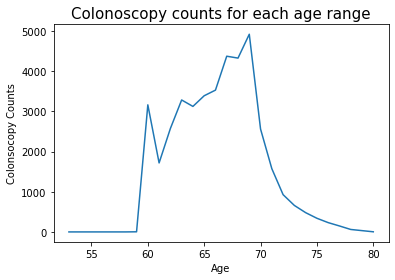

In [17]:
# importing the required libraries
import matplotlib.pyplot as plt
import numpy as np

# define data values
x = dfcolage['Age']
y = dfcolage['ID']

plt.plot(x, y) # Plot the chart
plt.xlabel('Age')
plt.ylabel('Colonsocopy Counts')
plt.title('Colonoscopy counts for each age range', fontsize=15)

plt.show() # display

In [18]:
#Create dataframe for each date
dfcoldate=dfcolraw.groupby(['proceduredate'])['ID'].agg(["count"]).reset_index()

In [19]:
dfcoldate

,proceduredate,count
0,2012-12-03,1
1,2013-02-20,3
2,2013-02-25,1
3,2013-03-01,3
4,2013-03-04,3
...,...,...
2693,2023-07-06,28
2694,2023-07-07,9
2695,2023-07-10,23
2696,2023-07-11,14


In [20]:
#Create dataframe for each Unit
dfcolclinic=dfcolraw.groupby(['CLINICID','Age'])['ID'].agg(["count"]).reset_index()

In [21]:
dfcolclinic

,CLINICID,Age,count
0,1,60,477
1,1,61,226
2,1,62,285
3,1,63,512
4,1,64,400
...,...,...,...
319,24,76,11
320,24,77,9
321,24,78,1
322,24,79,5


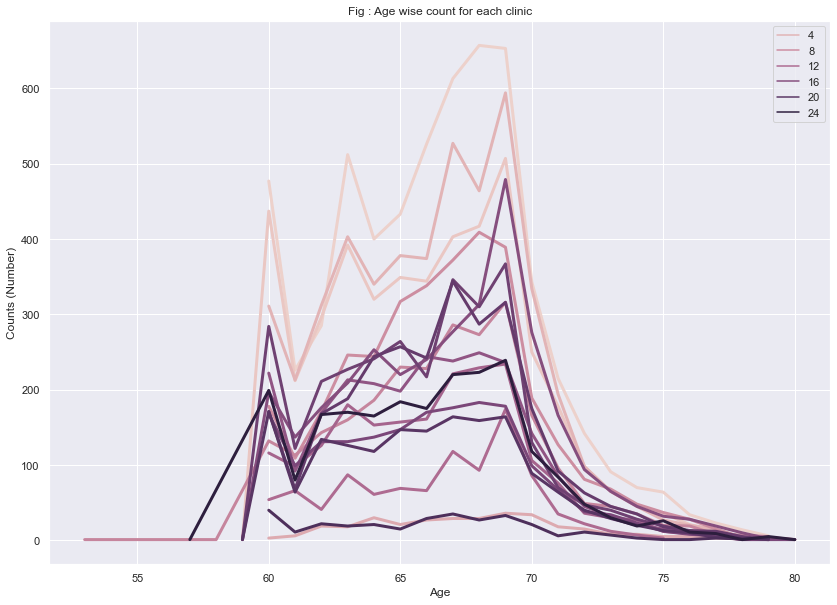

In [22]:
#Plot showing agewise counts

sns.set_style('darkgrid') #usage of seaborn library set the style
sns.set(rc={'figure.figsize':(14,10)}) #usage of seaborn library set the figure size
sns.color_palette("tab10")#usage of seaborn library set the color palette
ax = sns.lineplot(data=dfcolclinic, x ='Age', y = 'count',
                  hue='CLINICID', lw=3) # Draw the plot

plt.legend(bbox_to_anchor=(1, 1)) # Set the legends 
plt.ylabel('Counts (Number)') # Y label
plt.xlabel('Age') # X label
plt.title('Fig : Age wise count for each clinic') # Set the title
plt.show() # Display the plot

In [23]:
#Create dataframe for each Unit
dfcolagegender=dfcolraw.groupby(['Age','Gender'])['ID'].agg(["count"]).reset_index()

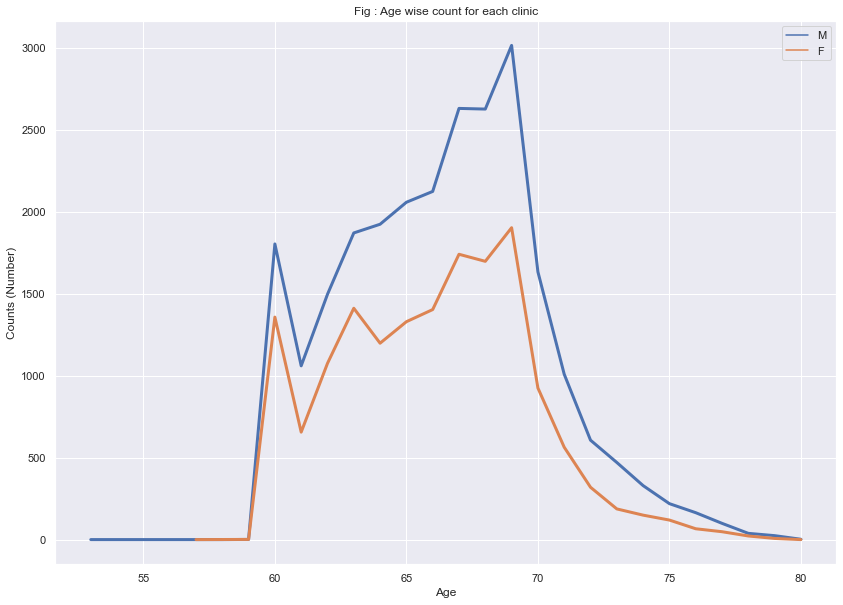

In [24]:
#Plot showing agewise counts

sns.set_style('darkgrid') #usage of seaborn library set the style
sns.set(rc={'figure.figsize':(14,10)}) #usage of seaborn library set the figure size
sns.color_palette("tab10")#usage of seaborn library set the color palette
ax = sns.lineplot(data=dfcolagegender, x ='Age', y = 'count',
                  hue='Gender', lw=3) # Draw the plot

plt.legend(bbox_to_anchor=(1, 1)) # Set the legends 
plt.ylabel('Counts (Number)') # Y label
plt.xlabel('Age') # X label
plt.title('Fig : Age wise count for each clinic') # Set the title
plt.show() # Display the plot

Text(0.5, 1.0, 'Box plot Administration')

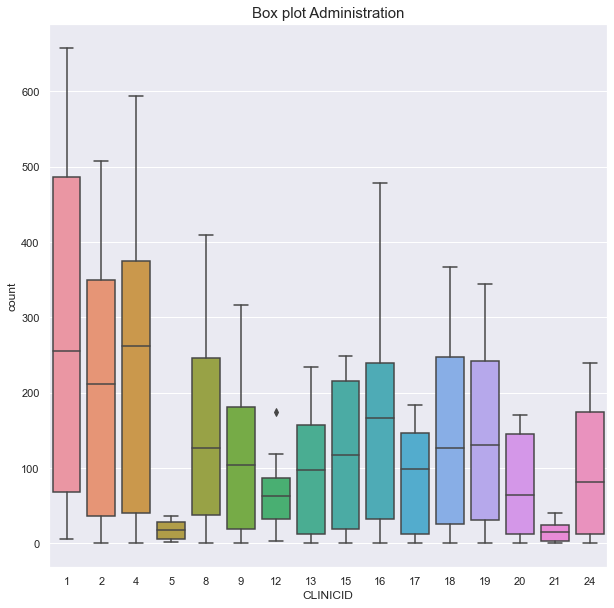

In [25]:
#Show outliers in the heatmap

plt.figure(figsize=(10,10))
sns.boxplot(x = 'CLINICID', y ='count', data=dfcolclinic)
plt.title('Box plot Administration', fontsize=15)

Text(0.5, 1.0, 'Box plot Administration')

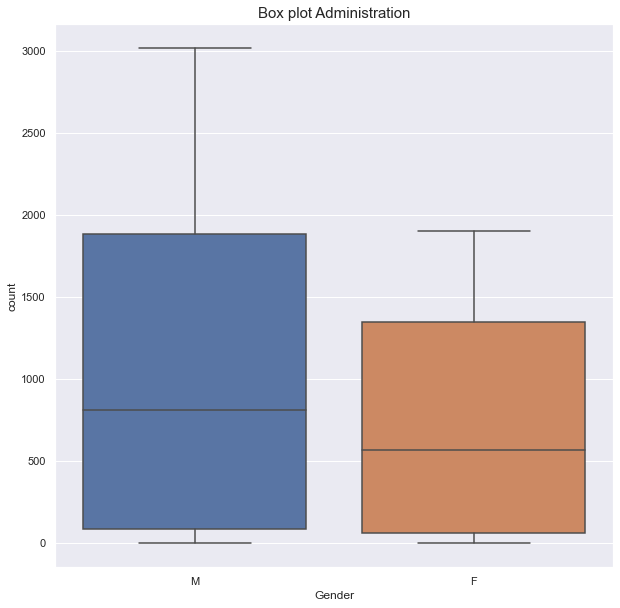

In [26]:
#Show outliers in the heatmap

plt.figure(figsize=(10,10))
sns.boxplot(x = 'Gender', y ='count', data=dfcolagegender)
plt.title('Box plot Administration', fontsize=15)

Text(0.5, 1.0, 'Box plot Administration')

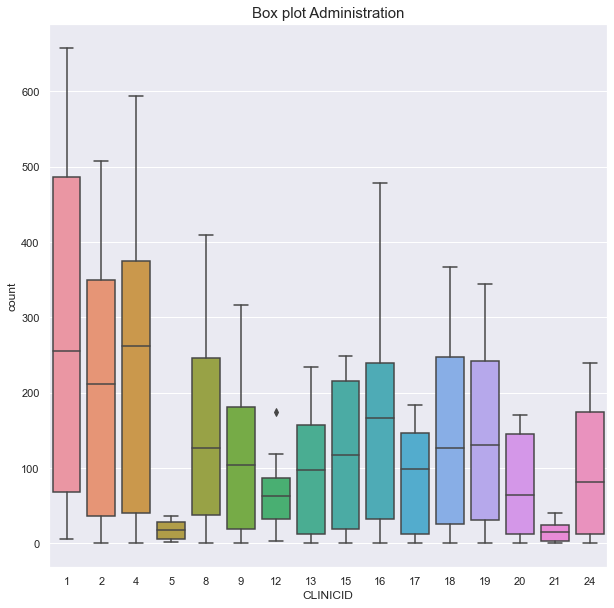

In [27]:
#Show outliers in the heatmap

plt.figure(figsize=(10,10))
sns.boxplot(x = 'CLINICID', y ='count', data=dfcolclinic)
plt.title('Box plot Administration', fontsize=15)

In [28]:
#Create dataframe for each Unit
dfcolclinicpd=dfcolraw.groupby(['CLINICID','Age','proceduredate','Gender'])['ID'].agg(["count"]).reset_index()
dfcolclinicpd

,CLINICID,Age,proceduredate,Gender,count
0,1,60,2016-06-21,M,1
1,1,60,2016-07-12,M,1
2,1,60,2016-07-26,M,1
3,1,60,2016-08-09,M,1
4,1,60,2016-08-16,M,1
...,...,...,...,...,...
38000,24,79,2023-02-11,F,1
38001,24,79,2023-02-11,M,1
38002,24,79,2023-06-14,M,1
38003,24,79,2023-06-28,F,1


In [29]:
dfcolclinicpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38005 entries, 0 to 38004
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CLINICID       38005 non-null  int64         
 1   Age            38005 non-null  int64         
 2   proceduredate  38005 non-null  datetime64[ns]
 3   Gender         38005 non-null  object        
 4   count          38005 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.4+ MB


In [30]:
dfcolclinicpd['proceduredate']=pd.to_datetime(dfcolclinicpd['proceduredate'])
dfcolclinicpd['proceduredate'] =pd.to_datetime(dfcolclinicpd['proceduredate'].dt.strftime('%d/%m/%Y'))


In [31]:
#Create a new column in dataframe that has the value of date and month combination
dfcolclinicpd['day'] = [x.day for x in dfcolclinicpd['proceduredate']]
dfcolclinicpd['month'] = [x.month for x in dfcolclinicpd['proceduredate']]
dfcolclinicpd['year'] = [x.year for x in dfcolclinicpd['proceduredate']]

# Display first five records
dfcolclinicpd.head()

,CLINICID,Age,proceduredate,Gender,count,day,month,year
0,1,60,2016-06-21,M,1,21,6,2016
1,1,60,2016-12-07,M,1,7,12,2016
2,1,60,2016-07-26,M,1,26,7,2016
3,1,60,2016-09-08,M,1,8,9,2016
4,1,60,2016-08-16,M,1,16,8,2016


In [32]:
monthsmap = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
dfcolclinicpd['Monthname'] = dfcolclinicpd['month'].map(monthsmap)
# Display first five records
dfcolclinicpd.head()

,CLINICID,Age,proceduredate,Gender,count,day,month,year,Monthname
0,1,60,2016-06-21,M,1,21,6,2016,June
1,1,60,2016-12-07,M,1,7,12,2016,Dec
2,1,60,2016-07-26,M,1,26,7,2016,July
3,1,60,2016-09-08,M,1,8,9,2016,Sep
4,1,60,2016-08-16,M,1,16,8,2016,Aug


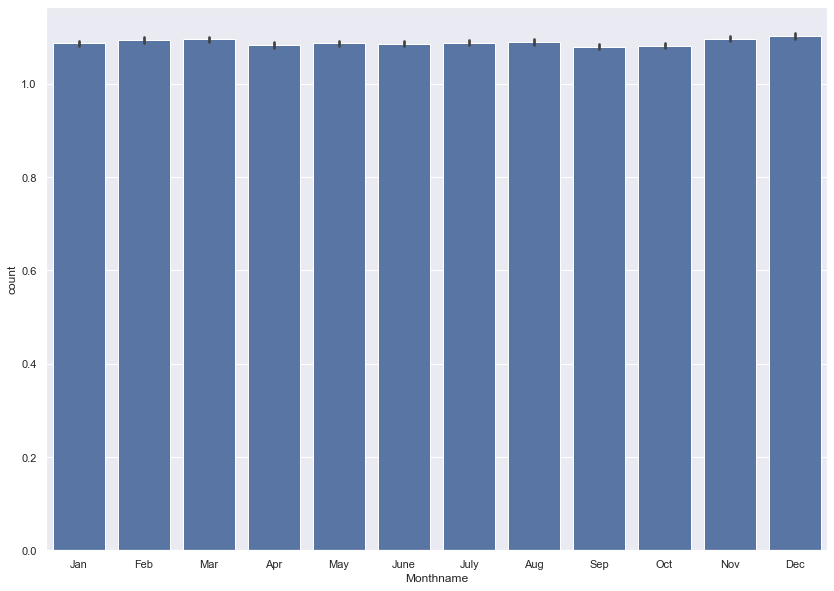

In [33]:
ax = sns.barplot(x="Monthname", y="count", data=dfcolclinicpd,  ci=68, order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],color='b') 

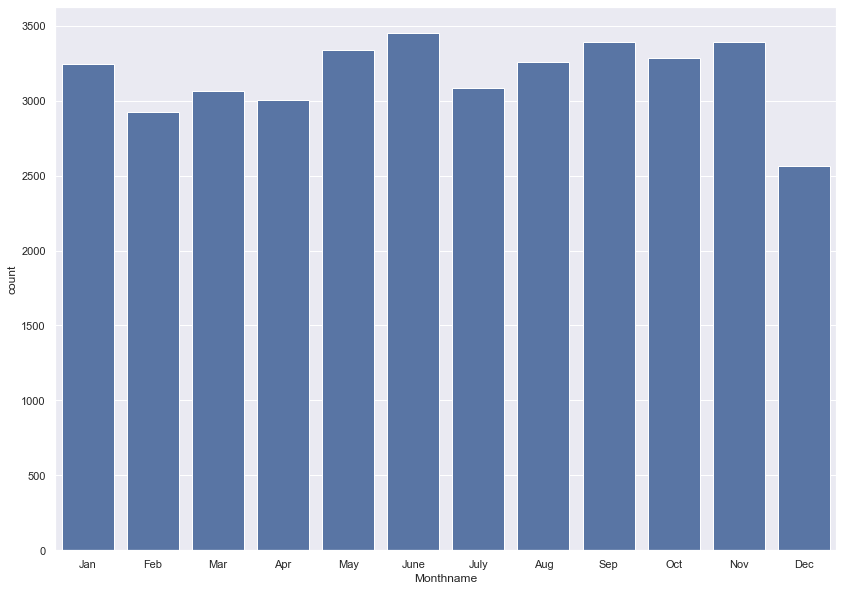

In [34]:
ax = sns.countplot(x="Monthname", data=dfcolclinicpd,  order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],color='b') 

In [35]:
dfcolclinicpd.head()

,CLINICID,Age,proceduredate,Gender,count,day,month,year,Monthname
0,1,60,2016-06-21,M,1,21,6,2016,June
1,1,60,2016-12-07,M,1,7,12,2016,Dec
2,1,60,2016-07-26,M,1,26,7,2016,July
3,1,60,2016-09-08,M,1,8,9,2016,Sep
4,1,60,2016-08-16,M,1,16,8,2016,Aug


<AxesSubplot:xlabel='Gender', ylabel='count'>

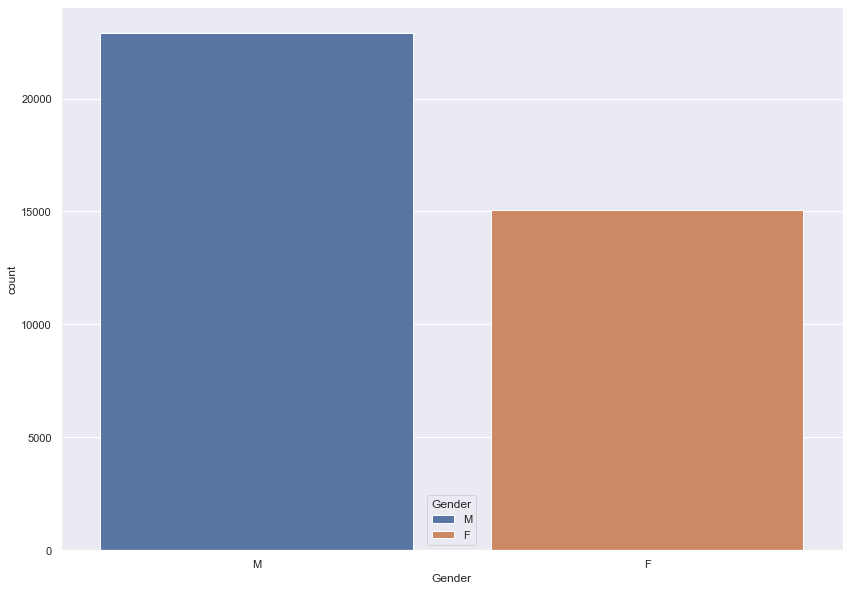

In [36]:
sns.countplot(x='Gender',hue='Gender',data=dfcolclinicpd,dodge=False)


In [37]:
y=dfcolclinicpd.groupby(['Gender'])['Gender'].count()
y

Gender
F    15086
M    22919
Name: Gender, dtype: int64

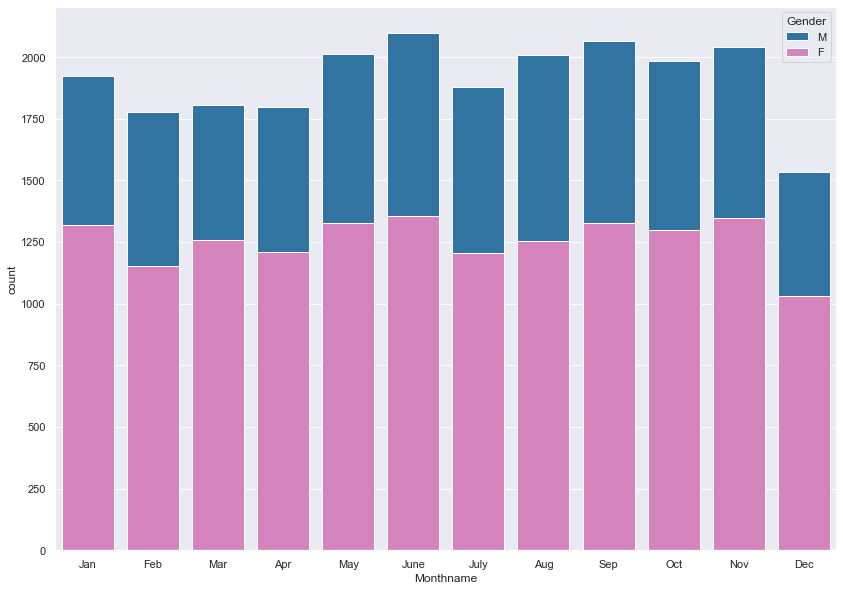

In [38]:
palette = {
    'M': 'tab:blue',
    'F': 'tab:pink',
}
ax= sns.countplot(x='Monthname',hue='Gender',palette=palette, order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],data=dfcolclinicpd,dodge=False)

#ax = sns.barplot(x="Monthname", data=dfcolclinicpd,  ci=68,hue='Gender',palette=palette, order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],color='b') 

In [39]:
#ax = sns.barplot(x="Monthname", y="count", data=dfcolclinicpd,  ci=68,hue='Gender',palette=palette, order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],color='b') 
dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1,69,2013-03-19,M,19,19,3,2013,Mar
1,2,69,2013-03-12,F,19,12,3,2013,Mar
2,3,69,2013-03-05,F,19,5,3,2013,Mar
3,4,69,2013-03-12,M,19,12,3,2013,Mar
4,5,69,2013-03-12,M,19,12,3,2013,Mar
...,...,...,...,...,...,...,...,...,...
41386,41387,60,2023-06-30,M,15,30,6,2023,June
41387,41388,62,2023-07-12,F,18,12,7,2023,July
41388,41389,62,2023-07-12,M,13,12,7,2023,July
41389,41390,80,2023-07-12,M,13,12,7,2023,July


In [40]:
dfcolraw=dfcolraw[(dfcolraw['year'] != 2012)]
dfcolraw=dfcolraw[(dfcolraw['year'] != 2013)]
dfcolraw=dfcolraw[(dfcolraw['year'] != 2020)]
dfcolraw=dfcolraw[(dfcolraw['year'] != 2023)]
dfcolraw=dfcolraw.reset_index(drop=True)
dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1314,68,2014-01-03,M,9,3,1,2014,Jan
1,1315,69,2014-01-03,M,9,3,1,2014,Jan
2,1316,68,2014-01-03,F,9,3,1,2014,Jan
3,1319,68,2014-01-03,F,1,3,1,2014,Jan
4,1320,67,2014-01-03,M,1,3,1,2014,Jan
...,...,...,...,...,...,...,...,...,...
33605,38654,70,2022-12-03,M,16,3,12,2022,Dec
33606,38926,65,2022-09-29,F,15,29,9,2022,Sep
33607,38953,71,2022-12-04,F,16,4,12,2022,Dec
33608,38971,66,2022-12-02,M,8,2,12,2022,Dec


In [41]:
dfcolraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33610 entries, 0 to 33609
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             33610 non-null  int64         
 1   Age            33610 non-null  int64         
 2   proceduredate  33610 non-null  datetime64[ns]
 3   Gender         33610 non-null  object        
 4   CLINICID       33610 non-null  int64         
 5   day            33610 non-null  int64         
 6   month          33610 non-null  int64         
 7   year           33610 non-null  int64         
 8   Monthname      33610 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 2.3+ MB


In [42]:

dfcolgenageyearaggregate=dfcolraw.groupby(['Gender','Age','year'])['ID'].count().reset_index()
dfcolgenageyearaggregate.tail()

,Gender,Age,year,ID
260,M,77,2021,29
261,M,77,2022,23
262,M,78,2021,10
263,M,78,2022,20
264,M,79,2022,10


In [43]:
dfcolraw.groupby(['year'])['ID'].count()

year
2014    3352
2015    4014
2016    4004
2017    4353
2018    4378
2019    4457
2021    4236
2022    4816
Name: ID, dtype: int64

In [44]:
## Using pivot function, specify the index, columns, and the values. The purpose here is to replace the NaN values, logically for each country and animal type
dflspivot= dfcolgenageyearaggregate.pivot (index=['Gender','Age'],columns='year',values='ID').reset_index()
dflspivot.head()


year,Gender,Age,2014,2015,2016,2017,2018,2019,2021,2022
0,F,57,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,F,59,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
2,F,60,2.0,1.0,105.0,278.0,243.0,217.0,129.0,185.0
3,F,61,2.0,3.0,238.0,101.0,52.0,33.0,43.0,99.0
4,F,62,14.0,51.0,149.0,96.0,137.0,228.0,93.0,95.0


In [45]:
print( dflspivot.columns) # for columns
print(dflspivot.index) # for row indexes

Index(['Gender', 'Age', 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022], dtype='object', name='year')
RangeIndex(start=0, stop=46, step=1)


In [46]:
#Delete the 2012, 2013 and 2023 data since they are not complete and  might result in incorrect prediction
#dflspivot = dflspivot.drop(dflspivot.columns[[2]],axis=1)
#dflspivot = dflspivot.drop(dflspivot.columns[[2]],axis=1)
#dflspivot = dflspivot.drop(dflspivot.columns[[8]],axis=1)
#dflspivot = dflspivot.drop(dflspivot.columns[[10]],axis=1)
dflspivot

year,Gender,Age,2014,2015,2016,2017,2018,2019,2021,2022
0,F,57,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,F,59,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
2,F,60,2.0,1.0,105.0,278.0,243.0,217.0,129.0,185.0
3,F,61,2.0,3.0,238.0,101.0,52.0,33.0,43.0,99.0
4,F,62,14.0,51.0,149.0,96.0,137.0,228.0,93.0,95.0
5,F,63,20.0,222.0,256.0,91.0,196.0,152.0,128.0,178.0
6,F,64,63.0,163.0,126.0,83.0,135.0,121.0,152.0,160.0
7,F,65,85.0,175.0,105.0,154.0,209.0,126.0,174.0,123.0
8,F,66,153.0,223.0,105.0,159.0,152.0,110.0,141.0,146.0
9,F,67,206.0,265.0,96.0,166.0,143.0,158.0,156.0,190.0


In [47]:
#There are more NULL values, these are the cases where for a country for all the years there is nothing submitted, we will mark such NaN as 0.

dflspivot.sort_values(by='Age', inplace=True) 

colnames=dflspivot.columns.values
for i in colnames:
    dflspivot[i] = dflspivot[i].replace(np.nan, 0)

In [48]:
dflspivot.reset_index()

year,index,Gender,Age,2014,2015,2016,2017,2018,2019,2021,2022
0,23,M,53,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,F,57,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24,M,58,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,25,M,59,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,F,59,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,26,M,60,1.0,0.0,169.0,374.0,303.0,279.0,168.0,252.0
6,2,F,60,2.0,1.0,105.0,278.0,243.0,217.0,129.0,185.0
7,3,F,61,2.0,3.0,238.0,101.0,52.0,33.0,43.0,99.0
8,27,M,61,3.0,7.0,366.0,160.0,113.0,64.0,73.0,149.0
9,4,F,62,14.0,51.0,149.0,96.0,137.0,228.0,93.0,95.0


In [49]:
print (dflspivot.columns.tolist())

['Gender', 'Age', 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022]


In [50]:
dflspivot=dflspivot[['Gender','Age',2014,2015,2016,2017,2018,2019,2021,2022]]
dflspivot.head()

year,Gender,Age,2014,2015,2016,2017,2018,2019,2021,2022
23,M,53,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0,F,57,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
24,M,58,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25,M,59,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,F,59,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [51]:
dflspivotgt60=dflspivot[['Gender','Age',2016,2017,2018,2019,2021,2022]].loc[dflspivot['Age']>=60]
dflspivotlt69=dflspivotgt60[['Gender','Age',2016,2017,2018,2019,2021,2022]].loc[dflspivotgt60['Age']<=69]
dflspivotlt69.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 26 to 35
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  20 non-null     object 
 1   Age     20 non-null     int64  
 2   2016    20 non-null     float64
 3   2017    20 non-null     float64
 4   2018    20 non-null     float64
 5   2019    20 non-null     float64
 6   2021    20 non-null     float64
 7   2022    20 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.4+ KB


In [52]:
dflspivotlt69['mean'] = dflspivotlt69.iloc[:, 2:8].mean(axis=1)
dflspivotcm=dflspivotlt69.copy()


In [53]:
dflspivotlt69

year,Gender,Age,2016,2017,2018,2019,2021,2022,mean
26,M,60,169.0,374.0,303.0,279.0,168.0,252.0,257.500000
2,F,60,105.0,278.0,243.0,217.0,129.0,185.0,192.833333
3,F,61,238.0,101.0,52.0,33.0,43.0,99.0,94.333333
27,M,61,366.0,160.0,113.0,64.0,73.0,149.0,154.166667
4,F,62,149.0,96.0,137.0,228.0,93.0,95.0,133.000000
28,M,62,216.0,141.0,137.0,313.0,137.0,150.0,182.333333
5,F,63,256.0,91.0,196.0,152.0,128.0,178.0,166.833333
29,M,63,352.0,144.0,263.0,191.0,170.0,208.0,221.333333
6,F,64,126.0,83.0,135.0,121.0,152.0,160.0,129.500000
30,M,64,198.0,119.0,232.0,181.0,278.0,230.0,206.333333


In [54]:
gendermap = {'M':1, 'F':2}
dflspivotcm['Gender'] = dflspivotcm['Gender'].map(gendermap)
dflspivotcm

year,Gender,Age,2016,2017,2018,2019,2021,2022,mean
26,1,60,169.0,374.0,303.0,279.0,168.0,252.0,257.500000
2,2,60,105.0,278.0,243.0,217.0,129.0,185.0,192.833333
3,2,61,238.0,101.0,52.0,33.0,43.0,99.0,94.333333
27,1,61,366.0,160.0,113.0,64.0,73.0,149.0,154.166667
4,2,62,149.0,96.0,137.0,228.0,93.0,95.0,133.000000
28,1,62,216.0,141.0,137.0,313.0,137.0,150.0,182.333333
5,2,63,256.0,91.0,196.0,152.0,128.0,178.0,166.833333
29,1,63,352.0,144.0,263.0,191.0,170.0,208.0,221.333333
6,2,64,126.0,83.0,135.0,121.0,152.0,160.0,129.500000
30,1,64,198.0,119.0,232.0,181.0,278.0,230.0,206.333333


In [55]:
dflspivotlt69.head()

year,Gender,Age,2016,2017,2018,2019,2021,2022,mean
26,M,60,169.0,374.0,303.0,279.0,168.0,252.0,257.500000
2,F,60,105.0,278.0,243.0,217.0,129.0,185.0,192.833333
3,F,61,238.0,101.0,52.0,33.0,43.0,99.0,94.333333
27,M,61,366.0,160.0,113.0,64.0,73.0,149.0,154.166667
4,F,62,149.0,96.0,137.0,228.0,93.0,95.0,133.000000


year       Age      2016      2017      2018      2019      2021      2022  \
year                                                                         
Age   1.000000 -0.308279  0.200155 -0.000549  0.231453  0.427394  0.417008   
2016 -0.308279  1.000000 -0.098762  0.058134 -0.057872 -0.074930  0.116710   
2017  0.200155 -0.098762  1.000000  0.636784  0.617920  0.424990  0.682446   
2018 -0.000549  0.058134  0.636784  1.000000  0.545108  0.701116  0.603525   
2019  0.231453 -0.057872  0.617920  0.545108  1.000000  0.506240  0.613625   
2021  0.427394 -0.074930  0.424990  0.701116  0.506240  1.000000  0.639758   
2022  0.417008  0.116710  0.682446  0.603525  0.613625  0.639758  1.000000   
mean  0.203712  0.247763  0.782048  0.832791  0.774436  0.731995  0.846526   

year      mean  
year            
Age   0.203712  
2016  0.247763  
2017  0.782048  
2018  0.832791  
2019  0.774436  
2021  0.731995  
2022  0.846526  
mean  1.000000  


<AxesSubplot:title={'center':'Corelation Matrix between Variables'}, xlabel='year', ylabel='year'>

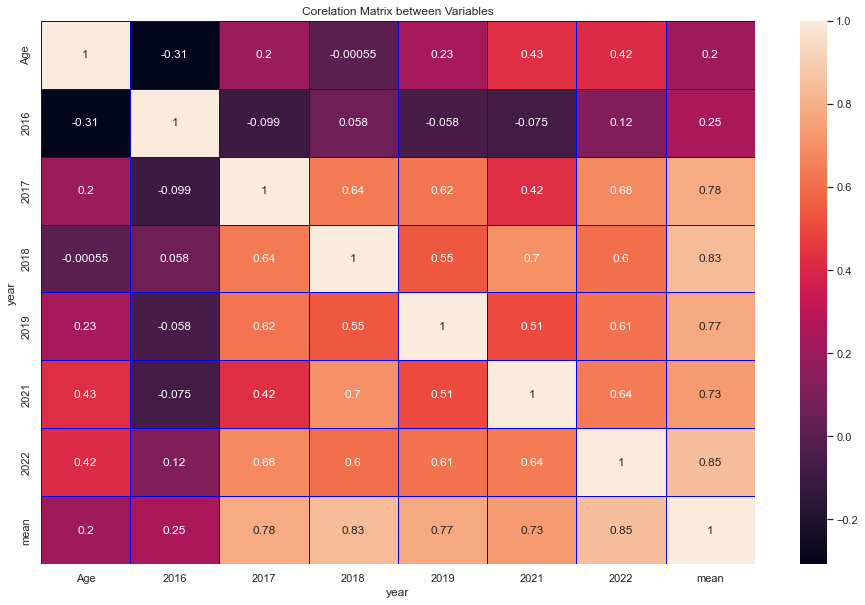

In [56]:
#Plot the co-relation matrix
correlation = dflspivotlt69.corr()
print(correlation)
plt.figure(figsize=(16,10))
plt.title('Corelation Matrix between Variables')
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [57]:
dflspivotcm2=dfcolraw.copy()
dflspivotcm2.head()

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1314,68,2014-01-03,M,9,3,1,2014,Jan
1,1315,69,2014-01-03,M,9,3,1,2014,Jan
2,1316,68,2014-01-03,F,9,3,1,2014,Jan
3,1319,68,2014-01-03,F,1,3,1,2014,Jan
4,1320,67,2014-01-03,M,1,3,1,2014,Jan


In [58]:
dflspivotcm2=dflspivotcm2[['ID','Age','Gender','month']]
dflspivotcm2['Gender'] = dflspivotcm2['Gender'].map(gendermap)
dflspivotcm2=dflspivotcm2.groupby(['Age','Gender','month'])['ID'].count().reset_index()

dflspivotcm2

,Age,Gender,month,ID
0,53,1,7,1
1,57,2,4,1
2,58,1,2,1
3,59,1,3,1
4,59,1,7,1
...,...,...,...,...
465,79,2,8,1
466,79,2,10,1
467,79,2,11,1
468,79,2,12,1


             Age    Gender     month        ID
Age     1.000000 -0.010767  0.050310 -0.624869
Gender -0.010767  1.000000  0.019298 -0.248625
month   0.050310  0.019298  1.000000  0.043801
ID     -0.624869 -0.248625  0.043801  1.000000


<AxesSubplot:title={'center':'Corelation Matrix between Variables'}>

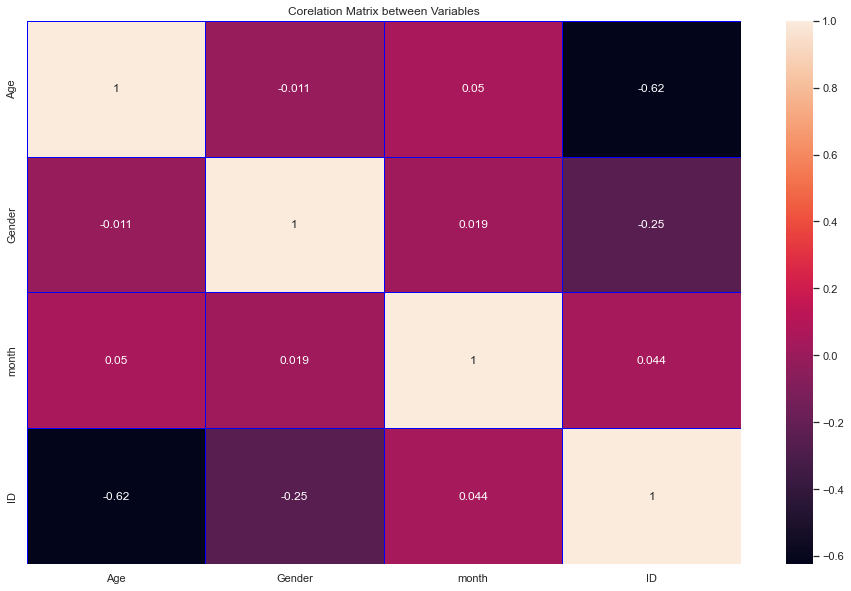

In [59]:
#Plot the co-relation matrix
correlation = dflspivotcm2.corr()
print(correlation)
plt.figure(figsize=(16,10))
plt.title('Corelation Matrix between Variables')
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [60]:
dfcolmean=dflspivotlt69[['Gender','Age','mean']]
dfcolmean

year,Gender,Age,mean
26,M,60,257.500000
2,F,60,192.833333
3,F,61,94.333333
27,M,61,154.166667
4,F,62,133.000000
28,M,62,182.333333
5,F,63,166.833333
29,M,63,221.333333
6,F,64,129.500000
30,M,64,206.333333


In [61]:
#Import Census Data

#Read the csv file with utf-8 decoding
dfcensusm = pd.read_csv('C:/Users/raku4/Documents/MSc/Sem 3/EligiblePopulation_Male_Msc.csv')
dfcensusf = pd.read_csv('C:/Users/raku4/Documents/MSc/Sem 3/EligiblePopulation_Female_Msc.csv')



dfcensusm

,Age,Gender,2022E,2021E,2020E,2019E,2018E,2017E,2016E,2015E,2014E,2013E
0,40,M,40301,41401,41644,39275,37940,37710,37289,37053,36472,36650
1,41,M,41401,41644,39275,37940,37710,37289,37053,36472,36650,36050
2,42,M,41644,39275,37940,37710,37289,37053,36472,36650,36050,34926
3,43,M,39275,37940,37710,37289,37053,36472,36650,36050,34926,34356
4,44,M,37940,37710,37289,37053,36472,36650,36050,34926,34356,32611
5,45,M,37710,37289,37053,36472,36650,36050,34926,34356,32611,32050
6,46,M,37289,37053,36472,36650,36050,34926,34356,32611,32050,31353
7,47,M,37053,36472,36650,36050,34926,34356,32611,32050,31353,30684
8,48,M,36472,36650,36050,34926,34356,32611,32050,31353,30684,30891
9,49,M,36650,36050,34926,34356,32611,32050,31353,30684,30891,29775


In [62]:
dfcensusm['meanE'] = dfcensusm.iloc[:, 2:8].mean(axis=1) # Only until 2014 is considered for mean
dfcensusm.head()

,Age,Gender,2022E,2021E,2020E,2019E,2018E,2017E,2016E,2015E,2014E,2013E,meanE
0,40,M,40301,41401,41644,39275,37940,37710,37289,37053,36472,36650,39711.833333
1,41,M,41401,41644,39275,37940,37710,37289,37053,36472,36650,36050,39209.833333
2,42,M,41644,39275,37940,37710,37289,37053,36472,36650,36050,34926,38485.166667
3,43,M,39275,37940,37710,37289,37053,36472,36650,36050,34926,34356,37623.166667
4,44,M,37940,37710,37289,37053,36472,36650,36050,34926,34356,32611,37185.666667


In [63]:
dfcensusf['meanE'] = dfcensusf.iloc[:, 2:8].mean(axis=1) # Only until 2014 is considered for mean
dfcensusf.head()

,Age,Gender,2022E,2021E,2020E,2019E,2018E,2017E,2016E,2015E,2014E,2013E,meanE
0,40,F,43143,43696,43337,41408,39379,38506,38127,37471,37145,37081,41578.166667
1,41,F,43696,43337,41408,39379,38506,38127,37471,37145,37081,36199,40742.166667
2,42,F,43337,41408,39379,38506,38127,37471,37145,37081,36199,35025,39704.666667
3,43,F,41408,39379,38506,38127,37471,37145,37081,36199,35025,34414,38672.666667
4,44,F,39379,38506,38127,37471,37145,37081,36199,35025,34414,32204,37951.500000


In [64]:
#Data frame to only take mean
dfcensusmmean=dfcensusm[['Age','Gender','meanE']]
dfcensusfmean=dfcensusf[['Age','Gender','meanE']]

In [65]:
#Let us take mean data for the eligible population in census
dfcensusmmean=dfcensusmmean.loc[dfcensusm['Age']>=60]
dfcensusmmean

,Age,Gender,meanE
20,60,M,26555.166667
21,61,M,25772.500000
22,62,M,25068.833333
23,63,M,24299.833333
24,64,M,23751.500000
25,65,M,23105.833333
26,66,M,22364.000000
27,67,M,21731.666667
28,68,M,20980.666667
29,69,M,20312.500000


In [66]:
#dfcensusmmean=dfcensusmmean.loc[dfcensusm2019['Age']<70]


In [67]:
#Let us take 2019 data which is most reliable since it is latest year pre-covid and expect same tendency to continue from 2024 if the age range is untouched.
dfcensusf2019=dfcensusf[['Age','Gender','2019E']].loc[dfcensusf['Age']>=60]
dfcensusf2019=dfcensusf2019[['Age','Gender','2019E']].loc[dfcensusf2019['Age']<70]
dfcensusf2019

,Age,Gender,2019E
20,60,F,26312
21,61,F,26109
22,62,F,25183
23,63,F,24662
24,64,F,24524
25,65,F,23018
26,66,F,23375
27,67,F,21897
28,68,F,21236
29,69,F,21159


In [68]:
dfcensusmean = [dfcensusmmean, dfcensusfmean]

In [69]:
dfcensusmean=pd.concat(dfcensusmean)


In [70]:
dfcensusmean.reset_index(drop=True)


,Age,Gender,meanE
0,60,M,26555.166667
1,61,M,25772.500000
2,62,M,25068.833333
3,63,M,24299.833333
4,64,M,23751.500000
...,...,...,...
77,86,F,4906.666667
78,87,F,3656.500000
79,88,F,2528.833333
80,89,F,1541.000000


In [71]:
dfcolmean.reset_index(drop=True)

year,Gender,Age,mean
0,M,60,257.500000
1,F,60,192.833333
2,F,61,94.333333
3,M,61,154.166667
4,F,62,133.000000
5,M,62,182.333333
6,F,63,166.833333
7,M,63,221.333333
8,F,64,129.500000
9,M,64,206.333333


In [72]:
print( dfcolmean.columns) # for columns
#print(dfcolmean.index) # for row indexes

Index(['Gender', 'Age', 'mean'], dtype='object', name='year')


In [73]:
dfcolmean = dfcolmean.rename_axis(columns=None)
dfcolmean.reset_index(drop=True)

,Gender,Age,mean
0,M,60,257.500000
1,F,60,192.833333
2,F,61,94.333333
3,M,61,154.166667
4,F,62,133.000000
5,M,62,182.333333
6,F,63,166.833333
7,M,63,221.333333
8,F,64,129.500000
9,M,64,206.333333


In [74]:
dfcolmean.reset_index(inplace=True, drop=True)
dfcensusmean.reset_index(inplace=True, drop=True)

In [75]:
dfcensusmean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     82 non-null     int64  
 1   Gender  82 non-null     object 
 2   meanE   82 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


In [76]:
result = pd.merge(dfcolmean, dfcensusmean, on=["Age", "Gender"])

In [77]:
result['percent']=result['mean']*100/result['meanE']

In [78]:
result

,Gender,Age,mean,meanE,percent
0,M,60,257.500000,26555.166667,0.969679
1,F,60,192.833333,27237.000000,0.707983
2,F,61,94.333333,26503.500000,0.355928
3,M,61,154.166667,25772.500000,0.598183
4,F,62,133.000000,25781.500000,0.515874
5,M,62,182.333333,25068.833333,0.727331
6,F,63,166.833333,24968.000000,0.668189
7,M,63,221.333333,24299.833333,0.910843
8,F,64,129.500000,24478.500000,0.529036
9,M,64,206.333333,23751.500000,0.868717


In [79]:
result.groupby(['Gender']).mean()


,Age,mean,meanE,percent
Gender,,,,
F,64.5,146.816667,24136.466667,0.613372
M,64.5,219.216667,23394.250000,0.949900


In [80]:
#Data frame to only take mean
dfcensusmall=dfcensusm[['Age','Gender','meanE']]
dfcensusfall=dfcensusf[['Age','Gender','meanE']]

In [81]:
conact1 = [dfcensusmall, dfcensusfall]
dfcensusall=pd.concat(conact1)
dfcensus5569=dfcensusall.loc[(dfcensusall['Age']>=55) & (dfcensusall['Age']<70)]



In [82]:

import numpy as np

dfcensus5569['Projectedcol'] = np.where(dfcensus5569['Gender']=='M', dfcensus5569['meanE']*0.95/100, dfcensus5569['meanE']*0.61/100)

dfcensus5569.reset_index(drop=True,inplace=True)
dfcensus5569

,Age,Gender,meanE,Projectedcol
0,55,M,30059.000000,285.560500
1,56,M,29475.000000,280.012500
2,57,M,28880.333333,274.363167
3,58,M,28045.833333,266.435417
4,59,M,27271.166667,259.076083
5,60,M,26555.166667,252.274083
6,61,M,25772.500000,244.838750
7,62,M,25068.833333,238.153917
8,63,M,24299.833333,230.848417
9,64,M,23751.500000,225.639250


                   Age     meanE  Projectedcol
Age           1.000000 -0.991809     -0.501496
meanE        -0.991809  1.000000      0.393390
Projectedcol -0.501496  0.393390      1.000000


<AxesSubplot:title={'center':'Corelation Matrix between Variables'}>

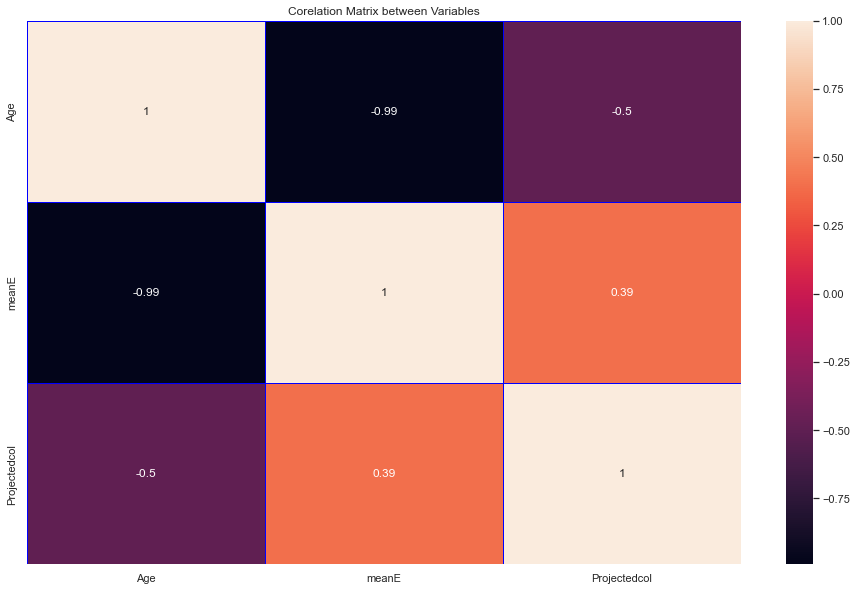

In [83]:
#Plot the co-relation matrix
correlation = dfcensus5569.corr()
print(correlation)
plt.figure(figsize=(16,10))
plt.title('Corelation Matrix between Variables')
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [84]:
#There is a corerelation of 0.37 bewteen the census number snad the projected colonoscopies

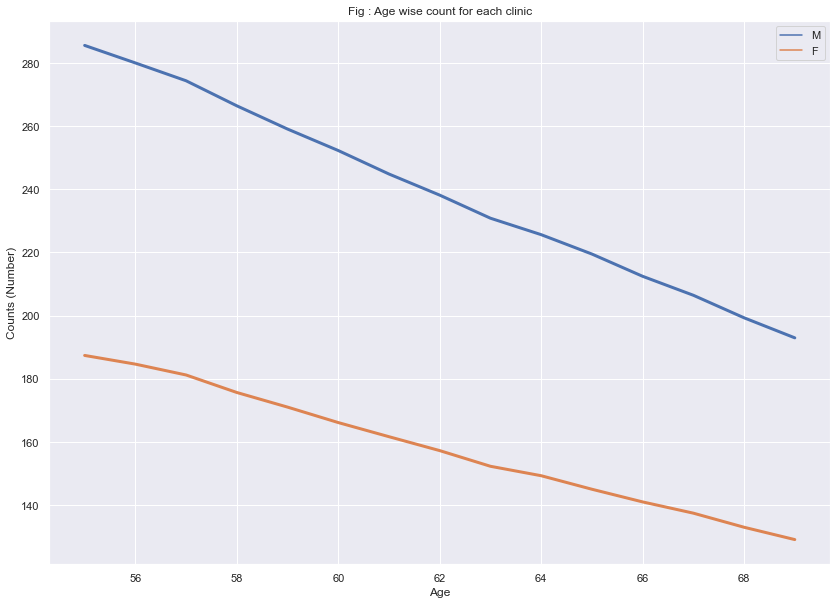

In [85]:
#Plot showing agewise counts

sns.set_style('darkgrid') #usage of seaborn library set the style
sns.set(rc={'figure.figsize':(14,10)}) #usage of seaborn library set the figure size
sns.color_palette("tab10")#usage of seaborn library set the color palette
ax = sns.lineplot(data=dfcensus5569, x ='Age', y = 'Projectedcol',
                  hue='Gender', lw=3) # Draw the plot
plt.legend(bbox_to_anchor=(1, 1)) # Set the legends 
plt.ylabel('Counts (Number)') # Y label
plt.xlabel('Age') # X label
plt.title('Fig : Age wise count for each clinic') # Set the title
plt.show() # Display the plot


In [86]:
# Next step use seperate populations for M and F, see the total count from dfcensus5569, 
#see above for the average in the sample and do a hypothesis testing for the expected total

# Hypothesis Testing

In [87]:
#Statistics Library
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Sample 1: Male population between 60-69



In [88]:
# Mean =209

In [89]:
# create 90% confidence interval, use the scipy.stats
st.t.interval(alpha=0.90, 
              df=1, # Dataframe length
              loc=209, # mean average for male population 60-69
              scale = 4
              )

(183.74499394079623, 234.25500605920374)

In [90]:
# create 95% confidence interval, use the scipy.stats
st.t.interval(alpha=0.95, 
              df=1, # Dataframe length
              loc=209, # mean average for male population 60-69
              scale = 4
              )

(158.1751810542716, 259.8248189457284)

In [91]:
# As seen above at 90% CI the colonoscopies vary between 183 to 234.
# Now, taking the whole population from 55-70, we see in the chart male population max is 275. Doing a T-Test for one population

In [92]:
#Get the projected values from the populations for Male
X=dfcensus5569['Projectedcol'].loc[(dfcensus5569['Gender']=='M')]




In [93]:
#H0 : u = 275
#H1 : u < 275
#stats.ttest_1samp(X,mu of H0)
st.ttest_1samp(X,275)

Ttest_1sampResult(statistic=-4.631946392946002, pvalue=0.00038816017205040325)

In [94]:
# Hypothesis is rejected since p value is less than 0.05

In [95]:
#H1 : u > 230
st.t.sf(-6.195641472339939, 8)

0.9998696682756691

In [96]:
# T Test shows the max number of colonoscopies for M is greater than 230

<Figure size 1008x720 with 0 Axes>

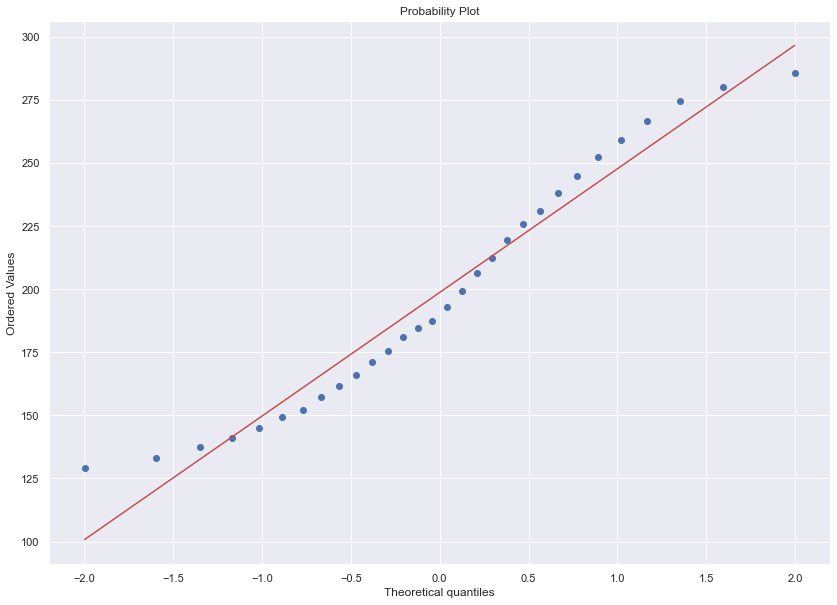

<Figure size 1008x720 with 0 Axes>

In [97]:
#Normality plot. Our variable is "charges"

st.probplot(dfcensus5569.Projectedcol, plot=plt)
plt.figure()

In [98]:
dfcensus5569.head()

,Age,Gender,meanE,Projectedcol
0,55,M,30059.000000,285.560500
1,56,M,29475.000000,280.012500
2,57,M,28880.333333,274.363167
3,58,M,28045.833333,266.435417
4,59,M,27271.166667,259.076083


In [99]:
#Shapiro wilk test for Male

st.shapiro(dfcensus5569.Projectedcol[dfcensus5569.Gender == "M"])

ShapiroResult(statistic=0.9598639011383057, pvalue=0.6900299191474915)

In [100]:
#Shapiro wilk test for Female

st.shapiro(dfcensus5569.Projectedcol[dfcensus5569.Gender == "F"])

ShapiroResult(statistic=0.9548131227493286, pvalue=0.6031501889228821)

In [101]:
#ONE-WAY ANOVA
#H0 : Variances of Mean value for the genders are same
#H1 : Variances of Mean value for the genders are different

model = ols('Projectedcol~Gender', data = dfcensus5569).fit()
aov = sm.stats.anova_lm(model, type=2)
print(aov)

            df        sum_sq       mean_sq          F        PR(>F)
Gender     1.0  49256.213300  49256.213300  78.045392  1.378246e-09
Residual  28.0  17671.433657    631.122631        NaN           NaN


In [102]:
from scipy.stats import mannwhitneyu

#H0 : Median values for the genders are the same.
#H1 : Median values for the genders are differnt.



# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(dfcensus5569['Projectedcol'].sort_values(), dfcensus5569['Projectedcol'].sort_values())
results

MannwhitneyuResult(statistic=450.0, pvalue=1.0)

# Sample 2: Female population between 60-69


In [103]:
#mean = 136

# create 90% confidence interval, use the scipy.stats
st.t.interval(alpha=0.90, 
              df=1, # Dataframe length
              loc=136, # mean average for male population 60-69
              scale = 4
              )

(110.74499394079623, 161.25500605920374)

In [104]:
#Get the projected values from the populations for Female
X=dfcensus5569['Projectedcol'].loc[(dfcensus5569['Gender']=='F')]

In [105]:
#H0 : u = 161
#H1 : u > 110
#stats.ttest_1samp(X,mu of H0)
st.ttest_1samp(X,161)

Ttest_1sampResult(statistic=-0.5763906915478207, pvalue=0.5735018389945836)

In [106]:
#H1 : u > 110
st.t.sf(-2.8640589660047233, 8)

0.9894900518884822

In [107]:
#ANOVA TWO WAYS
#H0 : Variances of Mean value for the age and gender are same
#H1 : Variances of Mean value for the age and gender are different
  
model2 = ols('Projectedcol~Age+Gender', data = dfcensus5569).fit()
aov2 = sm.stats.anova_lm(model2, type=2)
print(aov2)

            df        sum_sq       mean_sq            F        PR(>F)
Gender     1.0  49256.213300  49256.213300  1584.653699  1.625153e-25
Age        1.0  16832.185461  16832.185461   541.519195  2.120368e-19
Residual  27.0    839.248196     31.083267          NaN           NaN


# Dataset for Machine Learning model time series

In [108]:
dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1314,68,2014-01-03,M,9,3,1,2014,Jan
1,1315,69,2014-01-03,M,9,3,1,2014,Jan
2,1316,68,2014-01-03,F,9,3,1,2014,Jan
3,1319,68,2014-01-03,F,1,3,1,2014,Jan
4,1320,67,2014-01-03,M,1,3,1,2014,Jan
...,...,...,...,...,...,...,...,...,...
33605,38654,70,2022-12-03,M,16,3,12,2022,Dec
33606,38926,65,2022-09-29,F,15,29,9,2022,Sep
33607,38953,71,2022-12-04,F,16,4,12,2022,Dec
33608,38971,66,2022-12-02,M,8,2,12,2022,Dec


In [109]:
dfcolraw.loc[(dfcolraw['Age']>=55)&(dfcolraw['Age']<70)].groupby(['Age','Gender','proceduredate','month','year'])['ID'].agg(["count"]).reset_index()


#dfcensus5569=dfcensusall.loc[(dfcensusall['Age']>=55) & (dfcensusall['Age']<70)]


,Age,Gender,proceduredate,month,year,count
0,57,F,2015-04-29,4,2015,1
1,58,M,2018-02-07,2,2018,1
2,59,F,2017-03-02,3,2017,1
3,59,F,2018-09-18,9,2018,1
4,59,M,2018-07-09,7,2018,1
...,...,...,...,...,...,...
18226,69,M,2022-12-19,12,2022,2
18227,69,M,2022-12-20,12,2022,1
18228,69,M,2022-12-21,12,2022,2
18229,69,M,2022-12-22,12,2022,2


In [110]:
dfcolraw['day']=1
#dfcolraw['firstdate']=dfcolraw['firstdate'].astype(Date)
dfcolraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33610 entries, 0 to 33609
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             33610 non-null  int64         
 1   Age            33610 non-null  int64         
 2   proceduredate  33610 non-null  datetime64[ns]
 3   Gender         33610 non-null  object        
 4   CLINICID       33610 non-null  int64         
 5   day            33610 non-null  int64         
 6   month          33610 non-null  int64         
 7   year           33610 non-null  int64         
 8   Monthname      33610 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 2.3+ MB


In [111]:
#dfcolraw['firstdate']=pd.to_datetime(dfcolraw[["year", "month", "day"]], format='%d%b%Y')

In [112]:
dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1314,68,2014-01-03,M,9,1,1,2014,Jan
1,1315,69,2014-01-03,M,9,1,1,2014,Jan
2,1316,68,2014-01-03,F,9,1,1,2014,Jan
3,1319,68,2014-01-03,F,1,1,1,2014,Jan
4,1320,67,2014-01-03,M,1,1,1,2014,Jan
...,...,...,...,...,...,...,...,...,...
33605,38654,70,2022-12-03,M,16,1,12,2022,Dec
33606,38926,65,2022-09-29,F,15,1,9,2022,Sep
33607,38953,71,2022-12-04,F,16,1,12,2022,Dec
33608,38971,66,2022-12-02,M,8,1,12,2022,Dec


In [113]:
dfcolraw['Quarterdate'] = pd.PeriodIndex(dfcolraw.proceduredate, freq='Q').to_timestamp()
dfcolraw['Weekdate'] = pd.PeriodIndex(dfcolraw.proceduredate, freq='W').to_timestamp()
dfcolraw['Monthdate'] = pd.PeriodIndex(dfcolraw.proceduredate, freq='M').to_timestamp()

dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname,Quarterdate,Weekdate,Monthdate
0,1314,68,2014-01-03,M,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
1,1315,69,2014-01-03,M,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
2,1316,68,2014-01-03,F,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
3,1319,68,2014-01-03,F,1,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
4,1320,67,2014-01-03,M,1,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
33605,38654,70,2022-12-03,M,16,1,12,2022,Dec,2022-10-01,2022-11-28,2022-12-01
33606,38926,65,2022-09-29,F,15,1,9,2022,Sep,2022-07-01,2022-09-26,2022-09-01
33607,38953,71,2022-12-04,F,16,1,12,2022,Dec,2022-10-01,2022-11-28,2022-12-01
33608,38971,66,2022-12-02,M,8,1,12,2022,Dec,2022-10-01,2022-11-28,2022-12-01


In [114]:
dfcolraw.groupby(['Monthdate'])['ID'].count()

Monthdate
2014-01-01    182
2014-02-01    152
2014-03-01    183
2014-04-01    218
2014-05-01    277
             ... 
2022-08-01    423
2022-09-01    465
2022-10-01    489
2022-11-01    514
2022-12-01    344
Name: ID, Length: 96, dtype: int64

In [115]:
#Changethe Date field to pandas datetime
#dfcolraw['proceduredate'] = pd.to_datetime(dfcolraw['proceduredate'], format='%d/%m/%Y')

df_timeseries = dfcolraw.groupby(['Quarterdate','Age','Gender'])['ID'].count().reset_index()
#dfcolraw.groupby(['Age','proceduredate'])['ID'].count()
df_timeseries

,Quarterdate,Age,Gender,ID
0,2014-01-01,64,F,1
1,2014-01-01,64,M,1
2,2014-01-01,65,F,1
3,2014-01-01,65,M,3
4,2014-01-01,66,F,21
...,...,...,...,...
983,2022-10-01,78,F,1
984,2022-10-01,78,M,3
985,2022-10-01,79,F,2
986,2022-10-01,79,M,3


In [116]:
dfcensus5560=dfcensus5569[['Age','Gender','Projectedcol']].loc[(dfcensus5569['Age']>=55) & (dfcensus5569['Age']<61)]

In [117]:
dfcensus5560

,Age,Gender,Projectedcol
0,55,M,285.560500
1,56,M,280.012500
2,57,M,274.363167
3,58,M,266.435417
4,59,M,259.076083
5,60,M,252.274083
15,55,F,187.401150
16,56,F,184.649033
17,57,F,181.212700
18,58,F,175.669833


In [118]:
df_timeseries = df_timeseries.set_index('Quarterdate')
df_timeseries.head(20)

,Age,Gender,ID
Quarterdate,,,
2014-01-01,64,F,1
2014-01-01,64,M,1
2014-01-01,65,F,1
2014-01-01,65,M,3
2014-01-01,66,F,21
2014-01-01,66,M,26
2014-01-01,67,F,46
2014-01-01,67,M,80
2014-01-01,68,F,50


In [119]:
print(f'Number of rows with missing values: {df_timeseries.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


In [120]:
df_timeseriesQD = dfcolraw.groupby(['Quarterdate'])['ID'].count()
#df_timeseriesQD=df_timeseriesQD.set_index(Quarterdate)
df_timeseriesQD=pd.DataFrame(df_timeseriesQD)
df_timeseriesQD.head(200)

,ID
Quarterdate,
2014-01-01,517
2014-04-01,797
2014-07-01,1010
2014-10-01,1028
2015-01-01,1084
2015-04-01,1020
2015-07-01,993
2015-10-01,917
2016-01-01,973


In [121]:
df_timeseriesQD = df_timeseriesQD.asfreq('Q','ffill')
df_timeseriesQD

,ID
Quarterdate,
2014-03-31,517
2014-06-30,797
2014-09-30,1010
2014-12-31,1028
2015-03-31,1084
2015-06-30,1020
2015-09-30,993
2015-12-31,917
2016-03-31,973


In [122]:
train = df_timeseriesQD[(df_timeseriesQD.index < pd.to_datetime("2021-01-01", format='%Y-%m-%d')) ]
test = df_timeseriesQD[df_timeseriesQD.index >= pd.to_datetime("2021-01-01", format='%Y-%m-%d')]
# Split data into train-test
# ==============================================================================
steps = 36
#train = df_timeseriesQD[:-steps]
#test  = df_timeseriesQD[-steps:]
print(train.shape)
print(test.shape)
train

(28, 1)
(7, 1)


,ID
Quarterdate,
2014-03-31,517
2014-06-30,797
2014-09-30,1010
2014-12-31,1028
2015-03-31,1084
2015-06-30,1020
2015-09-30,993
2015-12-31,917
2016-03-31,973


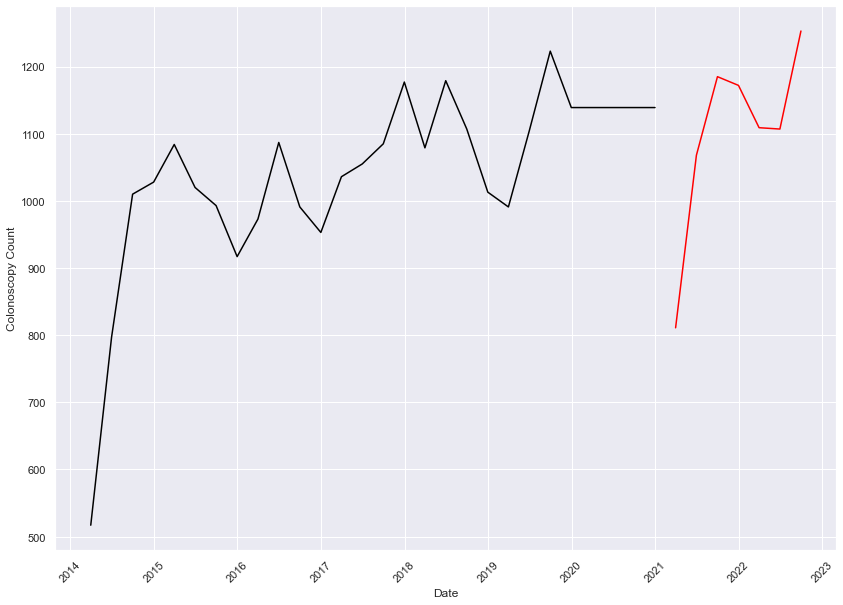

In [123]:
plt.plot(train[['ID']], color = "black", label = 'Training')
plt.plot(test[['ID']], color = "red", label = 'Testing')
plt.ylabel('Colonoscopy Count')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title="Train/Test split for Sentiment"
plt.show()

In [124]:
# The above graph shows there is no seasonality and trend, checking for stationary next using ADF Test

In [125]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test for stationary where the null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.
result = adfuller(train.ID.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -5.574355177424385
p-value: 1.443417357906189e-06
Critial Values:
   1%, -3.6996079738860943
Critial Values:
   5%, -2.9764303469999494
Critial Values:
   10%, -2.627601001371742


In [126]:
# ADF test shows p-value less than 0.05 hene the hypothesis is rejected and stationary is confirmed

In [127]:
#dfri=train.reset_index()
train

,ID
Quarterdate,
2014-03-31,517
2014-06-30,797
2014-09-30,1010
2014-12-31,1028
2015-03-31,1084
2015-06-30,1020
2015-09-30,993
2015-12-31,917
2016-03-31,973


C:\Users\raku4\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


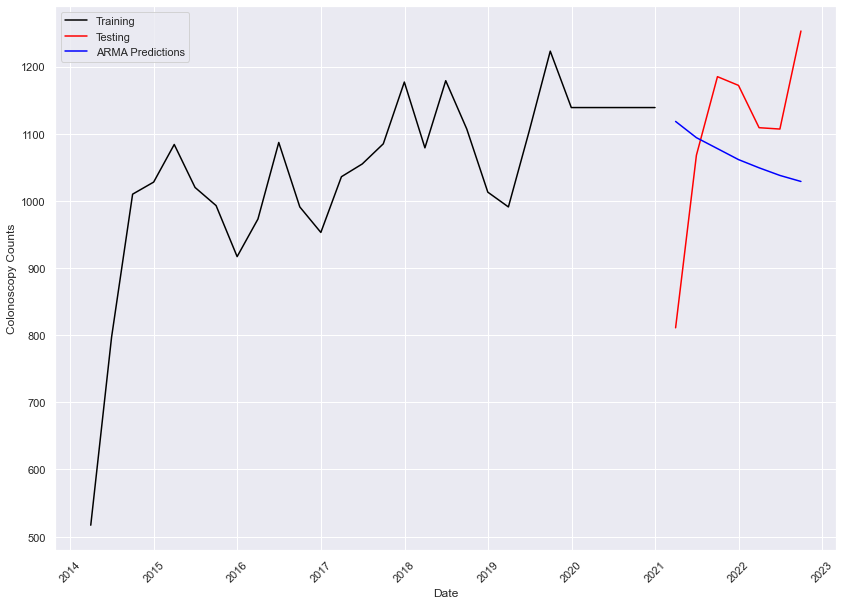

In [128]:
#ARMA modelsince there is no seasonality or trend
from statsmodels.tsa.arima.model import ARIMA 

y = train['ID']

 

ARMAmodel = ARIMA(y, order = (2, 0, 1))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outARMA = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('Colonoscopy Counts')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title="Train test and Predictions for Colonoscopy Counts"
plt.plot(y_pred_outARMA, color='blue', label = 'ARMA Predictions')
plt.legend()
plt.show()

In [129]:
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["ID"].values, y_pred_df["Predictions"])) 
print("RMSE: ",arma_rmse)

RMSE:  159.18303048925767


In [130]:
# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

In [131]:
df_timeseries

,Age,Gender,ID
Quarterdate,,,
2014-01-01,64,F,1
2014-01-01,64,M,1
2014-01-01,65,F,1
2014-01-01,65,M,3
2014-01-01,66,F,21
...,...,...,...
2022-10-01,78,F,1
2022-10-01,78,M,3
2022-10-01,79,F,2


In [132]:
#df_timeseriesQE=df_timeseries.copy()
#df_timeseriesQE=pd.DataFrame(df_timeseriesQE).reset_index()
#df_timeseriesQE

In [133]:
#df_timeseriesQE=df_timeseriesQE.set_index(pd.to_datetime(df_timeseriesQE['Quarterdate']))
#df_timeseriesQE

In [134]:

#train = df_timeseries[(df_timeseries.index < pd.to_datetime("2022-01-01", format='%Y-%m-%d')) ]
#test = df_timeseries[df_timeseries.index >= pd.to_datetime("2022-01-01", format='%Y-%m-%d')]

#print(train.shape)
#print(test.shape)
#train

In [135]:
#print(f"Train dates : {train.index.min()} --- {train.index.max()}  (n={len(train)})")
#print(f"Test dates  : {test.index.min()} --- {test.index.max()}  (n={len(test)})")

In [136]:
#test[['Age','Gender']]

In [137]:
#train['Gender'] = train['Gender'].map(gendermap)
#test.info()

In [138]:
#test['Gender'] = test['Gender'].map(gendermap)
#train

In [139]:
df_timeseriesQD = dfcolraw.groupby(['Quarterdate'])['ID'].count()
df_timeseriesQD=pd.DataFrame(df_timeseriesQD).reset_index()
df_timeseriesQD=df_timeseriesQD.set_index(pd.to_datetime(df_timeseriesQD['Quarterdate']))
#df_timeseriesQD=df_timeseriesQD[['ID']]
df_timeseriesQD = df_timeseriesQD.asfreq('Q','ffill')

df_timeseriesQD

,Quarterdate,ID
Quarterdate,,
2014-03-31,2014-01-01,517
2014-06-30,2014-04-01,797
2014-09-30,2014-07-01,1010
2014-12-31,2014-10-01,1028
2015-03-31,2015-01-01,1084
2015-06-30,2015-04-01,1020
2015-09-30,2015-07-01,993
2015-12-31,2015-10-01,917
2016-03-31,2016-01-01,973


In [140]:
dfcolraw.groupby(['Weekdate'])['ID'].count()

Weekdate
2013-12-30     11
2014-01-06     46
2014-01-13     53
2014-01-20     33
2014-01-27     39
             ... 
2022-11-28    123
2022-12-05    102
2022-12-12     94
2022-12-19     93
2022-12-26      5
Name: ID, Length: 416, dtype: int64

In [141]:
df_timeseriesWD = dfcolraw.groupby(['Weekdate'])['ID'].count()
df_timeseriesWD=pd.DataFrame(df_timeseriesWD).reset_index()
df_timeseriesWD=df_timeseriesWD.set_index(pd.to_datetime(df_timeseriesWD['Weekdate']))

df_timeseriesWD = df_timeseriesWD.asfreq('W','ffill')
df_timeseriesWD.head(2)

,Weekdate,ID
Weekdate,,
2014-01-05,2013-12-30,11
2014-01-12,2014-01-06,46


In [142]:
train = df_timeseriesQD[(df_timeseriesQD.index < pd.to_datetime("2019-01-01", format='%Y-%m-%d')) ]
test = df_timeseriesQD[df_timeseriesQD.index >= pd.to_datetime("2019-01-01", format='%Y-%m-%d')]

print(train.shape)
print(test.shape)
train

(20, 2)
(15, 2)


,Quarterdate,ID
Quarterdate,,
2014-03-31,2014-01-01,517
2014-06-30,2014-04-01,797
2014-09-30,2014-07-01,1010
2014-12-31,2014-10-01,1028
2015-03-31,2015-01-01,1084
2015-06-30,2015-04-01,1020
2015-09-30,2015-07-01,993
2015-12-31,2015-10-01,917
2016-03-31,2016-01-01,973


In [143]:
# Create and train forecaster for Quarter
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 2
                )

forecaster.fit(y=train['ID'])
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=15)
predictions.head(50)


2019-03-31    1009.46
2019-06-30     999.43
2019-09-30     966.25
2019-12-31    1000.64
2020-03-31    1025.39
2020-06-30    1057.14
2020-09-30    1059.14
2020-12-31    1125.18
2021-03-31    1104.79
2021-06-30    1086.81
2021-09-30    1098.79
2021-12-31    1086.73
2022-03-31    1098.86
2022-06-30    1086.73
2022-09-30    1098.86
Freq: Q-DEC, Name: pred, dtype: float64

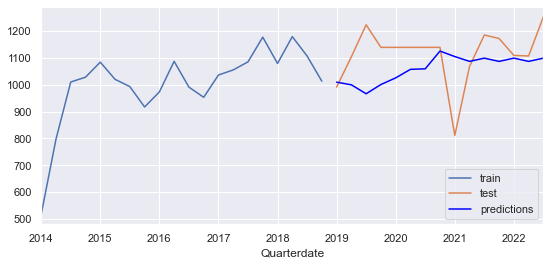

In [144]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
train['ID'].plot(ax=ax, label='train')
test['ID'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions',color='blue')
ax.legend();

In [145]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = test['ID'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 16543.93077333333


In [146]:
trainw = df_timeseriesWD[(df_timeseriesWD.index < pd.to_datetime("2019-01-01", format='%Y-%m-%d')) ]
testw = df_timeseriesWD[df_timeseriesWD.index >= pd.to_datetime("2019-01-01", format='%Y-%m-%d')]

print(trainw.shape)
print(testw.shape)
trainw

(261, 2)
(208, 2)


,Weekdate,ID
Weekdate,,
2014-01-05,2013-12-30,11
2014-01-12,2014-01-06,46
2014-01-19,2014-01-13,53
2014-01-26,2014-01-20,33
2014-02-02,2014-01-27,39
...,...,...
2018-12-02,2018-11-26,86
2018-12-09,2018-12-03,91
2018-12-16,2018-12-10,94


In [147]:
#ARMA modelsince there is no seasonality or trend
from statsmodels.tsa.arima.model import ARIMA 

y = trainw['ID']

 

ARMAmodel = ARIMA(y, order = (2, 0, 1))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(testw.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = testw.index
y_pred_outARMA = y_pred_df["Predictions"] 



C:\Users\raku4\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [148]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = testw['ID'],
                y_pred = y_pred_df["Predictions"]
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 1707.345655383809


In [149]:
# Create and train forecaster for week
# ==============================================================================
#forecaster = ForecasterAutoreg(
#                regressor = RandomForestRegressor(random_state=123),
#                lags = 2
#                )
#
#forecaster.fit(y=trainw['ID'])
#forecaster
## Predictions
## ==============================================================================
#predictions = forecaster.predict(steps=132)
#predictions.head(50)


In [150]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 2
                )

forecaster.fit(y=trainw['ID'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2] 
Transformer for y: None 
Transformer for exog: None 
Window size: 2 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2014-01-05 00:00:00'), Timestamp('2018-12-30 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: W-SUN 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2023-08-26 21:11:56 
Last fit date: 2023-08-26 21:11:57 
Skforecast version: 0.7.0 
Python version: 3.9.12 
Forecaster id: None 

In [151]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=208)
predictions

2019-01-06    46.500
2019-01-13    60.220
2019-01-20    66.000
2019-01-27    88.530
2019-02-03    86.000
               ...  
2022-11-27    92.117
2022-12-04    87.740
2022-12-11    85.970
2022-12-18    92.117
2022-12-25    87.740
Freq: W-SUN, Name: pred, Length: 208, dtype: float64

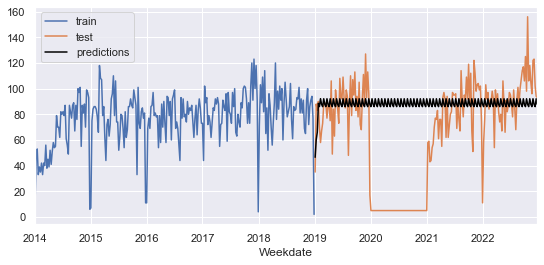

In [152]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
trainw['ID'].plot(ax=ax, label='train')
testw['ID'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions',color='black')
ax.legend();

In [153]:
trainw.tail

<bound method NDFrame.tail of              Weekdate  ID
Weekdate                 
2014-01-05 2013-12-30  11
2014-01-12 2014-01-06  46
2014-01-19 2014-01-13  53
2014-01-26 2014-01-20  33
2014-02-02 2014-01-27  39
...               ...  ..
2018-12-02 2018-11-26  86
2018-12-09 2018-12-03  91
2018-12-16 2018-12-10  94
2018-12-23 2018-12-17  77
2018-12-30 2018-12-24   2

[261 rows x 2 columns]>

In [154]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = testw['ID'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 2093.7332780806623


In [155]:
len(trainw)*0.4

104.4

In [156]:
# Hyperparameter Grid search
# ==============================================================================
steps = 36
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [60,80]
  
# Regressor's hyperparameters
param_grid = {'n_estimators': [500,1000],
              'max_depth': [100,200]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = trainw['ID'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(trainw)*0.4),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 8.


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [01:45<00:00, 52.79s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80] 
  Parameters: {'max_depth': 100, 'n_estimators': 500}
  Backtesting metric: 294.6155686624204



In [157]:
# Grid Search results
# ==============================================================================
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 100, 'n_estimators': 500}",294.615569,100,500
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 200, 'n_estimators': 500}",294.615569,200,500
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 100, 'n_estimators': 1000}",298.251596,100,1000
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 200, 'n_estimators': 1000}",298.251596,200,1000
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 100, 'n_estimators': 500}",310.497527,100,500
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 200, 'n_estimators': 500}",310.497527,200,500
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 100, 'n_estimators': 1000}",313.032953,100,1000
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 200, 'n_estimators': 1000}",313.032953,200,1000


In [158]:
# Predictors importance
# ==============================================================================
#forecaster.get_feature_importance()

In [159]:
testw['ID']

Weekdate
2019-01-06     35
2019-01-13     88
2019-01-20     83
2019-01-27     90
2019-02-03     70
             ... 
2022-11-27    122
2022-12-04    123
2022-12-11    102
2022-12-18     94
2022-12-25     93
Freq: W-SUN, Name: ID, Length: 208, dtype: int64

In [160]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=100, n_estimators=500, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 80
             )

forecaster.fit(y=testw['ID'])

In [161]:
# Create and train forecaster
# ==============================================================================
#forecaster = ForecasterAutoreg(
#    
#                    regressor = make_pipeline(StandardScaler(),  LinearRegression()),
#                    #regressor = LinearRegression(),
#                    lags = 15
#             )
#
#forecaster.fit(y=trainw['ID'])
#
## Prediction intervals
## ==============================================================================
#predictions = forecaster.predict_interval(
#                    steps    = 156,
#                    interval = [10, 70],
#                    n_boot   = 100
#              )
#
#predictions.shape

In [162]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=208)
predictions.head

<bound method NDFrame.head of 2023-01-01     96.044
2023-01-08     93.540
2023-01-15     96.708
2023-01-22     87.744
2023-01-29     94.394
               ...   
2026-11-22    119.022
2026-11-29    120.374
2026-12-06    122.086
2026-12-13    122.780
2026-12-20    119.526
Freq: W-SUN, Name: pred, Length: 208, dtype: float64>

In [163]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = testw['ID'],
                y_pred = predictions
                )

print(f"Test error (mse): {error_mse}")


Test error (mse): 2730.9597114230774


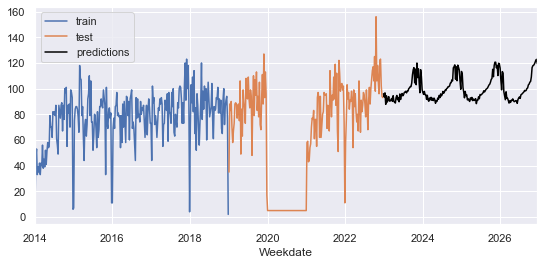

In [164]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
trainw['ID'].plot(ax=ax, label='train')
testw['ID'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions',color='black')
ax.legend();

In [165]:
print(len(trainw)*0.8)

208.8


In [166]:
# Hyperparameter Grid search
# ==============================================================================
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput

forecaster = ForecasterAutoreg(
                    regressor = make_pipeline(StandardScaler(), Lasso(random_state=123)),
                    
                    lags      = 8 # This value will be replaced in the grid search
             )

# To access parameters of a scikitlearn pipeline the pattern:
# <name of the step>__<name of the parameter>.
param_grid = {'lasso__alpha': np.logspace(-5, 5, 10)}
lags_grid = [20, 30, 40,60]

results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = trainw['ID'],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 208,
                        refit       = True,
                        metric      = 'mean_squared_error',
                        initial_train_size = int(len(trainw)*0.4),
                        fixed_train_size   = False,
                        return_best = True,
                        verbose     = False
                )

Number of models compared: 40.


loop lags_grid: 100%|███████████████████████████████████████| 4/4 [00:01<00:00,  3.40it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60] 
  Parameters: {'lasso__alpha': 3.593813663804626}
  Backtesting metric: 329.4197055633845



In [167]:
# Grid Search results
# ==============================================================================
results_grid.head()

,lags,params,mean_squared_error,lasso__alpha
35,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'lasso__alpha': 3.593813663804626},329.419706,3.593814
25,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'lasso__alpha': 3.593813663804626},330.625824,3.593814
39,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'lasso__alpha': 100000.0},330.848726,100000.000000
37,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'lasso__alpha': 599.4842503189421},330.848726,599.484250
36,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'lasso__alpha': 46.41588833612782},330.848726,46.415888


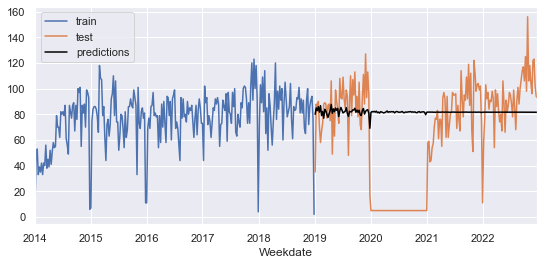

In [168]:
# Predictions
# ==============================================================================
predictions = forecaster.predict( steps    = 208)

# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
trainw['ID'].plot(ax=ax, label='train')
testw['ID'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions',color='black')
ax.legend();

In [169]:
dfcensus5569

,Age,Gender,meanE,Projectedcol
0,55,M,30059.000000,285.560500
1,56,M,29475.000000,280.012500
2,57,M,28880.333333,274.363167
3,58,M,28045.833333,266.435417
4,59,M,27271.166667,259.076083
5,60,M,26555.166667,252.274083
6,61,M,25772.500000,244.838750
7,62,M,25068.833333,238.153917
8,63,M,24299.833333,230.848417
9,64,M,23751.500000,225.639250


In [170]:
dfcensus5569['Projectedcol'].sum()

5960.201583333333

In [171]:
dfcensus_ml=dfcensus5569.loc[(dfcensus5569['Age']>=55) & (dfcensus5569['Age']<71)]
dfcensus_ml

,Age,Gender,meanE,Projectedcol
0,55,M,30059.000000,285.560500
1,56,M,29475.000000,280.012500
2,57,M,28880.333333,274.363167
3,58,M,28045.833333,266.435417
4,59,M,27271.166667,259.076083
5,60,M,26555.166667,252.274083
6,61,M,25772.500000,244.838750
7,62,M,25068.833333,238.153917
8,63,M,24299.833333,230.848417
9,64,M,23751.500000,225.639250


In [172]:
df_timeseriesml =dflspivotlt69[['Age','Gender','mean']].reset_index(drop=True)
dflspivotlt69

year,Gender,Age,2016,2017,2018,2019,2021,2022,mean
26,M,60,169.0,374.0,303.0,279.0,168.0,252.0,257.500000
2,F,60,105.0,278.0,243.0,217.0,129.0,185.0,192.833333
3,F,61,238.0,101.0,52.0,33.0,43.0,99.0,94.333333
27,M,61,366.0,160.0,113.0,64.0,73.0,149.0,154.166667
4,F,62,149.0,96.0,137.0,228.0,93.0,95.0,133.000000
28,M,62,216.0,141.0,137.0,313.0,137.0,150.0,182.333333
5,F,63,256.0,91.0,196.0,152.0,128.0,178.0,166.833333
29,M,63,352.0,144.0,263.0,191.0,170.0,208.0,221.333333
6,F,64,126.0,83.0,135.0,121.0,152.0,160.0,129.500000
30,M,64,198.0,119.0,232.0,181.0,278.0,230.0,206.333333


In [173]:
dfml = pd.merge(dfcensus_ml, df_timeseriesml, 'left',on=["Age", "Gender"])
dfml['Gender'] = dfml['Gender'].map(gendermap)

dfml

,Age,Gender,meanE,Projectedcol,mean
0,55,1,30059.000000,285.560500,NaN
1,56,1,29475.000000,280.012500,NaN
2,57,1,28880.333333,274.363167,NaN
3,58,1,28045.833333,266.435417,NaN
4,59,1,27271.166667,259.076083,NaN
5,60,1,26555.166667,252.274083,257.500000
6,61,1,25772.500000,244.838750,154.166667
7,62,1,25068.833333,238.153917,182.333333
8,63,1,24299.833333,230.848417,221.333333
9,64,1,23751.500000,225.639250,206.333333


In [174]:
dfml['mean'] = dfml['mean'].fillna(dfml['Projectedcol'])

In [175]:
dfml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           30 non-null     int64  
 1   Gender        30 non-null     int64  
 2   meanE         30 non-null     float64
 3   Projectedcol  30 non-null     float64
 4   mean          30 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.4 KB


In [176]:
dfcolpdavg=dfcolraw.groupby(['Age','Gender','CLINICID','month','year'])['ID'].count()

#dfcolpdavg=dfcolraw.groupby(['Age','proceduredate'])['ID'].count()
dfcolpdavg=pd.DataFrame(dfcolpdavg)
dfcolpdavg.reset_index(inplace=True)
dfcolpdavg['Gender'] = dfcolpdavg['Gender'].map(gendermap)

dfcolpdavg

,Age,Gender,CLINICID,month,year,ID
0,53,1,9,7,2018,1
1,57,2,24,4,2015,1
2,58,1,9,2,2018,1
3,59,2,2,3,2017,1
4,59,2,18,9,2018,1
...,...,...,...,...,...,...
17180,79,1,9,7,2022,1
17181,79,1,16,11,2022,1
17182,79,1,17,1,2022,1
17183,79,1,21,10,2022,1


In [177]:
#X = dfcolpdavg[['Age','Gender','meanE','Projectedcol']].values
dfcolpdavg

,Age,Gender,CLINICID,month,year,ID
0,53,1,9,7,2018,1
1,57,2,24,4,2015,1
2,58,1,9,2,2018,1
3,59,2,2,3,2017,1
4,59,2,18,9,2018,1
...,...,...,...,...,...,...
17180,79,1,9,7,2022,1
17181,79,1,16,11,2022,1
17182,79,1,17,1,2022,1
17183,79,1,21,10,2022,1


In [178]:
#Import Libraries for ML

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [179]:
#From the above heat map we donot find any reliable variables, creating new set of variables which stores the value in the previous row.
dfml['mean_l1'] = dfml ['mean'].shift(1)
dfml['mean_l2'] = dfml ['mean'].shift(2)
dfml['mean_l3'] = dfml ['mean'].shift(3)
dfml['mean_l4'] = dfml ['mean'].shift(4)
dfml['mean_l5'] = dfml ['mean'].shift(5)

# Display the first 10 records


dfml.bfill(axis = 0,inplace=True)

In [180]:
dfml

,Age,Gender,meanE,Projectedcol,mean,mean_l1,mean_l2,mean_l3,mean_l4,mean_l5
0,55,1,30059.000000,285.560500,285.560500,285.560500,285.560500,285.560500,285.560500,285.560500
1,56,1,29475.000000,280.012500,280.012500,285.560500,285.560500,285.560500,285.560500,285.560500
2,57,1,28880.333333,274.363167,274.363167,280.012500,285.560500,285.560500,285.560500,285.560500
3,58,1,28045.833333,266.435417,266.435417,274.363167,280.012500,285.560500,285.560500,285.560500
4,59,1,27271.166667,259.076083,259.076083,266.435417,274.363167,280.012500,285.560500,285.560500
5,60,1,26555.166667,252.274083,257.500000,259.076083,266.435417,274.363167,280.012500,285.560500
6,61,1,25772.500000,244.838750,154.166667,257.500000,259.076083,266.435417,274.363167,280.012500
7,62,1,25068.833333,238.153917,182.333333,154.166667,257.500000,259.076083,266.435417,274.363167
8,63,1,24299.833333,230.848417,221.333333,182.333333,154.166667,257.500000,259.076083,266.435417
9,64,1,23751.500000,225.639250,206.333333,221.333333,182.333333,154.166667,257.500000,259.076083


<AxesSubplot:>

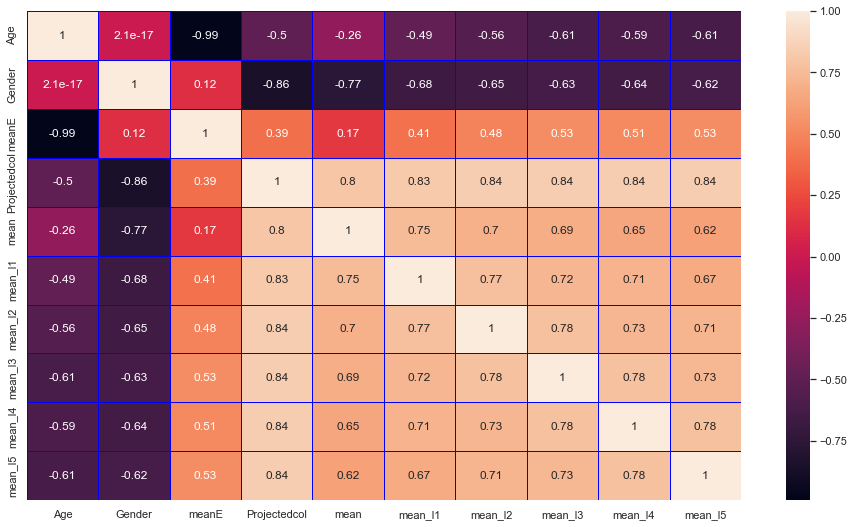

In [181]:
correlation = dfml.corr()

#After the columns are added
plt.figure(figsize=(16,9))
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

Training data Accuracy :  0.5859085542147588
Testing data  Accuracy :  -34.177945477173495


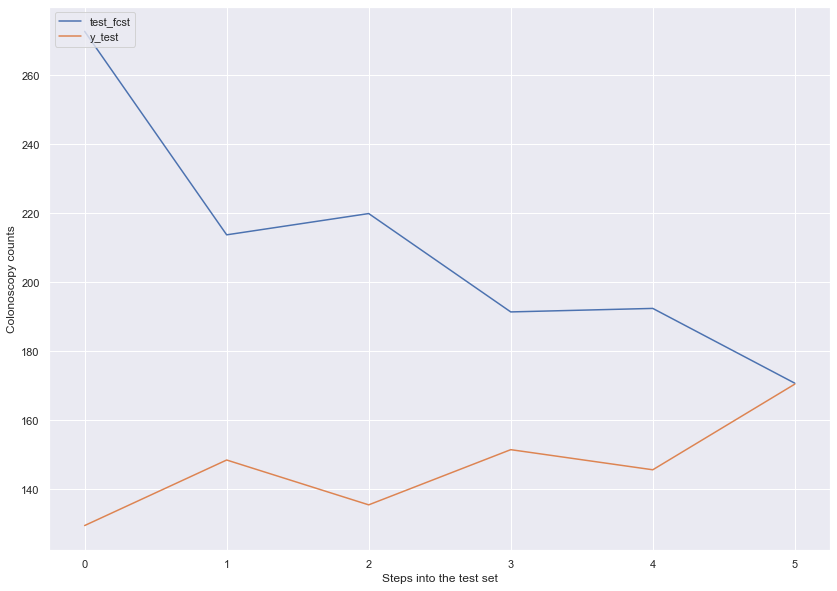

In [182]:


# Create X and y objects
X = dfml[['Projectedcol','mean_l1']].values
y = dfml['mean'].values

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12345, shuffle = False)


#Feature scalingmap
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Fit model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

# Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

lr_train_r2=train_r2
lr_test_r2=test_r2
# Display the training and test score
print("Training data Accuracy : ",train_r2)
print("Testing data  Accuracy : ",test_r2)
# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
#plt.title('Fig 3')
plt.xlabel('Steps into the test set')
plt.ylabel('Colonoscopy counts')
plt.legend(['test_fcst', 'y_test'], loc='upper left')

plt.show()

In [183]:
X_train

array([[ 1.76213132,  1.3871431 ],
       [ 1.62636391,  1.3871431 ],
       [ 1.48811674,  1.27786135],
       [ 1.29411349,  1.1665836 ],
       [ 1.1140202 ,  1.01042672],
       [ 0.94756565,  0.86546624],
       [ 0.76561253,  0.83442133],
       [ 0.60202521, -1.20098726],
       [ 0.42324929, -0.64617427],
       [ 0.29577362,  0.12202833],
       [ 0.14567005, -0.17343421],
       [-0.0267902 ,  0.26975959],
       [-0.17379406, -0.18000005],
       [-0.34838536,  0.24677917],
       [-0.5037197 ,  0.25991084],
       [-0.63996674,  1.2710493 ],
       [-0.70731493, -0.54635094],
       [-0.79140686, -0.60056076],
       [-0.92704864, -0.66824795],
       [-1.0402742 , -0.77742858],
       [-1.16011765, -0.86856597],
       [-1.26961132, -0.43935049],
       [-1.37738832, -2.37955448],
       [-1.49882404, -1.61791772]])

# Cross Validation

# GRID SEARCH CV

In [184]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 2, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
rf =RandomForestRegressor()
lm.fit(X_train, y_train)
rf.fit(X_train, y_train)
rfe = RFE(rf)             
lre = RFE(lm)      
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=100, shuffle=True),
             estimator=RFE(estimator=RandomForestRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [185]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

#Store the average scores in a variable for comparisions
lm_cv_train=cv_results['mean_train_score'].mean()
lm_cv_test=cv_results['mean_test_score'].mean()
print(lm_cv_train)
print(lm_cv_test)

0.9024741005354052
0.40496939557908584


Fitting 2 folds for each of 3 candidates, totalling 6 fits
0.6044480728204839
0.32812394521893823


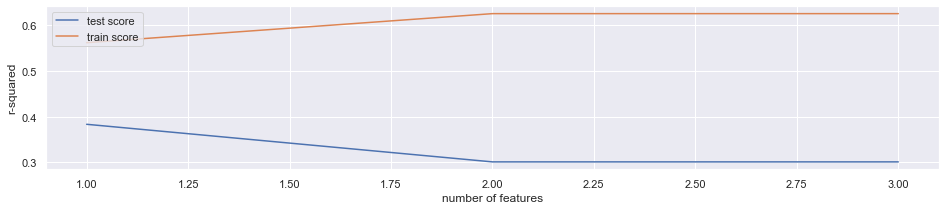

In [186]:
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = lre, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

#Store the average scores in a variable for comparisions
lm_cv_train=cv_results['mean_train_score'].mean()
lm_cv_test=cv_results['mean_test_score'].mean()
print(lm_cv_train)
print(lm_cv_test)

# plotting cv results
plt.figure(figsize=(16,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# K Neighbours Regressor

In [187]:
from sklearn.neighbors import KNeighborsRegressor

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12345, shuffle = False)





neighbors=np.arange(1,20)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Declare and initialise kNN classifier with k neighbors
    kNR = KNeighborsRegressor(n_neighbors = k)
    
    #Call the method fit to train the model
    kNR.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i]=kNR.score(X_train,y_train)
    
    #Compute accuracy on the training set
    test_accuracy[i]=kNR.score(X_test,y_test)
    
    
knr_train_acc=train_accuracy.mean()
knr_test_acc=test_accuracy.mean()
print(knr_train_acc)
print(knr_test_acc)

0.39185429325645343
-7.331460313339352


# Decision Tree Regressor

In [188]:
# import DecisionTreeRegressor from the sklearn library
from sklearn.tree import DecisionTreeRegressor



tree = DecisionTreeRegressor(max_depth = 4)
tree.fit(X_train, y_train)

# Return a copy of the array collapsed into one dimension.
sort_idx = X.flatten().argsort()
len(sort_idx)
#lin_regplot(X[sort_idx], y[sort_idx], tree)
# plt.xlabel('% lower status of the population [LSTAT]')
# plt.ylabel('Price in $1000\'s [MEDV]')
# # plt.savefig('./figures/tree_regression.png', dpi = 300)
# plt.show()

60

In [189]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Display the r2 score values
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

DT_R2_Train=r2_score(y_train, y_train_pred)
DT_R2_Test=r2_score(y_test, y_test_pred)

R^2 train: 0.982, test: -5.318


In [190]:
#print("Train Prediction : ",y_train_pred)
#print("Test Prediction : ",y_test_pred)
    #Compute accuracy on the training set
train_accuracy[i]=tree.score(X_train,y_train)
    
    #Compute accuracy on the training set
test_accuracy[i]=tree.score(X_test,y_test)

DT_Train_acc=train_accuracy.mean()
DT_Test_acc=test_accuracy.mean()
print(DT_Train_acc)
print(DT_Test_acc)


0.43829948796222346
-6.994688262198913


# GRID CV

In [ ]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 2, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


In [191]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]


# step-3: perform grid search
# 3.1 specify model
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
rfe = RFE(tree)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RFE(estimator=DecisionTreeRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [192]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

,rank_test_score,param_n_features_to_select,mean_train_score,mean_test_score
0,1,1,0.999797,-0.123732
1,2,2,1.000000,-0.505290
2,3,3,1.000000,-0.549889


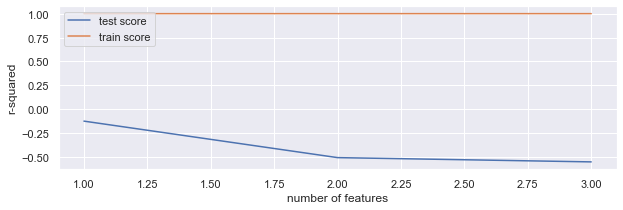

In [193]:
# plotting cv results
plt.figure(figsize=(10,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [194]:
#Random Forest Regressor

In [195]:
# import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor







# Create an object forest by calling a method RandomForestRegressor()
forest = RandomForestRegressor(n_estimators = 1000, 
                               criterion = 'mse', 
                               random_state = 1, 
                               n_jobs = -1)

# Train the Model by calling a fit() method
forest.fit(X_train, y_train)



RandomForestRegressor(criterion='mse', n_estimators=1000, n_jobs=-1,
                      random_state=1)

In [196]:
# All the ML algorthims shows very small accruarcy.

In [197]:
dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname,Quarterdate,Weekdate,Monthdate
0,1314,68,2014-01-03,M,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
1,1315,69,2014-01-03,M,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
2,1316,68,2014-01-03,F,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
3,1319,68,2014-01-03,F,1,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
4,1320,67,2014-01-03,M,1,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
33605,38654,70,2022-12-03,M,16,1,12,2022,Dec,2022-10-01,2022-11-28,2022-12-01
33606,38926,65,2022-09-29,F,15,1,9,2022,Sep,2022-07-01,2022-09-26,2022-09-01
33607,38953,71,2022-12-04,F,16,1,12,2022,Dec,2022-10-01,2022-11-28,2022-12-01
33608,38971,66,2022-12-02,M,8,1,12,2022,Dec,2022-10-01,2022-11-28,2022-12-01


In [198]:
#dfml = pd.merge(dfcensus_ml, df_timeseriesml, 'left',on=["Age", "Gender"])
#dfml['Gender'] = dfml['Gender'].map(gendermap)

dfcensus_ml.describe()
dfcensus_ml

,Age,Gender,meanE,Projectedcol
0,55,M,30059.000000,285.560500
1,56,M,29475.000000,280.012500
2,57,M,28880.333333,274.363167
3,58,M,28045.833333,266.435417
4,59,M,27271.166667,259.076083
5,60,M,26555.166667,252.274083
6,61,M,25772.500000,244.838750
7,62,M,25068.833333,238.153917
8,63,M,24299.833333,230.848417
9,64,M,23751.500000,225.639250


In [199]:
#dfcensus_ml.groupby(['year'])['ID'].count()


In [200]:
#Yearly average above is 188. Daily average is 188/52(weeks)=3.6 (4). Will add this to the weekly numbers from the colonoscopy records

In [201]:
df_timeseriesWD

,Weekdate,ID
Weekdate,,
2014-01-05,2013-12-30,11
2014-01-12,2014-01-06,46
2014-01-19,2014-01-13,53
2014-01-26,2014-01-20,33
2014-02-02,2014-01-27,39
...,...,...
2022-11-27,2022-11-21,122
2022-12-04,2022-11-28,123
2022-12-11,2022-12-05,102


In [202]:
df_timeseriesWD['ID']=df_timeseriesWD['ID']+4

In [203]:
df_timeseriesWD.reset_index(drop=True,inplace=True)
df_timeseriesWD.rename(columns = {'ID':'Counts'}, inplace = True)
df_timeseriesWD

,Weekdate,Counts
0,2013-12-30,15
1,2014-01-06,50
2,2014-01-13,57
3,2014-01-20,37
4,2014-01-27,43
...,...,...
464,2022-11-21,126
465,2022-11-28,127
466,2022-12-05,106
467,2022-12-12,98


In [204]:
#From the above heat map we donot find any reliable variables, creating new set of variables which stores the value in the previous row.
df_timeseriesWD['Counts_l1'] = df_timeseriesWD ['Counts'].shift(1)
df_timeseriesWD['Counts_l2'] = df_timeseriesWD ['Counts'].shift(2)
df_timeseriesWD['Counts_l3'] = df_timeseriesWD ['Counts'].shift(3)
df_timeseriesWD['Counts_l4'] = df_timeseriesWD ['Counts'].shift(4)
df_timeseriesWD['Counts_l5'] = df_timeseriesWD ['Counts'].shift(5)
df_timeseriesWD

,Weekdate,Counts,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
0,2013-12-30,15,NaN,NaN,NaN,NaN,NaN
1,2014-01-06,50,15.0,NaN,NaN,NaN,NaN
2,2014-01-13,57,50.0,15.0,NaN,NaN,NaN
3,2014-01-20,37,57.0,50.0,15.0,NaN,NaN
4,2014-01-27,43,37.0,57.0,50.0,15.0,NaN
...,...,...,...,...,...,...,...
464,2022-11-21,126,100.0,109.0,122.0,110.0,160.0
465,2022-11-28,127,126.0,100.0,109.0,122.0,110.0
466,2022-12-05,106,127.0,126.0,100.0,109.0,122.0
467,2022-12-12,98,106.0,127.0,126.0,100.0,109.0


In [205]:
df_timeseriesWD.bfill(axis = 0,inplace=True)
df_timeseriesWD

,Weekdate,Counts,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
0,2013-12-30,15,15.0,15.0,15.0,15.0,15.0
1,2014-01-06,50,15.0,15.0,15.0,15.0,15.0
2,2014-01-13,57,50.0,15.0,15.0,15.0,15.0
3,2014-01-20,37,57.0,50.0,15.0,15.0,15.0
4,2014-01-27,43,37.0,57.0,50.0,15.0,15.0
...,...,...,...,...,...,...,...
464,2022-11-21,126,100.0,109.0,122.0,110.0,160.0
465,2022-11-28,127,126.0,100.0,109.0,122.0,110.0
466,2022-12-05,106,127.0,126.0,100.0,109.0,122.0
467,2022-12-12,98,106.0,127.0,126.0,100.0,109.0


In [206]:
#Quarter df

df_timeseriesQD
df_timeseriesQD['ID']=df_timeseriesQD['ID']+(188/4)
df_timeseriesQD=df_timeseriesQD.reset_index(drop=True)
df_timeseriesQD=df_timeseriesQD.rename(columns = {'ID':'Counts'})
df_timeseriesQD['Counts_l1'] = df_timeseriesQD ['Counts'].shift(1)
df_timeseriesQD['Counts_l2'] = df_timeseriesQD ['Counts'].shift(2)
df_timeseriesQD['Counts_l3'] = df_timeseriesQD ['Counts'].shift(3)
df_timeseriesQD['Counts_l4'] = df_timeseriesQD ['Counts'].shift(4)
df_timeseriesQD['Counts_l5'] = df_timeseriesQD ['Counts'].shift(5)

df_timeseriesQD

,Quarterdate,Counts,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
0,2014-01-01,564.0,NaN,NaN,NaN,NaN,NaN
1,2014-04-01,844.0,564.0,NaN,NaN,NaN,NaN
2,2014-07-01,1057.0,844.0,564.0,NaN,NaN,NaN
3,2014-10-01,1075.0,1057.0,844.0,564.0,NaN,NaN
4,2015-01-01,1131.0,1075.0,1057.0,844.0,564.0,NaN
5,2015-04-01,1067.0,1131.0,1075.0,1057.0,844.0,564.0
6,2015-07-01,1040.0,1067.0,1131.0,1075.0,1057.0,844.0
7,2015-10-01,964.0,1040.0,1067.0,1131.0,1075.0,1057.0
8,2016-01-01,1020.0,964.0,1040.0,1067.0,1131.0,1075.0
9,2016-04-01,1134.0,1020.0,964.0,1040.0,1067.0,1131.0


In [207]:
dfcolraw.head()

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname,Quarterdate,Weekdate,Monthdate
0,1314,68,2014-01-03,M,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
1,1315,69,2014-01-03,M,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
2,1316,68,2014-01-03,F,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
3,1319,68,2014-01-03,F,1,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
4,1320,67,2014-01-03,M,1,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01


In [208]:
df_timeseriesMD = dfcolraw.groupby(['Monthdate'])['ID'].count()
df_timeseriesMD=pd.DataFrame(df_timeseriesMD).reset_index()
df_timeseriesMD=df_timeseriesMD.set_index(pd.to_datetime(df_timeseriesMD['Monthdate']))
#df_timeseriesQD=df_timeseriesQD[['ID']]
df_timeseriesMD = df_timeseriesMD.asfreq('M','bfill')

df_timeseriesMD.head(2)

,Monthdate,ID
Monthdate,,
2014-01-31,2014-02-01,152
2014-02-28,2014-03-01,183


In [209]:
##Month df

df_timeseriesMD
df_timeseriesMD=df_timeseriesMD.rename(columns = {'ID':'Counts'})
df_timeseriesMD['ID']=df_timeseriesMD['Counts']+(188/12)
df_timeseriesMD=df_timeseriesMD.reset_index(drop=True)
df_timeseriesMD['Counts_l1'] = df_timeseriesMD ['Counts'].shift(1)
df_timeseriesMD['Counts_l2'] = df_timeseriesMD ['Counts'].shift(2)
df_timeseriesMD['Counts_l3'] = df_timeseriesMD ['Counts'].shift(3)
df_timeseriesMD['Counts_l4'] = df_timeseriesMD ['Counts'].shift(4)
df_timeseriesMD['Counts_l5'] = df_timeseriesMD ['Counts'].shift(5)

df_timeseriesMD

,Monthdate,Counts,ID,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
0,2014-02-01,152,167.666667,NaN,NaN,NaN,NaN,NaN
1,2014-03-01,183,198.666667,152.0,NaN,NaN,NaN,NaN
2,2014-04-01,218,233.666667,183.0,152.0,NaN,NaN,NaN
3,2014-05-01,277,292.666667,218.0,183.0,152.0,NaN,NaN
4,2014-06-01,302,317.666667,277.0,218.0,183.0,152.0,NaN
...,...,...,...,...,...,...,...,...
102,2022-08-01,423,438.666667,365.0,393.0,371.0,343.0,401.0
103,2022-09-01,465,480.666667,423.0,365.0,393.0,371.0,343.0
104,2022-10-01,489,504.666667,465.0,423.0,365.0,393.0,371.0
105,2022-11-01,514,529.666667,489.0,465.0,423.0,365.0,393.0


In [210]:
df_timeseriesMD.bfill(axis = 0,inplace=True)


In [211]:
df_timeseriesQD.bfill(axis = 0,inplace=True)


<AxesSubplot:>

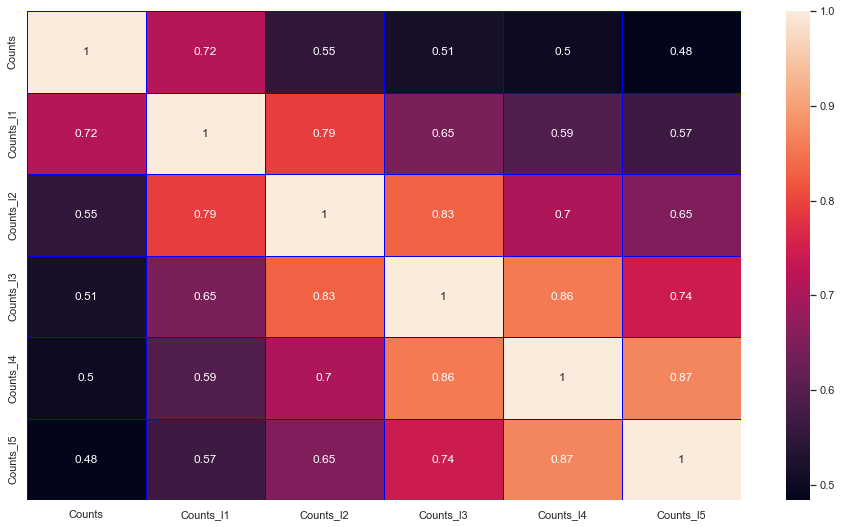

In [212]:
correlation = df_timeseriesQD.corr()

#After the columns are added
plt.figure(figsize=(16,9))
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [213]:
# Create X and y objects
X = df_timeseriesQD[['Counts_l1','Counts_l2','Counts_l3','Counts_l4']].values
y = df_timeseriesQD['Counts'].values

In [278]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12345, shuffle = False)


Training data Accuracy :  0.4254584311574853
Testing data  Accuracy :  0.800214578390973


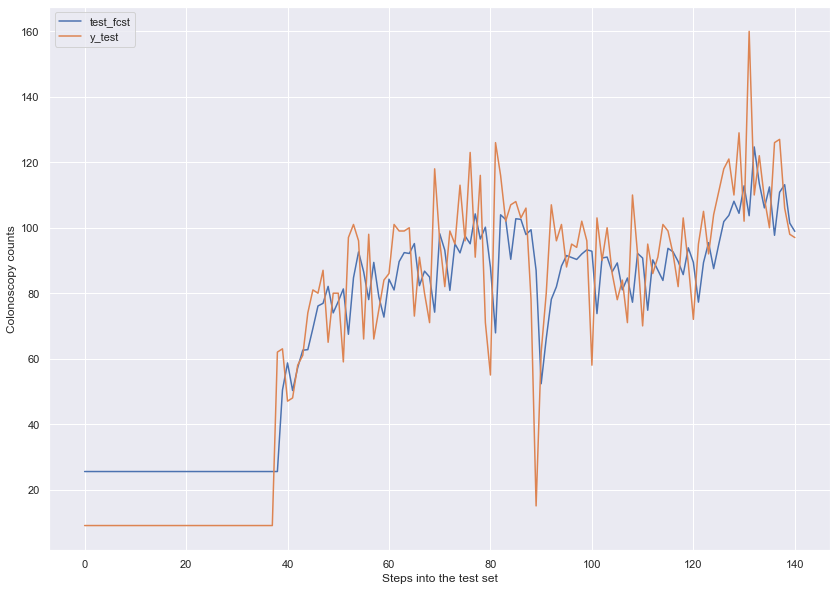

In [279]:


#Feature scalingmap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)

# Fit model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

# Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

lr_train_r2=train_r2
lr_test_r2=test_r2
# Display the training and test score
print("Training data Accuracy : ",train_r2)
print("Testing data  Accuracy : ",test_r2)
# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
#plt.title('Fig 3')
plt.xlabel('Steps into the test set')
plt.ylabel('Colonoscopy counts')
plt.legend(['test_fcst', 'y_test'], loc='upper left')

plt.show()

In [216]:
#CV

In [280]:
# k-fold CV (using all the  variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=3)
scores.mean()

0.19638506816967494

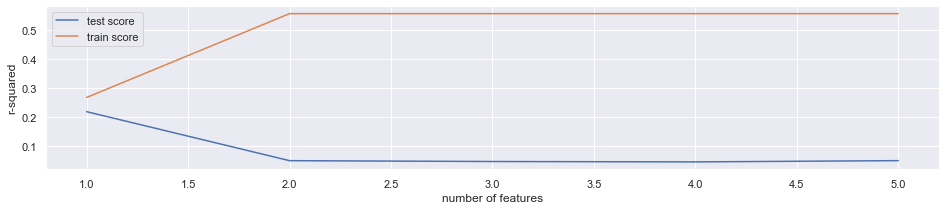

In [281]:
# plotting cv results
plt.figure(figsize=(16,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [219]:
# k-fold CV (using all the  variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=2)
scores.mean()

-1.1939380609496786

# GRIDCV

In [282]:
# k-fold CV (using all the  variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=2)
scores.mean()

0.34712430253900123

In [283]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 2, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

0.40961248566766745
0.3783268233339195


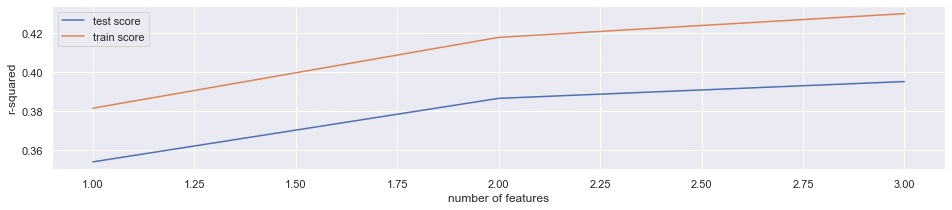

In [284]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

#Store the average scores in a variable for comparisions
lm_cv_train=cv_results['mean_train_score'].mean()
lm_cv_test=cv_results['mean_test_score'].mean()
print(lm_cv_train)
print(lm_cv_test)

# plotting cv results
plt.figure(figsize=(16,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

DT Regression

In [294]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, shuffle = False)


In [295]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 6))}]


#-----
#parameters = {
#    'n_estimators': [100, 150, 200, 250, 300],
#    'max_depth': [1,2,3,4],
#}
#regr = RandomForestRegressor(random_state=0)
#
#clf = GridSearchCV(regr, parameters)
#clf.fit(X_train, y_train)
#----

# step-3: perform grid search
# 3.1 specify model
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
rfe = RFE(tree)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RFE(estimator=DecisionTreeRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='r2', verbose=1)

In [296]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

,rank_test_score,param_n_features_to_select,mean_train_score,mean_test_score
0,1,1,0.790106,0.542795
1,5,2,0.984923,0.398392
2,3,3,0.991818,0.413469
3,2,4,0.991818,0.420096
4,4,5,0.991818,0.408349


In [304]:
# import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor


# Create an object forest by calling a method RandomForestRegressor()
forest = RandomForestRegressor(n_estimators = 1000, 
                               criterion = 'mse', 
                               random_state = 1, 
                               n_jobs = -1)

# Train the Model by calling a fit() method
forest.fit(X_train, y_train)

scores = cross_val_score(forest, X_train, y_train, scoring='r2', cv=2)
scores.mean()

0.38165787701641923

In [306]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 2, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
rf =RandomForestRegressor()
lm.fit(X_train, y_train)
rf.fit(X_train, y_train)
rfe = RFE(rf)             
lre = RFE(lm)      
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=100, shuffle=True),
             estimator=RFE(estimator=RandomForestRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [307]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

#Store the average scores in a variable for comparisions
rf_cv_train=cv_results['mean_train_score'].mean()
rf_cv_test=cv_results['mean_test_score'].mean()
print(rf_cv_train)
print(rf_cv_test)

0.8930354159780372
0.6061255969792011


In [298]:
#Predictions
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
y_train_pred


array([ 33.21068532,  33.21068532,  53.07258333,  42.912     ,
        45.13041667,  45.016     ,  48.792     ,  40.453     ,
        47.223     ,  43.075     ,  56.166     ,  47.786     ,
        52.226     ,  48.627     ,  55.983     ,  47.659     ,
        54.989     ,  56.701     ,  62.592     ,  60.777     ,
        75.161     ,  74.728     ,  74.593     ,  72.917     ,
        84.131     ,  83.822     ,  84.436     ,  81.605     ,
        82.97      ,  72.291     ,  68.795     ,  63.046     ,
        89.432     ,  86.282     ,  82.693     ,  86.308     ,
        88.159     ,  77.392     ,  92.308     ,  83.591     ,
        95.91      ,  95.677     , 100.628     ,  62.207     ,
        89.112     ,  86.585     ,  91.147     ,  77.05      ,
        92.87      ,  96.827     ,  96.216     ,  33.799     ,
        21.141     ,  57.18668057,  84.814     ,  87.593     ,
        89.656     ,  88.731     ,  83.573     ,  73.716     ,
       103.289     , 103.828     , 111.06      ,  89.13

In [308]:
# Display the r2 score values
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R2_RF_train=r2_score(y_train, y_train_pred)
R2_RF_test=r2_score(y_test,y_test_pred)

R^2 train: 0.949, test: -0.524


In [229]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [230]:

y_pred_train = clf.predict(X_train)
mean_squared_error(y_train, y_pred_train)


8508.546738907222

In [309]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12345, shuffle = False)


In [310]:
import lightgbm as lgb


In [311]:
model = lgb.LGBMRegressor(random_state=42,max_depth=100)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20)

[20]	training's l2: 264.081	valid_0's l2: 437.808
[40]	training's l2: 207.988	valid_0's l2: 363.452
[60]	training's l2: 170.29	valid_0's l2: 387.978
[80]	training's l2: 145.336	valid_0's l2: 396.669
[100]	training's l2: 126.398	valid_0's l2: 413.47


LGBMRegressor(max_depth=100, random_state=42)

In [312]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.8069
Testing accuracy 0.7525


In [235]:
#Yearly average above is 188. Daily average is 188/365=0.6. Will add this to the weekly numbers from the colonoscopy records

# Daily data

In [318]:
df_timeseriesD = dfcolraw.groupby(['proceduredate'])['ID'].count()


In [319]:
df_timeseriesD=pd.DataFrame(df_timeseriesD).reset_index()
df_timeseriesD=df_timeseriesD.set_index(pd.to_datetime(df_timeseriesD['proceduredate']))

df_timeseriesD = df_timeseriesD.asfreq('D','bfill')
df_timeseriesD = df_timeseriesD.sort_index()
df_timeseriesD=df_timeseriesD[['ID']]
df_timeseriesD.head(100)

,ID
proceduredate,
2014-01-03,11
2014-01-04,5
2014-01-05,5
2014-01-06,5
2014-01-07,10
...,...
2014-04-08,20
2014-04-09,16
2014-04-10,8


In [320]:
traind = df_timeseriesD[(df_timeseriesD.index < pd.to_datetime("2020-01-01", format='%Y-%m-%d')) ]
testd = df_timeseriesD[df_timeseriesD.index >= pd.to_datetime("2020-01-01", format='%Y-%m-%d')]

print(traind.shape)
print(testd.shape)
testd.tail()

(2189, 1)
(1095, 1)


,ID
proceduredate,
2022-12-26,2
2022-12-27,2
2022-12-28,2
2022-12-29,1
2022-12-30,2


In [321]:
testd

,ID
proceduredate,
2020-01-01,17
2020-01-02,17
2020-01-03,17
2020-01-04,17
2020-01-05,17
...,...
2022-12-26,2
2022-12-27,2
2022-12-28,2


In [322]:
# Create and train forecaster for Quarter
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 500
                )

forecaster.fit(y=traind['ID'])
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=1095)
predictions.tail(50)

2022-11-11    11.12
2022-11-12    23.06
2022-11-13    22.63
2022-11-14    22.73
2022-11-15    21.53
2022-11-16    11.46
2022-11-17    19.40
2022-11-18     9.77
2022-11-19    23.73
2022-11-20    23.74
2022-11-21    23.89
2022-11-22    22.34
2022-11-23    17.74
2022-11-24    19.38
2022-11-25    10.79
2022-11-26    22.97
2022-11-27    22.64
2022-11-28    22.74
2022-11-29    21.60
2022-11-30    11.58
2022-12-01    19.22
2022-12-02     9.79
2022-12-03    23.82
2022-12-04    23.77
2022-12-05    23.90
2022-12-06    22.37
2022-12-07    17.64
2022-12-08    19.25
2022-12-09    11.08
2022-12-10    22.79
2022-12-11    22.61
2022-12-12    22.69
2022-12-13    21.63
2022-12-14    11.52
2022-12-15    19.18
2022-12-16     9.99
2022-12-17    23.63
2022-12-18    23.77
2022-12-19    23.88
2022-12-20    22.41
2022-12-21    17.86
2022-12-22    19.36
2022-12-23    10.77
2022-12-24    22.95
2022-12-25    22.57
2022-12-26    22.76
2022-12-27    21.67
2022-12-28    11.58
2022-12-29    19.35
2022-12-30     9.80


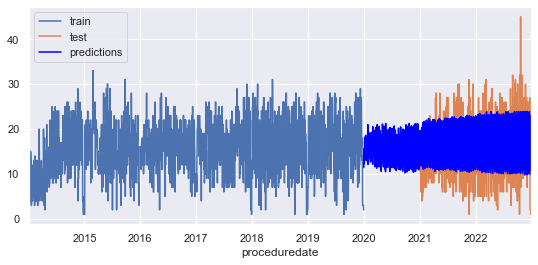

In [323]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
traind['ID'].plot(ax=ax, label='train')
testd['ID'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions',color='blue')
ax.legend();

In [324]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = testd['ID'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 39.26459552511415


In [325]:
df_daily = dfcolraw.groupby(['proceduredate','Age','Gender'])['ID'].count()
df_daily=pd.DataFrame(df_daily)
df_daily.reset_index(inplace=True)
df_daily

,proceduredate,Age,Gender,ID
0,2014-01-03,67,F,1
1,2014-01-03,67,M,2
2,2014-01-03,68,F,2
3,2014-01-03,68,M,1
4,2014-01-03,69,F,1
...,...,...,...,...
22677,2022-12-28,65,M,1
22678,2022-12-28,67,F,1
22679,2022-12-29,68,F,1
22680,2022-12-30,60,M,1


In [326]:
#Yearly average above is 188. Daily average is 188/365=0.6. Will add this to the daily numbers from the colonoscopy records
df_timeseriesPD=df_timeseriesD

df_timeseriesPD['ID']=df_timeseriesPD['ID']+1
df_timeseriesPD

,ID
proceduredate,
2014-01-03,12
2014-01-04,6
2014-01-05,6
2014-01-06,6
2014-01-07,11
...,...
2022-12-26,3
2022-12-27,3
2022-12-28,3


In [245]:
#df_timeseriesPD['Gender'] = df_timeseriesPD['Gender'].map(gendermap)


In [327]:
#df_timeseriesPD.reset_index(inplace=True)
df_timeseriesPD.rename(columns = {'ID':'Counts'}, inplace = True)
df_timeseriesPD

,Counts
proceduredate,
2014-01-03,12
2014-01-04,6
2014-01-05,6
2014-01-06,6
2014-01-07,11
...,...
2022-12-26,3
2022-12-27,3
2022-12-28,3


In [328]:
#From the above heat map we donot find any reliable variables, creating new set of variables which stores the value in the previous row.
df_timeseriesPD['Counts_l1'] = df_timeseriesPD ['Counts'].shift(1)
df_timeseriesPD['Counts_l2'] = df_timeseriesPD ['Counts'].shift(2)
df_timeseriesPD['Counts_l3'] = df_timeseriesPD ['Counts'].shift(3)
df_timeseriesPD['Counts_l4'] = df_timeseriesPD ['Counts'].shift(4)
df_timeseriesPD['Counts_l5'] = df_timeseriesPD ['Counts'].shift(5)
df_timeseriesPD

,Counts,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
proceduredate,,,,,,
2014-01-03,12,NaN,NaN,NaN,NaN,NaN
2014-01-04,6,12.0,NaN,NaN,NaN,NaN
2014-01-05,6,6.0,12.0,NaN,NaN,NaN
2014-01-06,6,6.0,6.0,12.0,NaN,NaN
2014-01-07,11,6.0,6.0,6.0,12.0,NaN
...,...,...,...,...,...,...
2022-12-26,3,3.0,3.0,4.0,20.0,28.0
2022-12-27,3,3.0,3.0,3.0,4.0,20.0
2022-12-28,3,3.0,3.0,3.0,3.0,4.0


In [329]:
df_timeseriesPD.bfill(axis = 0,inplace=True)
df_timeseriesPD

,Counts,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
proceduredate,,,,,,
2014-01-03,12,12.0,12.0,12.0,12.0,12.0
2014-01-04,6,12.0,12.0,12.0,12.0,12.0
2014-01-05,6,6.0,12.0,12.0,12.0,12.0
2014-01-06,6,6.0,6.0,12.0,12.0,12.0
2014-01-07,11,6.0,6.0,6.0,12.0,12.0
...,...,...,...,...,...,...
2022-12-26,3,3.0,3.0,4.0,20.0,28.0
2022-12-27,3,3.0,3.0,3.0,4.0,20.0
2022-12-28,3,3.0,3.0,3.0,3.0,4.0


<AxesSubplot:>

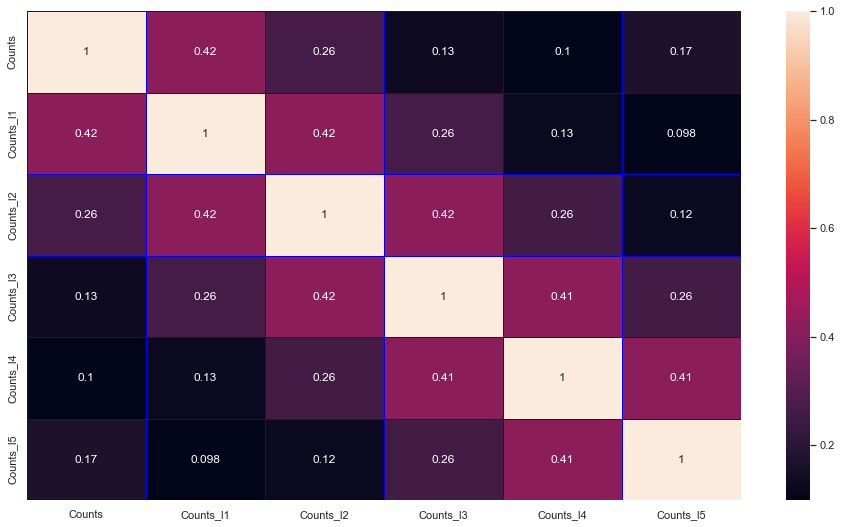

In [330]:
correlation = df_timeseriesPD.corr()

#After the columns are added
plt.figure(figsize=(16,9))
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [335]:
# Create X and y objects
X = df_timeseriesPD[['Counts_l1','Counts_l2']].values
y = df_timeseriesPD['Counts'].values

In [336]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12345, shuffle = False)


Training data Accuracy :  0.23144268042913274
Testing data  Accuracy :  0.06145745184843421


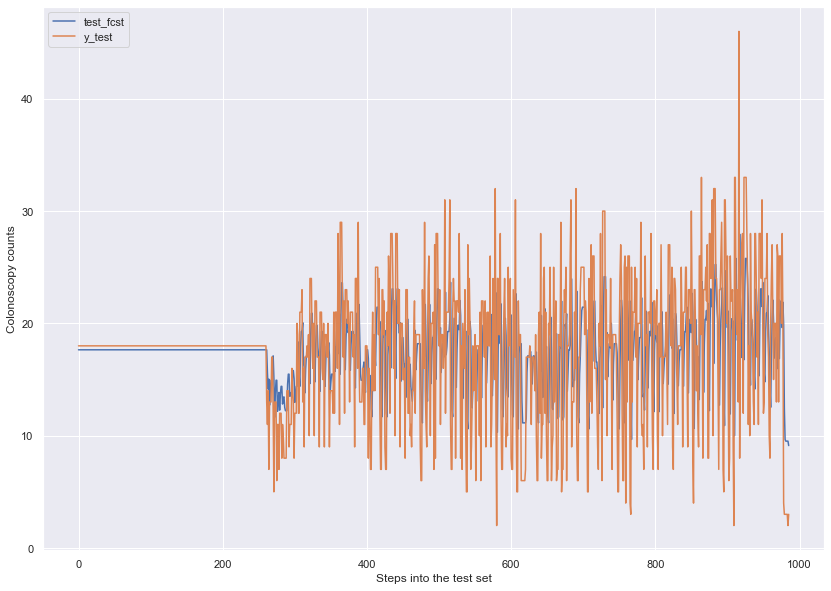

In [337]:


#Feature scalingmap
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)

# Fit model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

# Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

lr_train_r2=train_r2
lr_test_r2=test_r2
# Display the training and test score
print("Training data Accuracy : ",train_r2)
print("Testing data  Accuracy : ",test_r2)
# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
#plt.title('Fig 3')
plt.xlabel('Steps into the test set')
plt.ylabel('Colonoscopy counts')
plt.legend(['test_fcst', 'y_test'], loc='upper left')

plt.show()

In [338]:
# k-fold CV (using all the  variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=2)
scores.mean()

0.1356664044279659

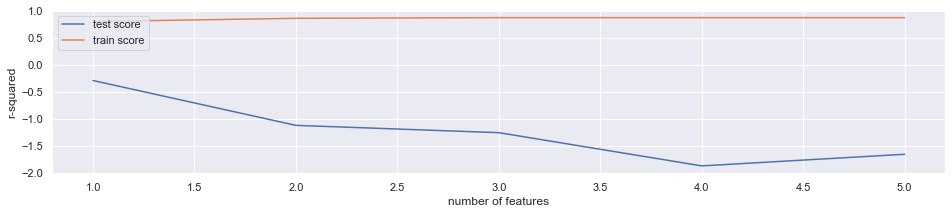

In [254]:
# plotting cv results
plt.figure(figsize=(16,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [339]:
# k-fold CV (using all the  variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=2)
scores.mean()

0.1356664044279659

# GRID CV

In [340]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 2, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

0.22632626617063253
0.2243761693040621


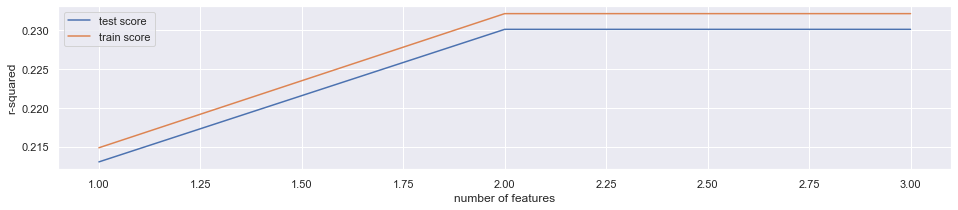

In [341]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

#Store the average scores in a variable for comparisions
lm_cv_train=cv_results['mean_train_score'].mean()
lm_cv_test=cv_results['mean_test_score'].mean()
print(lm_cv_train)
print(lm_cv_test)

# plotting cv results
plt.figure(figsize=(16,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [342]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 2, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
rf =RandomForestRegressor()
lm.fit(X_train, y_train)
rf.fit(X_train, y_train)
rfe = RFE(rf)             
lre = RFE(lm)      
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=100, shuffle=True),
             estimator=RFE(estimator=RandomForestRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [343]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

#Store the average scores in a variable for comparisions
rf_cv_train=cv_results['mean_train_score'].mean()
rf_cv_test=cv_results['mean_test_score'].mean()
print(rf_cv_train)
print(rf_cv_test)

0.4674951158800669
0.17222588122128626


# Decision Tree

In [344]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 6))}]


#-----
#parameters = {
#    'n_estimators': [100, 150, 200, 250, 300],
#    'max_depth': [1,2,3,4],
#}
#regr = RandomForestRegressor(random_state=0)
#
#clf = GridSearchCV(regr, parameters)
#clf.fit(X_train, y_train)
#----

# step-3: perform grid search
# 3.1 specify model
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
rfe = RFE(tree)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RFE(estimator=DecisionTreeRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='r2', verbose=1)

In [345]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

,rank_test_score,param_n_features_to_select,mean_train_score,mean_test_score
0,1,1,0.266261,0.217232
1,4,2,0.555045,0.047362
2,5,3,0.555045,0.046483
3,3,4,0.555045,0.047558
4,2,5,0.555045,0.052403


In [346]:
# import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor


# Create an object forest by calling a method RandomForestRegressor()
forest = RandomForestRegressor(n_estimators = 500, 
                               criterion = 'mse', 
                               random_state = 1, 
                               n_jobs = -1)

# Train the Model by calling a fit() method
forest.fit(X_train, y_train)

RandomForestRegressor(criterion='mse', n_estimators=500, n_jobs=-1,
                      random_state=1)

# GRID CV

In [347]:
#Predictions
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
y_train_pred


array([14.25505476, 14.25505476,  6.73855238, ..., 18.04539191,
       18.04539191, 18.04539191])

In [348]:
# Display the r2 score values
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R2_RF_train=r2_score(y_train, y_train_pred)
R2_RF_test=r2_score(y_test,y_test_pred)

R^2 train: 0.492, test: -0.034


In [349]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [350]:
y_pred_train = clf.predict(X_train)
mean_squared_error(y_train, y_pred_train)


25.396678165218958

In [351]:


parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = RandomForestRegressor(random_state=0)


In [352]:

clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
mean_squared_error(y_train, y_pred_train)


25.396678165218958

# Booster Algorithm

In [353]:
model = lgb.LGBMRegressor(random_state=42,max_depth=100)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20)

[20]	training's l2: 24.1238	valid_0's l2: 34.1132
[40]	training's l2: 23.0453	valid_0's l2: 35.0926
[60]	training's l2: 22.6065	valid_0's l2: 35.4133
[80]	training's l2: 22.3111	valid_0's l2: 35.6504
[100]	training's l2: 22.0983	valid_0's l2: 35.7757


LGBMRegressor(max_depth=100, random_state=42)

In [354]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.3979
Testing accuracy 0.0432


# Network

In [355]:
# Create X and y objects
X = df_timeseriesWD[['Counts_l1','Counts_l2','Counts_l3','Counts_l4']].values
y = df_timeseriesWD['Counts'].values

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,  shuffle = False)


In [356]:
from keras import Sequential
from keras.layers import Dense
from keras import models

def build_regressor():
    regressor = models.Sequential()
    regressor.add(Dense(units=9, input_shape=(X_train.shape[1],),activation='relu'))
    regressor.add(Dense(units=4, activation='relu'))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mse','mae'])
    return regressor

In [357]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=1000,epochs=5000)

In [358]:
results=regressor.fit(X_train,y_train)

Epoch 1/5000
1/1 [==============================] - 1s 543ms/step - loss: 17899.1836 - mse: 17899.1836 - mae: 123.2975
Epoch 2/5000
1/1 [==============================] - 0s 4ms/step - loss: 17527.1270 - mse: 17527.1270 - mae: 121.9816
Epoch 3/5000
1/1 [==============================] - 0s 4ms/step - loss: 17160.3164 - mse: 17160.3164 - mae: 120.6700
Epoch 4/5000
1/1 [==============================] - 0s 3ms/step - loss: 16798.3984 - mse: 16798.3984 - mae: 119.3618
Epoch 5/5000
1/1 [==============================] - 0s 4ms/step - loss: 16441.6836 - mse: 16441.6836 - mae: 118.0581
Epoch 6/5000
1/1 [==============================] - 0s 5ms/step - loss: 16090.2070 - mse: 16090.2070 - mae: 116.7590
Epoch 7/5000
1/1 [==============================] - 0s 8ms/step - loss: 15743.6895 - mse: 15743.6895 - mae: 115.4638
Epoch 8/5000
1/1 [==============================] - 0s 4ms/step - loss: 15402.0615 - mse: 15402.0615 - mae: 114.1725
Epoch 9/5000
1/1 [==============================] - 0s 3ms/ste

1/1 [==============================] - 0s 3ms/step - loss: 2445.3816 - mse: 2445.3816 - mae: 42.0129
Epoch 72/5000
1/1 [==============================] - 0s 6ms/step - loss: 2355.8599 - mse: 2355.8599 - mae: 41.1078
Epoch 73/5000
1/1 [==============================] - 0s 4ms/step - loss: 2269.3989 - mse: 2269.3989 - mae: 40.2190
Epoch 74/5000
1/1 [==============================] - 0s 6ms/step - loss: 2185.9424 - mse: 2185.9424 - mae: 39.3431
Epoch 75/5000
1/1 [==============================] - 0s 4ms/step - loss: 2105.4666 - mse: 2105.4666 - mae: 38.4840
Epoch 76/5000
1/1 [==============================] - 0s 5ms/step - loss: 2027.9597 - mse: 2027.9597 - mae: 37.6349
Epoch 77/5000
1/1 [==============================] - 0s 10ms/step - loss: 1953.3528 - mse: 1953.3528 - mae: 36.8004
Epoch 78/5000
1/1 [==============================] - 0s 5ms/step - loss: 1881.6025 - mse: 1881.6025 - mae: 35.9816
Epoch 79/5000
1/1 [==============================] - 0s 5ms/step - loss: 1812.6620 - mse: 181

1/1 [==============================] - 0s 4ms/step - loss: 599.8086 - mse: 599.8086 - mae: 16.8538
Epoch 143/5000
1/1 [==============================] - 0s 4ms/step - loss: 598.3174 - mse: 598.3174 - mae: 16.8278
Epoch 144/5000
1/1 [==============================] - 0s 4ms/step - loss: 596.8874 - mse: 596.8874 - mae: 16.8010
Epoch 145/5000
1/1 [==============================] - 0s 7ms/step - loss: 595.4726 - mse: 595.4726 - mae: 16.7730
Epoch 146/5000
1/1 [==============================] - 0s 4ms/step - loss: 594.0880 - mse: 594.0880 - mae: 16.7443
Epoch 147/5000
1/1 [==============================] - 0s 5ms/step - loss: 592.7385 - mse: 592.7385 - mae: 16.7158
Epoch 148/5000
1/1 [==============================] - 0s 3ms/step - loss: 591.4267 - mse: 591.4267 - mae: 16.6885
Epoch 149/5000
1/1 [==============================] - 0s 5ms/step - loss: 590.1536 - mse: 590.1536 - mae: 16.6623
Epoch 150/5000
1/1 [==============================] - 0s 9ms/step - loss: 588.9169 - mse: 588.9169 - ma

Epoch 214/5000
1/1 [==============================] - 0s 11ms/step - loss: 530.2137 - mse: 530.2137 - mae: 15.5707
Epoch 215/5000
1/1 [==============================] - 0s 4ms/step - loss: 529.4330 - mse: 529.4330 - mae: 15.5558
Epoch 216/5000
1/1 [==============================] - 0s 5ms/step - loss: 528.6545 - mse: 528.6545 - mae: 15.5410
Epoch 217/5000
1/1 [==============================] - 0s 4ms/step - loss: 527.8781 - mse: 527.8781 - mae: 15.5263
Epoch 218/5000
1/1 [==============================] - 0s 3ms/step - loss: 527.1038 - mse: 527.1038 - mae: 15.5117
Epoch 219/5000
1/1 [==============================] - 0s 3ms/step - loss: 526.3317 - mse: 526.3317 - mae: 15.4971
Epoch 220/5000
1/1 [==============================] - 0s 2ms/step - loss: 525.5622 - mse: 525.5622 - mae: 15.4827
Epoch 221/5000
1/1 [==============================] - 0s 6ms/step - loss: 524.7946 - mse: 524.7946 - mae: 15.4683
Epoch 222/5000
1/1 [==============================] - 0s 3ms/step - loss: 524.0296 - ms

1/1 [==============================] - 0s 3ms/step - loss: 481.4058 - mse: 481.4058 - mae: 14.6366
Epoch 286/5000
1/1 [==============================] - 0s 4ms/step - loss: 480.8107 - mse: 480.8107 - mae: 14.6261
Epoch 287/5000
1/1 [==============================] - 0s 3ms/step - loss: 480.2180 - mse: 480.2180 - mae: 14.6157
Epoch 288/5000
1/1 [==============================] - 0s 4ms/step - loss: 479.6278 - mse: 479.6278 - mae: 14.6058
Epoch 289/5000
1/1 [==============================] - 0s 4ms/step - loss: 479.0399 - mse: 479.0399 - mae: 14.5960
Epoch 290/5000
1/1 [==============================] - 0s 3ms/step - loss: 478.4545 - mse: 478.4545 - mae: 14.5861
Epoch 291/5000
1/1 [==============================] - 0s 3ms/step - loss: 477.8714 - mse: 477.8714 - mae: 14.5762
Epoch 292/5000
1/1 [==============================] - 0s 3ms/step - loss: 477.2908 - mse: 477.2908 - mae: 14.5664
Epoch 293/5000
1/1 [==============================] - 0s 3ms/step - loss: 476.7127 - mse: 476.7127 - ma

Epoch 357/5000
1/1 [==============================] - 0s 4ms/step - loss: 444.9131 - mse: 444.9131 - mae: 14.0388
Epoch 358/5000
1/1 [==============================] - 0s 9ms/step - loss: 444.5031 - mse: 444.5031 - mae: 14.0319
Epoch 359/5000
1/1 [==============================] - 0s 4ms/step - loss: 444.0954 - mse: 444.0954 - mae: 14.0247
Epoch 360/5000
1/1 [==============================] - 0s 2ms/step - loss: 443.6900 - mse: 443.6900 - mae: 14.0173
Epoch 361/5000
1/1 [==============================] - 0s 3ms/step - loss: 443.2873 - mse: 443.2873 - mae: 14.0098
Epoch 362/5000
1/1 [==============================] - 0s 4ms/step - loss: 442.8872 - mse: 442.8872 - mae: 14.0023
Epoch 363/5000
1/1 [==============================] - 0s 10ms/step - loss: 442.4900 - mse: 442.4900 - mae: 13.9950
Epoch 364/5000
1/1 [==============================] - 0s 4ms/step - loss: 442.0953 - mse: 442.0953 - mae: 13.9878
Epoch 365/5000
1/1 [==============================] - 0s 3ms/step - loss: 441.7030 - ms

1/1 [==============================] - 0s 3ms/step - loss: 421.3506 - mse: 421.3506 - mae: 13.6761
Epoch 429/5000
1/1 [==============================] - 0s 3ms/step - loss: 421.0868 - mse: 421.0868 - mae: 13.6723
Epoch 430/5000
1/1 [==============================] - 0s 4ms/step - loss: 420.8244 - mse: 420.8244 - mae: 13.6685
Epoch 431/5000
1/1 [==============================] - 0s 7ms/step - loss: 420.5638 - mse: 420.5638 - mae: 13.6647
Epoch 432/5000
1/1 [==============================] - 0s 3ms/step - loss: 420.3044 - mse: 420.3044 - mae: 13.6609
Epoch 433/5000
1/1 [==============================] - 0s 5ms/step - loss: 420.0466 - mse: 420.0466 - mae: 13.6571
Epoch 434/5000
1/1 [==============================] - 0s 4ms/step - loss: 419.7903 - mse: 419.7903 - mae: 13.6533
Epoch 435/5000
1/1 [==============================] - 0s 5ms/step - loss: 419.5356 - mse: 419.5356 - mae: 13.6496
Epoch 436/5000
1/1 [==============================] - 0s 5ms/step - loss: 419.2822 - mse: 419.2822 - ma

Epoch 500/5000
1/1 [==============================] - 0s 3ms/step - loss: 405.7894 - mse: 405.7894 - mae: 13.4472
Epoch 501/5000
1/1 [==============================] - 0s 5ms/step - loss: 405.6105 - mse: 405.6105 - mae: 13.4448
Epoch 502/5000
1/1 [==============================] - 0s 4ms/step - loss: 405.4323 - mse: 405.4323 - mae: 13.4424
Epoch 503/5000
1/1 [==============================] - 0s 3ms/step - loss: 405.2548 - mse: 405.2548 - mae: 13.4401
Epoch 504/5000
1/1 [==============================] - 0s 5ms/step - loss: 405.0778 - mse: 405.0778 - mae: 13.4378
Epoch 505/5000
1/1 [==============================] - 0s 3ms/step - loss: 404.9018 - mse: 404.9018 - mae: 13.4355
Epoch 506/5000
1/1 [==============================] - 0s 4ms/step - loss: 404.7263 - mse: 404.7263 - mae: 13.4332
Epoch 507/5000
1/1 [==============================] - 0s 3ms/step - loss: 404.5514 - mse: 404.5514 - mae: 13.4309
Epoch 508/5000
1/1 [==============================] - 0s 4ms/step - loss: 404.3773 - mse

1/1 [==============================] - 0s 3ms/step - loss: 394.4225 - mse: 394.4225 - mae: 13.3221
Epoch 572/5000
1/1 [==============================] - 0s 4ms/step - loss: 394.2768 - mse: 394.2768 - mae: 13.3207
Epoch 573/5000
1/1 [==============================] - 0s 3ms/step - loss: 394.1313 - mse: 394.1313 - mae: 13.3193
Epoch 574/5000
1/1 [==============================] - 0s 5ms/step - loss: 393.9863 - mse: 393.9863 - mae: 13.3179
Epoch 575/5000
1/1 [==============================] - 0s 5ms/step - loss: 393.8414 - mse: 393.8414 - mae: 13.3165
Epoch 576/5000
1/1 [==============================] - 0s 3ms/step - loss: 393.6970 - mse: 393.6970 - mae: 13.3151
Epoch 577/5000
1/1 [==============================] - 0s 4ms/step - loss: 393.5527 - mse: 393.5527 - mae: 13.3137
Epoch 578/5000
1/1 [==============================] - 0s 5ms/step - loss: 393.4086 - mse: 393.4086 - mae: 13.3123
Epoch 579/5000
1/1 [==============================] - 0s 5ms/step - loss: 393.2650 - mse: 393.2650 - ma

Epoch 643/5000
1/1 [==============================] - 0s 4ms/step - loss: 384.4824 - mse: 384.4824 - mae: 13.2240
Epoch 644/5000
1/1 [==============================] - 0s 4ms/step - loss: 384.3528 - mse: 384.3528 - mae: 13.2221
Epoch 645/5000
1/1 [==============================] - 0s 6ms/step - loss: 384.2236 - mse: 384.2236 - mae: 13.2204
Epoch 646/5000
1/1 [==============================] - 0s 4ms/step - loss: 384.0945 - mse: 384.0945 - mae: 13.2191
Epoch 647/5000
1/1 [==============================] - 0s 3ms/step - loss: 383.9657 - mse: 383.9657 - mae: 13.2181
Epoch 648/5000
1/1 [==============================] - 0s 4ms/step - loss: 383.8371 - mse: 383.8371 - mae: 13.2172
Epoch 649/5000
1/1 [==============================] - 0s 3ms/step - loss: 383.7090 - mse: 383.7090 - mae: 13.2164
Epoch 650/5000
1/1 [==============================] - 0s 3ms/step - loss: 383.5811 - mse: 383.5811 - mae: 13.2154
Epoch 651/5000
1/1 [==============================] - 0s 5ms/step - loss: 383.4535 - mse

1/1 [==============================] - 0s 3ms/step - loss: 375.8640 - mse: 375.8640 - mae: 13.1489
Epoch 715/5000
1/1 [==============================] - 0s 4ms/step - loss: 375.7499 - mse: 375.7499 - mae: 13.1480
Epoch 716/5000
1/1 [==============================] - 0s 6ms/step - loss: 375.6363 - mse: 375.6363 - mae: 13.1470
Epoch 717/5000
1/1 [==============================] - 0s 3ms/step - loss: 375.5227 - mse: 375.5227 - mae: 13.1461
Epoch 718/5000
1/1 [==============================] - 0s 3ms/step - loss: 375.4093 - mse: 375.4093 - mae: 13.1452
Epoch 719/5000
1/1 [==============================] - 0s 3ms/step - loss: 375.2960 - mse: 375.2960 - mae: 13.1442
Epoch 720/5000
1/1 [==============================] - 0s 4ms/step - loss: 375.1830 - mse: 375.1830 - mae: 13.1433
Epoch 721/5000
1/1 [==============================] - 0s 3ms/step - loss: 375.0700 - mse: 375.0700 - mae: 13.1423
Epoch 722/5000
1/1 [==============================] - 0s 3ms/step - loss: 374.9574 - mse: 374.9574 - ma

Epoch 786/5000
1/1 [==============================] - 0s 3ms/step - loss: 368.5002 - mse: 368.5002 - mae: 13.0847
Epoch 787/5000
1/1 [==============================] - 0s 3ms/step - loss: 368.4116 - mse: 368.4116 - mae: 13.0863
Epoch 788/5000
1/1 [==============================] - 0s 3ms/step - loss: 368.3229 - mse: 368.3229 - mae: 13.0862
Epoch 789/5000
1/1 [==============================] - 0s 5ms/step - loss: 368.2328 - mse: 368.2328 - mae: 13.0843
Epoch 790/5000
1/1 [==============================] - 0s 3ms/step - loss: 368.1429 - mse: 368.1429 - mae: 13.0812
Epoch 791/5000
1/1 [==============================] - 0s 4ms/step - loss: 368.0544 - mse: 368.0544 - mae: 13.0782
Epoch 792/5000
1/1 [==============================] - 0s 6ms/step - loss: 367.9666 - mse: 367.9666 - mae: 13.0763
Epoch 793/5000
1/1 [==============================] - 0s 4ms/step - loss: 367.8778 - mse: 367.8778 - mae: 13.0758
Epoch 794/5000
1/1 [==============================] - 0s 3ms/step - loss: 367.7888 - mse

1/1 [==============================] - 0s 3ms/step - loss: 362.6145 - mse: 362.6145 - mae: 13.0404
Epoch 858/5000
1/1 [==============================] - 0s 3ms/step - loss: 362.5390 - mse: 362.5390 - mae: 13.0399
Epoch 859/5000
1/1 [==============================] - 0s 3ms/step - loss: 362.4637 - mse: 362.4637 - mae: 13.0395
Epoch 860/5000
1/1 [==============================] - 0s 3ms/step - loss: 362.3886 - mse: 362.3886 - mae: 13.0390
Epoch 861/5000
1/1 [==============================] - 0s 4ms/step - loss: 362.3136 - mse: 362.3136 - mae: 13.0387
Epoch 862/5000
1/1 [==============================] - 0s 3ms/step - loss: 362.2386 - mse: 362.2386 - mae: 13.0384
Epoch 863/5000
1/1 [==============================] - 0s 4ms/step - loss: 362.1640 - mse: 362.1640 - mae: 13.0380
Epoch 864/5000
1/1 [==============================] - 0s 3ms/step - loss: 362.0893 - mse: 362.0893 - mae: 13.0377
Epoch 865/5000
1/1 [==============================] - 0s 3ms/step - loss: 362.0150 - mse: 362.0150 - ma

Epoch 929/5000
1/1 [==============================] - 0s 4ms/step - loss: 357.3257 - mse: 357.3257 - mae: 13.0014
Epoch 930/5000
1/1 [==============================] - 0s 6ms/step - loss: 357.2538 - mse: 357.2538 - mae: 13.0007
Epoch 931/5000
1/1 [==============================] - 0s 4ms/step - loss: 357.1820 - mse: 357.1820 - mae: 13.0001
Epoch 932/5000
1/1 [==============================] - 0s 4ms/step - loss: 357.1106 - mse: 357.1106 - mae: 12.9994
Epoch 933/5000
1/1 [==============================] - 0s 3ms/step - loss: 357.0379 - mse: 357.0379 - mae: 12.9988
Epoch 934/5000
1/1 [==============================] - 0s 6ms/step - loss: 356.9652 - mse: 356.9652 - mae: 12.9981
Epoch 935/5000
1/1 [==============================] - 0s 3ms/step - loss: 356.8926 - mse: 356.8926 - mae: 12.9974
Epoch 936/5000
1/1 [==============================] - 0s 3ms/step - loss: 356.8204 - mse: 356.8204 - mae: 12.9968
Epoch 937/5000
1/1 [==============================] - 0s 3ms/step - loss: 356.7486 - mse

1/1 [==============================] - 0s 3ms/step - loss: 353.1252 - mse: 353.1252 - mae: 12.9710
Epoch 1001/5000
1/1 [==============================] - 0s 3ms/step - loss: 353.0800 - mse: 353.0800 - mae: 12.9708
Epoch 1002/5000
1/1 [==============================] - 0s 3ms/step - loss: 353.0345 - mse: 353.0345 - mae: 12.9705
Epoch 1003/5000
1/1 [==============================] - 0s 4ms/step - loss: 352.9892 - mse: 352.9892 - mae: 12.9702
Epoch 1004/5000
1/1 [==============================] - 0s 5ms/step - loss: 352.9440 - mse: 352.9440 - mae: 12.9699
Epoch 1005/5000
1/1 [==============================] - 0s 4ms/step - loss: 352.8990 - mse: 352.8990 - mae: 12.9696
Epoch 1006/5000
1/1 [==============================] - 0s 4ms/step - loss: 352.8540 - mse: 352.8540 - mae: 12.9693
Epoch 1007/5000
1/1 [==============================] - 0s 3ms/step - loss: 352.8094 - mse: 352.8094 - mae: 12.9691
Epoch 1008/5000
1/1 [==============================] - 0s 3ms/step - loss: 352.7656 - mse: 352.7

1/1 [==============================] - 0s 4ms/step - loss: 350.1764 - mse: 350.1764 - mae: 12.9549
Epoch 1072/5000
1/1 [==============================] - 0s 7ms/step - loss: 350.1387 - mse: 350.1387 - mae: 12.9544
Epoch 1073/5000
1/1 [==============================] - 0s 5ms/step - loss: 350.1010 - mse: 350.1010 - mae: 12.9539
Epoch 1074/5000
1/1 [==============================] - 0s 3ms/step - loss: 350.0634 - mse: 350.0634 - mae: 12.9536
Epoch 1075/5000
1/1 [==============================] - 0s 5ms/step - loss: 350.0263 - mse: 350.0263 - mae: 12.9536
Epoch 1076/5000
1/1 [==============================] - 0s 4ms/step - loss: 349.9896 - mse: 349.9896 - mae: 12.9536
Epoch 1077/5000
1/1 [==============================] - 0s 5ms/step - loss: 349.9530 - mse: 349.9530 - mae: 12.9535
Epoch 1078/5000
1/1 [==============================] - 0s 6ms/step - loss: 349.9165 - mse: 349.9165 - mae: 12.9532
Epoch 1079/5000
1/1 [==============================] - 0s 4ms/step - loss: 349.8801 - mse: 349.8

1/1 [==============================] - 0s 3ms/step - loss: 348.0919 - mse: 348.0919 - mae: 12.9366
Epoch 1143/5000
1/1 [==============================] - 0s 4ms/step - loss: 348.0728 - mse: 348.0728 - mae: 12.9303
Epoch 1144/5000
1/1 [==============================] - 0s 3ms/step - loss: 348.0584 - mse: 348.0584 - mae: 12.9274
Epoch 1145/5000
1/1 [==============================] - 0s 7ms/step - loss: 348.0342 - mse: 348.0342 - mae: 12.9290
Epoch 1146/5000
1/1 [==============================] - 0s 3ms/step - loss: 348.0096 - mse: 348.0096 - mae: 12.9338
Epoch 1147/5000
1/1 [==============================] - 0s 4ms/step - loss: 347.9935 - mse: 347.9935 - mae: 12.9383
Epoch 1148/5000
1/1 [==============================] - 0s 5ms/step - loss: 347.9754 - mse: 347.9754 - mae: 12.9392
Epoch 1149/5000
1/1 [==============================] - 0s 3ms/step - loss: 347.9513 - mse: 347.9513 - mae: 12.9360
Epoch 1150/5000
1/1 [==============================] - 0s 4ms/step - loss: 347.9313 - mse: 347.9

1/1 [==============================] - 0s 4ms/step - loss: 346.9255 - mse: 346.9255 - mae: 12.9331
Epoch 1214/5000
1/1 [==============================] - 0s 3ms/step - loss: 346.9118 - mse: 346.9118 - mae: 12.9333
Epoch 1215/5000
1/1 [==============================] - 0s 3ms/step - loss: 346.8980 - mse: 346.8980 - mae: 12.9336
Epoch 1216/5000
1/1 [==============================] - 0s 5ms/step - loss: 346.8844 - mse: 346.8844 - mae: 12.9337
Epoch 1217/5000
1/1 [==============================] - 0s 4ms/step - loss: 346.8710 - mse: 346.8710 - mae: 12.9337
Epoch 1218/5000
1/1 [==============================] - 0s 6ms/step - loss: 346.8572 - mse: 346.8572 - mae: 12.9335
Epoch 1219/5000
1/1 [==============================] - 0s 3ms/step - loss: 346.8438 - mse: 346.8438 - mae: 12.9334
Epoch 1220/5000
1/1 [==============================] - 0s 3ms/step - loss: 346.8304 - mse: 346.8304 - mae: 12.9334
Epoch 1221/5000
1/1 [==============================] - 0s 4ms/step - loss: 346.8170 - mse: 346.8

1/1 [==============================] - 0s 6ms/step - loss: 346.0511 - mse: 346.0511 - mae: 12.9348
Epoch 1285/5000
1/1 [==============================] - 0s 5ms/step - loss: 346.0399 - mse: 346.0399 - mae: 12.9349
Epoch 1286/5000
1/1 [==============================] - 0s 4ms/step - loss: 346.0289 - mse: 346.0289 - mae: 12.9349
Epoch 1287/5000
1/1 [==============================] - 0s 6ms/step - loss: 346.0178 - mse: 346.0178 - mae: 12.9349
Epoch 1288/5000
1/1 [==============================] - 0s 5ms/step - loss: 346.0068 - mse: 346.0068 - mae: 12.9349
Epoch 1289/5000
1/1 [==============================] - 0s 4ms/step - loss: 345.9958 - mse: 345.9958 - mae: 12.9349
Epoch 1290/5000
1/1 [==============================] - 0s 4ms/step - loss: 345.9848 - mse: 345.9848 - mae: 12.9349
Epoch 1291/5000
1/1 [==============================] - 0s 4ms/step - loss: 345.9739 - mse: 345.9739 - mae: 12.9349
Epoch 1292/5000
1/1 [==============================] - 0s 8ms/step - loss: 345.9629 - mse: 345.9

1/1 [==============================] - 0s 3ms/step - loss: 345.3219 - mse: 345.3219 - mae: 12.9344
Epoch 1356/5000
1/1 [==============================] - 0s 4ms/step - loss: 345.3124 - mse: 345.3124 - mae: 12.9344
Epoch 1357/5000
1/1 [==============================] - 0s 3ms/step - loss: 345.3029 - mse: 345.3029 - mae: 12.9343
Epoch 1358/5000
1/1 [==============================] - 0s 4ms/step - loss: 345.2936 - mse: 345.2936 - mae: 12.9343
Epoch 1359/5000
1/1 [==============================] - 0s 4ms/step - loss: 345.2841 - mse: 345.2841 - mae: 12.9343
Epoch 1360/5000
1/1 [==============================] - 0s 8ms/step - loss: 345.2747 - mse: 345.2747 - mae: 12.9343
Epoch 1361/5000
1/1 [==============================] - 0s 5ms/step - loss: 345.2655 - mse: 345.2655 - mae: 12.9343
Epoch 1362/5000
1/1 [==============================] - 0s 5ms/step - loss: 345.2561 - mse: 345.2561 - mae: 12.9342
Epoch 1363/5000
1/1 [==============================] - 0s 5ms/step - loss: 345.2467 - mse: 345.2

1/1 [==============================] - 0s 4ms/step - loss: 344.6950 - mse: 344.6950 - mae: 12.9325
Epoch 1427/5000
1/1 [==============================] - 0s 4ms/step - loss: 344.6867 - mse: 344.6867 - mae: 12.9324
Epoch 1428/5000
1/1 [==============================] - 0s 6ms/step - loss: 344.6785 - mse: 344.6785 - mae: 12.9324
Epoch 1429/5000
1/1 [==============================] - 0s 4ms/step - loss: 344.6703 - mse: 344.6703 - mae: 12.9323
Epoch 1430/5000
1/1 [==============================] - 0s 4ms/step - loss: 344.6621 - mse: 344.6621 - mae: 12.9323
Epoch 1431/5000
1/1 [==============================] - 0s 4ms/step - loss: 344.6538 - mse: 344.6538 - mae: 12.9323
Epoch 1432/5000
1/1 [==============================] - 0s 3ms/step - loss: 344.6457 - mse: 344.6457 - mae: 12.9323
Epoch 1433/5000
1/1 [==============================] - 0s 3ms/step - loss: 344.6376 - mse: 344.6376 - mae: 12.9322
Epoch 1434/5000
1/1 [==============================] - 0s 3ms/step - loss: 344.6294 - mse: 344.6

1/1 [==============================] - 0s 7ms/step - loss: 344.1420 - mse: 344.1420 - mae: 12.9300
Epoch 1498/5000
1/1 [==============================] - 0s 4ms/step - loss: 344.1347 - mse: 344.1347 - mae: 12.9299
Epoch 1499/5000
1/1 [==============================] - 0s 5ms/step - loss: 344.1274 - mse: 344.1274 - mae: 12.9299
Epoch 1500/5000
1/1 [==============================] - 0s 3ms/step - loss: 344.1199 - mse: 344.1199 - mae: 12.9299
Epoch 1501/5000
1/1 [==============================] - 0s 5ms/step - loss: 344.1125 - mse: 344.1125 - mae: 12.9298
Epoch 1502/5000
1/1 [==============================] - 0s 6ms/step - loss: 344.1053 - mse: 344.1053 - mae: 12.9298
Epoch 1503/5000
1/1 [==============================] - 0s 6ms/step - loss: 344.0978 - mse: 344.0978 - mae: 12.9297
Epoch 1504/5000
1/1 [==============================] - 0s 6ms/step - loss: 344.0905 - mse: 344.0905 - mae: 12.9297
Epoch 1505/5000
1/1 [==============================] - 0s 5ms/step - loss: 344.0833 - mse: 344.0

1/1 [==============================] - 0s 3ms/step - loss: 343.6594 - mse: 343.6594 - mae: 12.9270
Epoch 1569/5000
1/1 [==============================] - 0s 3ms/step - loss: 343.6542 - mse: 343.6542 - mae: 12.9260
Epoch 1570/5000
1/1 [==============================] - 0s 4ms/step - loss: 343.6472 - mse: 343.6472 - mae: 12.9277
Epoch 1571/5000
1/1 [==============================] - 0s 6ms/step - loss: 343.6412 - mse: 343.6412 - mae: 12.9301
Epoch 1572/5000
1/1 [==============================] - 0s 4ms/step - loss: 343.6355 - mse: 343.6355 - mae: 12.9309
Epoch 1573/5000
1/1 [==============================] - 0s 3ms/step - loss: 343.6284 - mse: 343.6284 - mae: 12.9294
Epoch 1574/5000
1/1 [==============================] - 0s 2ms/step - loss: 343.6222 - mse: 343.6222 - mae: 12.9274
Epoch 1575/5000
1/1 [==============================] - 0s 3ms/step - loss: 343.6160 - mse: 343.6160 - mae: 12.9269
Epoch 1576/5000
1/1 [==============================] - 0s 4ms/step - loss: 343.6090 - mse: 343.6

1/1 [==============================] - 0s 6ms/step - loss: 343.2402 - mse: 343.2402 - mae: 12.9350
Epoch 1640/5000
1/1 [==============================] - 0s 5ms/step - loss: 343.2318 - mse: 343.2318 - mae: 12.9281
Epoch 1641/5000
1/1 [==============================] - 0s 4ms/step - loss: 343.2320 - mse: 343.2320 - mae: 12.9247
Epoch 1642/5000
1/1 [==============================] - 0s 4ms/step - loss: 343.2206 - mse: 343.2206 - mae: 12.9278
Epoch 1643/5000
1/1 [==============================] - 0s 3ms/step - loss: 343.2139 - mse: 343.2139 - mae: 12.9338
Epoch 1644/5000
1/1 [==============================] - 0s 7ms/step - loss: 343.2073 - mse: 343.2073 - mae: 12.9328
Epoch 1645/5000
1/1 [==============================] - 0s 4ms/step - loss: 343.2013 - mse: 343.2013 - mae: 12.9304
Epoch 1646/5000
1/1 [==============================] - 0s 6ms/step - loss: 343.1961 - mse: 343.1961 - mae: 12.9291
Epoch 1647/5000
1/1 [==============================] - 0s 5ms/step - loss: 343.1893 - mse: 343.1

1/1 [==============================] - 0s 4ms/step - loss: 342.8317 - mse: 342.8317 - mae: 12.9317
Epoch 1711/5000
1/1 [==============================] - 0s 3ms/step - loss: 342.8267 - mse: 342.8267 - mae: 12.9312
Epoch 1712/5000
1/1 [==============================] - 0s 4ms/step - loss: 342.8195 - mse: 342.8195 - mae: 12.9334
Epoch 1713/5000
1/1 [==============================] - 0s 3ms/step - loss: 342.8186 - mse: 342.8186 - mae: 12.9360
Epoch 1714/5000
1/1 [==============================] - 0s 4ms/step - loss: 342.8088 - mse: 342.8088 - mae: 12.9324
Epoch 1715/5000
1/1 [==============================] - 0s 3ms/step - loss: 342.8046 - mse: 342.8046 - mae: 12.9308
Epoch 1716/5000
1/1 [==============================] - 0s 4ms/step - loss: 342.7974 - mse: 342.7974 - mae: 12.9325
Epoch 1717/5000
1/1 [==============================] - 0s 3ms/step - loss: 342.7964 - mse: 342.7964 - mae: 12.9357
Epoch 1718/5000
1/1 [==============================] - 0s 5ms/step - loss: 342.7865 - mse: 342.7

1/1 [==============================] - 0s 4ms/step - loss: 342.4422 - mse: 342.4422 - mae: 12.9353
Epoch 1782/5000
1/1 [==============================] - 0s 3ms/step - loss: 342.4380 - mse: 342.4380 - mae: 12.9360
Epoch 1783/5000
1/1 [==============================] - 0s 6ms/step - loss: 342.4329 - mse: 342.4329 - mae: 12.9334
Epoch 1784/5000
1/1 [==============================] - 0s 5ms/step - loss: 342.4264 - mse: 342.4264 - mae: 12.9343
Epoch 1785/5000
1/1 [==============================] - 0s 4ms/step - loss: 342.4246 - mse: 342.4246 - mae: 12.9376
Epoch 1786/5000
1/1 [==============================] - 0s 3ms/step - loss: 342.4163 - mse: 342.4163 - mae: 12.9358
Epoch 1787/5000
1/1 [==============================] - 0s 5ms/step - loss: 342.4154 - mse: 342.4154 - mae: 12.9314
Epoch 1788/5000
1/1 [==============================] - 0s 5ms/step - loss: 342.4081 - mse: 342.4081 - mae: 12.9327
Epoch 1789/5000
1/1 [==============================] - 0s 3ms/step - loss: 342.4003 - mse: 342.4

1/1 [==============================] - 0s 5ms/step - loss: 342.0669 - mse: 342.0669 - mae: 12.9368
Epoch 1853/5000
1/1 [==============================] - 0s 6ms/step - loss: 342.0636 - mse: 342.0636 - mae: 12.9401
Epoch 1854/5000
1/1 [==============================] - 0s 3ms/step - loss: 342.0555 - mse: 342.0555 - mae: 12.9383
Epoch 1855/5000
1/1 [==============================] - 0s 3ms/step - loss: 342.0505 - mse: 342.0505 - mae: 12.9377
Epoch 1856/5000
1/1 [==============================] - 0s 4ms/step - loss: 342.0457 - mse: 342.0457 - mae: 12.9388
Epoch 1857/5000
1/1 [==============================] - 0s 6ms/step - loss: 342.0415 - mse: 342.0415 - mae: 12.9364
Epoch 1858/5000
1/1 [==============================] - 0s 4ms/step - loss: 342.0356 - mse: 342.0356 - mae: 12.9372
Epoch 1859/5000
1/1 [==============================] - 0s 5ms/step - loss: 342.0313 - mse: 342.0313 - mae: 12.9401
Epoch 1860/5000
1/1 [==============================] - 0s 3ms/step - loss: 342.0248 - mse: 342.0

1/1 [==============================] - 0s 4ms/step - loss: 341.7151 - mse: 341.7151 - mae: 12.9460
Epoch 1924/5000
1/1 [==============================] - 0s 5ms/step - loss: 341.7059 - mse: 341.7059 - mae: 12.9446
Epoch 1925/5000
1/1 [==============================] - 0s 3ms/step - loss: 341.7018 - mse: 341.7018 - mae: 12.9382
Epoch 1926/5000
1/1 [==============================] - 0s 4ms/step - loss: 341.6989 - mse: 341.6989 - mae: 12.9375
Epoch 1927/5000
1/1 [==============================] - 0s 5ms/step - loss: 341.6881 - mse: 341.6881 - mae: 12.9426
Epoch 1928/5000
1/1 [==============================] - 0s 5ms/step - loss: 341.6889 - mse: 341.6889 - mae: 12.9482
Epoch 1929/5000
1/1 [==============================] - 0s 5ms/step - loss: 341.6790 - mse: 341.6790 - mae: 12.9445
Epoch 1930/5000
1/1 [==============================] - 0s 5ms/step - loss: 341.6761 - mse: 341.6761 - mae: 12.9402
Epoch 1931/5000
1/1 [==============================] - 0s 7ms/step - loss: 341.6721 - mse: 341.6

1/1 [==============================] - 0s 4ms/step - loss: 341.3576 - mse: 341.3576 - mae: 12.9432
Epoch 1995/5000
1/1 [==============================] - 0s 4ms/step - loss: 341.3508 - mse: 341.3508 - mae: 12.9445
Epoch 1996/5000
1/1 [==============================] - 0s 4ms/step - loss: 341.3473 - mse: 341.3473 - mae: 12.9486
Epoch 1997/5000
1/1 [==============================] - 0s 4ms/step - loss: 341.3400 - mse: 341.3400 - mae: 12.9474
Epoch 1998/5000
1/1 [==============================] - 0s 7ms/step - loss: 341.3392 - mse: 341.3392 - mae: 12.9428
Epoch 1999/5000
1/1 [==============================] - 0s 5ms/step - loss: 341.3335 - mse: 341.3335 - mae: 12.9434
Epoch 2000/5000
1/1 [==============================] - 0s 4ms/step - loss: 341.3252 - mse: 341.3252 - mae: 12.9482
Epoch 2001/5000
1/1 [==============================] - 0s 5ms/step - loss: 341.3270 - mse: 341.3270 - mae: 12.9523
Epoch 2002/5000
1/1 [==============================] - 0s 4ms/step - loss: 341.3158 - mse: 341.3

1/1 [==============================] - 0s 4ms/step - loss: 341.0071 - mse: 341.0071 - mae: 12.9480
Epoch 2066/5000
1/1 [==============================] - 0s 4ms/step - loss: 341.0004 - mse: 341.0004 - mae: 12.9530
Epoch 2067/5000
1/1 [==============================] - 0s 3ms/step - loss: 341.0022 - mse: 341.0022 - mae: 12.9563
Epoch 2068/5000
1/1 [==============================] - 0s 3ms/step - loss: 340.9910 - mse: 340.9910 - mae: 12.9507
Epoch 2069/5000
1/1 [==============================] - 0s 3ms/step - loss: 340.9908 - mse: 340.9908 - mae: 12.9468
Epoch 2070/5000
1/1 [==============================] - 0s 4ms/step - loss: 340.9841 - mse: 340.9841 - mae: 12.9482
Epoch 2071/5000
1/1 [==============================] - 0s 7ms/step - loss: 340.9768 - mse: 340.9768 - mae: 12.9529
Epoch 2072/5000
1/1 [==============================] - 0s 4ms/step - loss: 340.9752 - mse: 340.9752 - mae: 12.9563
Epoch 2073/5000
1/1 [==============================] - 0s 4ms/step - loss: 340.9669 - mse: 340.9

1/1 [==============================] - 0s 3ms/step - loss: 340.6599 - mse: 340.6599 - mae: 12.9537
Epoch 2137/5000
1/1 [==============================] - 0s 3ms/step - loss: 340.6555 - mse: 340.6555 - mae: 12.9530
Epoch 2138/5000
1/1 [==============================] - 0s 4ms/step - loss: 340.6494 - mse: 340.6494 - mae: 12.9548
Epoch 2139/5000
1/1 [==============================] - 0s 4ms/step - loss: 340.6445 - mse: 340.6445 - mae: 12.9572
Epoch 2140/5000
1/1 [==============================] - 0s 3ms/step - loss: 340.6397 - mse: 340.6397 - mae: 12.9540
Epoch 2141/5000
1/1 [==============================] - 0s 3ms/step - loss: 340.6360 - mse: 340.6360 - mae: 12.9528
Epoch 2142/5000
1/1 [==============================] - 0s 3ms/step - loss: 340.6296 - mse: 340.6296 - mae: 12.9545
Epoch 2143/5000
1/1 [==============================] - 0s 5ms/step - loss: 340.6255 - mse: 340.6255 - mae: 12.9573
Epoch 2144/5000
1/1 [==============================] - 0s 3ms/step - loss: 340.6198 - mse: 340.6

1/1 [==============================] - 0s 3ms/step - loss: 340.3228 - mse: 340.3228 - mae: 12.9568
Epoch 2208/5000
1/1 [==============================] - 0s 5ms/step - loss: 340.3174 - mse: 340.3174 - mae: 12.9584
Epoch 2209/5000
1/1 [==============================] - 0s 7ms/step - loss: 340.3144 - mse: 340.3144 - mae: 12.9610
Epoch 2210/5000
1/1 [==============================] - 0s 5ms/step - loss: 340.3094 - mse: 340.3094 - mae: 12.9601
Epoch 2211/5000
1/1 [==============================] - 0s 4ms/step - loss: 340.3056 - mse: 340.3056 - mae: 12.9571
Epoch 2212/5000
1/1 [==============================] - 0s 4ms/step - loss: 340.3014 - mse: 340.3014 - mae: 12.9570
Epoch 2213/5000
1/1 [==============================] - 0s 5ms/step - loss: 340.2962 - mse: 340.2962 - mae: 12.9597
Epoch 2214/5000
1/1 [==============================] - 0s 5ms/step - loss: 340.2926 - mse: 340.2926 - mae: 12.9606
Epoch 2215/5000
1/1 [==============================] - 0s 5ms/step - loss: 340.2870 - mse: 340.2

1/1 [==============================] - 0s 4ms/step - loss: 340.0458 - mse: 340.0458 - mae: 12.9631
Epoch 2279/5000
1/1 [==============================] - 0s 3ms/step - loss: 340.0424 - mse: 340.0424 - mae: 12.9624
Epoch 2280/5000
1/1 [==============================] - 0s 7ms/step - loss: 340.0389 - mse: 340.0389 - mae: 12.9622
Epoch 2281/5000
1/1 [==============================] - 0s 5ms/step - loss: 340.0352 - mse: 340.0352 - mae: 12.9628
Epoch 2282/5000
1/1 [==============================] - 0s 3ms/step - loss: 340.0318 - mse: 340.0318 - mae: 12.9635
Epoch 2283/5000
1/1 [==============================] - 0s 4ms/step - loss: 340.0283 - mse: 340.0283 - mae: 12.9637
Epoch 2284/5000
1/1 [==============================] - 0s 5ms/step - loss: 340.0248 - mse: 340.0248 - mae: 12.9633
Epoch 2285/5000
1/1 [==============================] - 0s 7ms/step - loss: 340.0212 - mse: 340.0212 - mae: 12.9628
Epoch 2286/5000
1/1 [==============================] - 0s 4ms/step - loss: 340.0179 - mse: 340.0

1/1 [==============================] - 0s 6ms/step - loss: 339.8013 - mse: 339.8013 - mae: 12.9683
Epoch 2350/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.7979 - mse: 339.7979 - mae: 12.9684
Epoch 2351/5000
1/1 [==============================] - 0s 5ms/step - loss: 339.7946 - mse: 339.7946 - mae: 12.9685
Epoch 2352/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.7911 - mse: 339.7911 - mae: 12.9686
Epoch 2353/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.7877 - mse: 339.7877 - mae: 12.9686
Epoch 2354/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.7843 - mse: 339.7843 - mae: 12.9687
Epoch 2355/5000
1/1 [==============================] - 0s 3ms/step - loss: 339.7809 - mse: 339.7809 - mae: 12.9688
Epoch 2356/5000
1/1 [==============================] - 0s 3ms/step - loss: 339.7775 - mse: 339.7775 - mae: 12.9689
Epoch 2357/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.7740 - mse: 339.7

1/1 [==============================] - 0s 5ms/step - loss: 339.5579 - mse: 339.5579 - mae: 12.9744
Epoch 2421/5000
1/1 [==============================] - 0s 5ms/step - loss: 339.5543 - mse: 339.5543 - mae: 12.9745
Epoch 2422/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.5507 - mse: 339.5507 - mae: 12.9746
Epoch 2423/5000
1/1 [==============================] - 0s 3ms/step - loss: 339.5473 - mse: 339.5473 - mae: 12.9747
Epoch 2424/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.5436 - mse: 339.5436 - mae: 12.9747
Epoch 2425/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.5402 - mse: 339.5402 - mae: 12.9748
Epoch 2426/5000
1/1 [==============================] - 0s 5ms/step - loss: 339.5367 - mse: 339.5367 - mae: 12.9749
Epoch 2427/5000
1/1 [==============================] - 0s 6ms/step - loss: 339.5331 - mse: 339.5331 - mae: 12.9750
Epoch 2428/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.5295 - mse: 339.5

1/1 [==============================] - 0s 9ms/step - loss: 339.3069 - mse: 339.3069 - mae: 12.9801
Epoch 2492/5000
1/1 [==============================] - 0s 6ms/step - loss: 339.3035 - mse: 339.3035 - mae: 12.9802
Epoch 2493/5000
1/1 [==============================] - 0s 5ms/step - loss: 339.3000 - mse: 339.3000 - mae: 12.9803
Epoch 2494/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.2965 - mse: 339.2965 - mae: 12.9803
Epoch 2495/5000
1/1 [==============================] - 0s 5ms/step - loss: 339.2929 - mse: 339.2929 - mae: 12.9804
Epoch 2496/5000
1/1 [==============================] - 0s 5ms/step - loss: 339.2894 - mse: 339.2894 - mae: 12.9805
Epoch 2497/5000
1/1 [==============================] - 0s 3ms/step - loss: 339.2859 - mse: 339.2859 - mae: 12.9806
Epoch 2498/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.2823 - mse: 339.2823 - mae: 12.9807
Epoch 2499/5000
1/1 [==============================] - 0s 3ms/step - loss: 339.2789 - mse: 339.2

1/1 [==============================] - 0s 4ms/step - loss: 339.0587 - mse: 339.0587 - mae: 12.9858
Epoch 2563/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.0551 - mse: 339.0551 - mae: 12.9859
Epoch 2564/5000
1/1 [==============================] - 0s 3ms/step - loss: 339.0517 - mse: 339.0517 - mae: 12.9860
Epoch 2565/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.0482 - mse: 339.0482 - mae: 12.9861
Epoch 2566/5000
1/1 [==============================] - 0s 3ms/step - loss: 339.0446 - mse: 339.0446 - mae: 12.9862
Epoch 2567/5000
1/1 [==============================] - 0s 3ms/step - loss: 339.0411 - mse: 339.0411 - mae: 12.9862
Epoch 2568/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.0377 - mse: 339.0377 - mae: 12.9863
Epoch 2569/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.0342 - mse: 339.0342 - mae: 12.9864
Epoch 2570/5000
1/1 [==============================] - 0s 4ms/step - loss: 339.0306 - mse: 339.0

1/1 [==============================] - 0s 4ms/step - loss: 338.8121 - mse: 338.8121 - mae: 12.9916
Epoch 2634/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.8086 - mse: 338.8086 - mae: 12.9916
Epoch 2635/5000
1/1 [==============================] - 0s 6ms/step - loss: 338.8052 - mse: 338.8052 - mae: 12.9917
Epoch 2636/5000
1/1 [==============================] - 0s 6ms/step - loss: 338.8017 - mse: 338.8017 - mae: 12.9918
Epoch 2637/5000
1/1 [==============================] - 0s 5ms/step - loss: 338.7983 - mse: 338.7983 - mae: 12.9919
Epoch 2638/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.7948 - mse: 338.7948 - mae: 12.9920
Epoch 2639/5000
1/1 [==============================] - 0s 5ms/step - loss: 338.7914 - mse: 338.7914 - mae: 12.9921
Epoch 2640/5000
1/1 [==============================] - 0s 3ms/step - loss: 338.7878 - mse: 338.7878 - mae: 12.9921
Epoch 2641/5000
1/1 [==============================] - 0s 6ms/step - loss: 338.7845 - mse: 338.7

1/1 [==============================] - 0s 6ms/step - loss: 338.5674 - mse: 338.5674 - mae: 12.9972
Epoch 2705/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.5638 - mse: 338.5638 - mae: 12.9973
Epoch 2706/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.5605 - mse: 338.5605 - mae: 12.9974
Epoch 2707/5000
1/1 [==============================] - 0s 8ms/step - loss: 338.5570 - mse: 338.5570 - mae: 12.9975
Epoch 2708/5000
1/1 [==============================] - 0s 3ms/step - loss: 338.5537 - mse: 338.5537 - mae: 12.9976
Epoch 2709/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.5500 - mse: 338.5500 - mae: 12.9976
Epoch 2710/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.5468 - mse: 338.5468 - mae: 12.9977
Epoch 2711/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.5432 - mse: 338.5432 - mae: 12.9978
Epoch 2712/5000
1/1 [==============================] - 0s 8ms/step - loss: 338.5399 - mse: 338.5

1/1 [==============================] - 0s 6ms/step - loss: 338.3243 - mse: 338.3243 - mae: 13.0028
Epoch 2776/5000
1/1 [==============================] - 0s 6ms/step - loss: 338.3209 - mse: 338.3209 - mae: 13.0029
Epoch 2777/5000
1/1 [==============================] - 0s 5ms/step - loss: 338.3174 - mse: 338.3174 - mae: 13.0030
Epoch 2778/5000
1/1 [==============================] - 0s 5ms/step - loss: 338.3140 - mse: 338.3140 - mae: 13.0031
Epoch 2779/5000
1/1 [==============================] - 0s 5ms/step - loss: 338.3106 - mse: 338.3106 - mae: 13.0031
Epoch 2780/5000
1/1 [==============================] - 0s 5ms/step - loss: 338.3073 - mse: 338.3073 - mae: 13.0032
Epoch 2781/5000
1/1 [==============================] - 0s 6ms/step - loss: 338.3039 - mse: 338.3039 - mae: 13.0033
Epoch 2782/5000
1/1 [==============================] - 0s 7ms/step - loss: 338.3003 - mse: 338.3003 - mae: 13.0034
Epoch 2783/5000
1/1 [==============================] - 0s 5ms/step - loss: 338.2969 - mse: 338.2

1/1 [==============================] - 0s 3ms/step - loss: 338.0824 - mse: 338.0824 - mae: 13.0082
Epoch 2847/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.0790 - mse: 338.0790 - mae: 13.0083
Epoch 2848/5000
1/1 [==============================] - 0s 3ms/step - loss: 338.0757 - mse: 338.0757 - mae: 13.0083
Epoch 2849/5000
1/1 [==============================] - 0s 3ms/step - loss: 338.0723 - mse: 338.0723 - mae: 13.0084
Epoch 2850/5000
1/1 [==============================] - 0s 3ms/step - loss: 338.0688 - mse: 338.0688 - mae: 13.0085
Epoch 2851/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.0654 - mse: 338.0654 - mae: 13.0086
Epoch 2852/5000
1/1 [==============================] - 0s 6ms/step - loss: 338.0621 - mse: 338.0621 - mae: 13.0086
Epoch 2853/5000
1/1 [==============================] - 0s 3ms/step - loss: 338.0587 - mse: 338.0587 - mae: 13.0087
Epoch 2854/5000
1/1 [==============================] - 0s 4ms/step - loss: 338.0555 - mse: 338.0

1/1 [==============================] - 0s 3ms/step - loss: 337.8284 - mse: 337.8284 - mae: 13.0128
Epoch 2918/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.8248 - mse: 337.8248 - mae: 13.0128
Epoch 2919/5000
1/1 [==============================] - 0s 4ms/step - loss: 337.8213 - mse: 337.8213 - mae: 13.0129
Epoch 2920/5000
1/1 [==============================] - 0s 2ms/step - loss: 337.8177 - mse: 337.8177 - mae: 13.0130
Epoch 2921/5000
1/1 [==============================] - 0s 4ms/step - loss: 337.8141 - mse: 337.8141 - mae: 13.0130
Epoch 2922/5000
1/1 [==============================] - 0s 5ms/step - loss: 337.8104 - mse: 337.8104 - mae: 13.0131
Epoch 2923/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.8068 - mse: 337.8068 - mae: 13.0131
Epoch 2924/5000
1/1 [==============================] - 0s 4ms/step - loss: 337.8033 - mse: 337.8033 - mae: 13.0132
Epoch 2925/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.7997 - mse: 337.7

1/1 [==============================] - 0s 3ms/step - loss: 337.5766 - mse: 337.5766 - mae: 13.0174
Epoch 2989/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.5730 - mse: 337.5730 - mae: 13.0174
Epoch 2990/5000
1/1 [==============================] - 0s 4ms/step - loss: 337.5695 - mse: 337.5695 - mae: 13.0175
Epoch 2991/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.5660 - mse: 337.5660 - mae: 13.0175
Epoch 2992/5000
1/1 [==============================] - 0s 4ms/step - loss: 337.5625 - mse: 337.5625 - mae: 13.0176
Epoch 2993/5000
1/1 [==============================] - 0s 6ms/step - loss: 337.5594 - mse: 337.5594 - mae: 13.0177
Epoch 2994/5000
1/1 [==============================] - 0s 4ms/step - loss: 337.5561 - mse: 337.5561 - mae: 13.0177
Epoch 2995/5000
1/1 [==============================] - 0s 2ms/step - loss: 337.5529 - mse: 337.5529 - mae: 13.0178
Epoch 2996/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.5495 - mse: 337.5

1/1 [==============================] - 0s 3ms/step - loss: 337.3449 - mse: 337.3449 - mae: 13.0225
Epoch 3060/5000
1/1 [==============================] - 0s 6ms/step - loss: 337.3549 - mse: 337.3549 - mae: 13.0162
Epoch 3061/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.3408 - mse: 337.3408 - mae: 13.0249
Epoch 3062/5000
1/1 [==============================] - 0s 2ms/step - loss: 337.3425 - mse: 337.3425 - mae: 13.0274
Epoch 3063/5000
1/1 [==============================] - 0s 4ms/step - loss: 337.3352 - mse: 337.3352 - mae: 13.0202
Epoch 3064/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.3342 - mse: 337.3342 - mae: 13.0196
Epoch 3065/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.3279 - mse: 337.3279 - mae: 13.0259
Epoch 3066/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.3245 - mse: 337.3245 - mae: 13.0252
Epoch 3067/5000
1/1 [==============================] - 0s 4ms/step - loss: 337.3218 - mse: 337.3

1/1 [==============================] - 0s 4ms/step - loss: 337.1336 - mse: 337.1336 - mae: 13.0281
Epoch 3131/5000
1/1 [==============================] - 0s 4ms/step - loss: 337.1317 - mse: 337.1317 - mae: 13.0266
Epoch 3132/5000
1/1 [==============================] - 0s 8ms/step - loss: 337.1278 - mse: 337.1278 - mae: 13.0293
Epoch 3133/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.1241 - mse: 337.1241 - mae: 13.0286
Epoch 3134/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.1209 - mse: 337.1209 - mae: 13.0289
Epoch 3135/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.1189 - mse: 337.1189 - mae: 13.0296
Epoch 3136/5000
1/1 [==============================] - 0s 4ms/step - loss: 337.1165 - mse: 337.1165 - mae: 13.0294
Epoch 3137/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.1128 - mse: 337.1128 - mae: 13.0288
Epoch 3138/5000
1/1 [==============================] - 0s 3ms/step - loss: 337.1141 - mse: 337.1

1/1 [==============================] - 0s 3ms/step - loss: 336.9384 - mse: 336.9384 - mae: 13.0319
Epoch 3202/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.9344 - mse: 336.9344 - mae: 13.0337
Epoch 3203/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.9313 - mse: 336.9313 - mae: 13.0338
Epoch 3204/5000
1/1 [==============================] - 0s 5ms/step - loss: 336.9315 - mse: 336.9315 - mae: 13.0322
Epoch 3205/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.9298 - mse: 336.9298 - mae: 13.0371
Epoch 3206/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.9254 - mse: 336.9254 - mae: 13.0349
Epoch 3207/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.9236 - mse: 336.9236 - mae: 13.0326
Epoch 3208/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.9184 - mse: 336.9184 - mae: 13.0339
Epoch 3209/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.9191 - mse: 336.9

1/1 [==============================] - 0s 4ms/step - loss: 336.7540 - mse: 336.7540 - mae: 13.0364
Epoch 3273/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.7494 - mse: 336.7494 - mae: 13.0376
Epoch 3274/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.7492 - mse: 336.7492 - mae: 13.0428
Epoch 3275/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.7437 - mse: 336.7437 - mae: 13.0411
Epoch 3276/5000
1/1 [==============================] - 0s 6ms/step - loss: 336.7447 - mse: 336.7447 - mae: 13.0361
Epoch 3277/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.7384 - mse: 336.7384 - mae: 13.0410
Epoch 3278/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.7376 - mse: 336.7376 - mae: 13.0423
Epoch 3279/5000
1/1 [==============================] - 0s 5ms/step - loss: 336.7322 - mse: 336.7322 - mae: 13.0384
Epoch 3280/5000
1/1 [==============================] - 0s 5ms/step - loss: 336.7361 - mse: 336.7

1/1 [==============================] - 0s 7ms/step - loss: 336.5688 - mse: 336.5688 - mae: 13.0469
Epoch 3344/5000
1/1 [==============================] - 0s 7ms/step - loss: 336.5659 - mse: 336.5659 - mae: 13.0469
Epoch 3345/5000
1/1 [==============================] - 0s 6ms/step - loss: 336.5653 - mse: 336.5653 - mae: 13.0431
Epoch 3346/5000
1/1 [==============================] - 0s 7ms/step - loss: 336.5611 - mse: 336.5611 - mae: 13.0442
Epoch 3347/5000
1/1 [==============================] - 0s 11ms/step - loss: 336.5606 - mse: 336.5606 - mae: 13.0483
Epoch 3348/5000
1/1 [==============================] - 0s 8ms/step - loss: 336.5556 - mse: 336.5556 - mae: 13.0465
Epoch 3349/5000
1/1 [==============================] - 0s 8ms/step - loss: 336.5559 - mse: 336.5559 - mae: 13.0425
Epoch 3350/5000
1/1 [==============================] - 0s 7ms/step - loss: 336.5518 - mse: 336.5518 - mae: 13.0475
Epoch 3351/5000
1/1 [==============================] - 0s 6ms/step - loss: 336.5507 - mse: 336.

1/1 [==============================] - 0s 4ms/step - loss: 336.3922 - mse: 336.3922 - mae: 13.0491
Epoch 3415/5000
1/1 [==============================] - 0s 6ms/step - loss: 336.3888 - mse: 336.3888 - mae: 13.0498
Epoch 3416/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.3860 - mse: 336.3860 - mae: 13.0518
Epoch 3417/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.3831 - mse: 336.3831 - mae: 13.0521
Epoch 3418/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.3815 - mse: 336.3815 - mae: 13.0504
Epoch 3419/5000
1/1 [==============================] - 0s 5ms/step - loss: 336.3787 - mse: 336.3787 - mae: 13.0517
Epoch 3420/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.3764 - mse: 336.3764 - mae: 13.0539
Epoch 3421/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.3737 - mse: 336.3737 - mae: 13.0537
Epoch 3422/5000
1/1 [==============================] - 0s 7ms/step - loss: 336.3750 - mse: 336.3

1/1 [==============================] - 0s 4ms/step - loss: 336.2188 - mse: 336.2188 - mae: 13.0588
Epoch 3486/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.2180 - mse: 336.2180 - mae: 13.0558
Epoch 3487/5000
1/1 [==============================] - 0s 6ms/step - loss: 336.2146 - mse: 336.2146 - mae: 13.0567
Epoch 3488/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.2128 - mse: 336.2128 - mae: 13.0599
Epoch 3489/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.2083 - mse: 336.2083 - mae: 13.0582
Epoch 3490/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.2111 - mse: 336.2111 - mae: 13.0550
Epoch 3491/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.2049 - mse: 336.2049 - mae: 13.0596
Epoch 3492/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.2031 - mse: 336.2031 - mae: 13.0602
Epoch 3493/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.2003 - mse: 336.2

1/1 [==============================] - 0s 4ms/step - loss: 336.0382 - mse: 336.0382 - mae: 13.0630
Epoch 3557/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.0358 - mse: 336.0358 - mae: 13.0615
Epoch 3558/5000
1/1 [==============================] - 0s 8ms/step - loss: 336.0338 - mse: 336.0338 - mae: 13.0611
Epoch 3559/5000
1/1 [==============================] - 0s 5ms/step - loss: 336.0323 - mse: 336.0323 - mae: 13.0646
Epoch 3560/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.0291 - mse: 336.0291 - mae: 13.0642
Epoch 3561/5000
1/1 [==============================] - 0s 5ms/step - loss: 336.0272 - mse: 336.0272 - mae: 13.0611
Epoch 3562/5000
1/1 [==============================] - 0s 3ms/step - loss: 336.0227 - mse: 336.0227 - mae: 13.0625
Epoch 3563/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.0242 - mse: 336.0242 - mae: 13.0661
Epoch 3564/5000
1/1 [==============================] - 0s 4ms/step - loss: 336.0188 - mse: 336.0

1/1 [==============================] - 0s 6ms/step - loss: 335.8600 - mse: 335.8600 - mae: 13.0684
Epoch 3628/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.8575 - mse: 335.8575 - mae: 13.0691
Epoch 3629/5000
1/1 [==============================] - 0s 5ms/step - loss: 335.8550 - mse: 335.8550 - mae: 13.0675
Epoch 3630/5000
1/1 [==============================] - 0s 5ms/step - loss: 335.8523 - mse: 335.8523 - mae: 13.0686
Epoch 3631/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.8506 - mse: 335.8506 - mae: 13.0706
Epoch 3632/5000
1/1 [==============================] - 0s 3ms/step - loss: 335.8475 - mse: 335.8475 - mae: 13.0679
Epoch 3633/5000
1/1 [==============================] - 0s 3ms/step - loss: 335.8448 - mse: 335.8448 - mae: 13.0678
Epoch 3634/5000
1/1 [==============================] - 0s 3ms/step - loss: 335.8431 - mse: 335.8431 - mae: 13.0702
Epoch 3635/5000
1/1 [==============================] - 0s 3ms/step - loss: 335.8397 - mse: 335.8

1/1 [==============================] - 0s 3ms/step - loss: 335.6847 - mse: 335.6847 - mae: 13.0755
Epoch 3699/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.6815 - mse: 335.6815 - mae: 13.0753
Epoch 3700/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.6805 - mse: 335.6805 - mae: 13.0717
Epoch 3701/5000
1/1 [==============================] - 0s 6ms/step - loss: 335.6767 - mse: 335.6767 - mae: 13.0729
Epoch 3702/5000
1/1 [==============================] - 0s 3ms/step - loss: 335.6755 - mse: 335.6755 - mae: 13.0770
Epoch 3703/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.6708 - mse: 335.6708 - mae: 13.0745
Epoch 3704/5000
1/1 [==============================] - 0s 3ms/step - loss: 335.6689 - mse: 335.6689 - mae: 13.0728
Epoch 3705/5000
1/1 [==============================] - 0s 5ms/step - loss: 335.6660 - mse: 335.6660 - mae: 13.0745
Epoch 3706/5000
1/1 [==============================] - 0s 3ms/step - loss: 335.6638 - mse: 335.6

1/1 [==============================] - 0s 3ms/step - loss: 335.5135 - mse: 335.5135 - mae: 13.0758
Epoch 3770/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.5075 - mse: 335.5075 - mae: 13.0782
Epoch 3771/5000
1/1 [==============================] - 0s 3ms/step - loss: 335.5063 - mse: 335.5063 - mae: 13.0809
Epoch 3772/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.5022 - mse: 335.5022 - mae: 13.0794
Epoch 3773/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.4999 - mse: 335.4999 - mae: 13.0790
Epoch 3774/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.4984 - mse: 335.4984 - mae: 13.0804
Epoch 3775/5000
1/1 [==============================] - 0s 3ms/step - loss: 335.4952 - mse: 335.4952 - mae: 13.0788
Epoch 3776/5000
1/1 [==============================] - 0s 7ms/step - loss: 335.4943 - mse: 335.4943 - mae: 13.0775
Epoch 3777/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.4912 - mse: 335.4

1/1 [==============================] - 0s 9ms/step - loss: 335.3406 - mse: 335.3406 - mae: 13.0835
Epoch 3841/5000
1/1 [==============================] - 0s 5ms/step - loss: 335.3389 - mse: 335.3389 - mae: 13.0853
Epoch 3842/5000
1/1 [==============================] - 0s 6ms/step - loss: 335.3353 - mse: 335.3353 - mae: 13.0843
Epoch 3843/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.3343 - mse: 335.3343 - mae: 13.0825
Epoch 3844/5000
1/1 [==============================] - 0s 5ms/step - loss: 335.3301 - mse: 335.3301 - mae: 13.0850
Epoch 3845/5000
1/1 [==============================] - 0s 7ms/step - loss: 335.3314 - mse: 335.3314 - mae: 13.0880
Epoch 3846/5000
1/1 [==============================] - 0s 3ms/step - loss: 335.3257 - mse: 335.3257 - mae: 13.0838
Epoch 3847/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.3239 - mse: 335.3239 - mae: 13.0829
Epoch 3848/5000
1/1 [==============================] - 0s 5ms/step - loss: 335.3227 - mse: 335.3

1/1 [==============================] - 0s 5ms/step - loss: 335.1744 - mse: 335.1744 - mae: 13.0867
Epoch 3912/5000
1/1 [==============================] - 0s 7ms/step - loss: 335.1715 - mse: 335.1715 - mae: 13.0898
Epoch 3913/5000
1/1 [==============================] - 0s 5ms/step - loss: 335.1700 - mse: 335.1700 - mae: 13.0910
Epoch 3914/5000
1/1 [==============================] - 0s 3ms/step - loss: 335.1664 - mse: 335.1664 - mae: 13.0883
Epoch 3915/5000
1/1 [==============================] - 0s 3ms/step - loss: 335.1659 - mse: 335.1659 - mae: 13.0869
Epoch 3916/5000
1/1 [==============================] - 0s 5ms/step - loss: 335.1620 - mse: 335.1620 - mae: 13.0914
Epoch 3917/5000
1/1 [==============================] - 0s 5ms/step - loss: 335.1593 - mse: 335.1593 - mae: 13.0914
Epoch 3918/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.1567 - mse: 335.1567 - mae: 13.0899
Epoch 3919/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.1539 - mse: 335.1

1/1 [==============================] - 0s 3ms/step - loss: 335.0099 - mse: 335.0099 - mae: 13.0927
Epoch 3983/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.0063 - mse: 335.0063 - mae: 13.0938
Epoch 3984/5000
1/1 [==============================] - 0s 5ms/step - loss: 335.0073 - mse: 335.0073 - mae: 13.0976
Epoch 3985/5000
1/1 [==============================] - 0s 4ms/step - loss: 335.0027 - mse: 335.0027 - mae: 13.0947
Epoch 3986/5000
1/1 [==============================] - 0s 5ms/step - loss: 335.0023 - mse: 335.0023 - mae: 13.0912
Epoch 3987/5000
1/1 [==============================] - 0s 4ms/step - loss: 334.9978 - mse: 334.9978 - mae: 13.0929
Epoch 3988/5000
1/1 [==============================] - 0s 4ms/step - loss: 334.9959 - mse: 334.9959 - mae: 13.0967
Epoch 3989/5000
1/1 [==============================] - 0s 5ms/step - loss: 334.9933 - mse: 334.9933 - mae: 13.0958
Epoch 3990/5000
1/1 [==============================] - 0s 6ms/step - loss: 334.9917 - mse: 334.9

1/1 [==============================] - 0s 3ms/step - loss: 334.8362 - mse: 334.8362 - mae: 13.0995
Epoch 4054/5000
1/1 [==============================] - 0s 7ms/step - loss: 334.8339 - mse: 334.8339 - mae: 13.0975
Epoch 4055/5000
1/1 [==============================] - 0s 5ms/step - loss: 334.8311 - mse: 334.8311 - mae: 13.0973
Epoch 4056/5000
1/1 [==============================] - 0s 4ms/step - loss: 334.8279 - mse: 334.8279 - mae: 13.0992
Epoch 4057/5000
1/1 [==============================] - 0s 3ms/step - loss: 334.8264 - mse: 334.8264 - mae: 13.0997
Epoch 4058/5000
1/1 [==============================] - 0s 7ms/step - loss: 334.8246 - mse: 334.8246 - mae: 13.1009
Epoch 4059/5000
1/1 [==============================] - 0s 4ms/step - loss: 334.8217 - mse: 334.8217 - mae: 13.1008
Epoch 4060/5000
1/1 [==============================] - 0s 4ms/step - loss: 334.8185 - mse: 334.8185 - mae: 13.0998
Epoch 4061/5000
1/1 [==============================] - 0s 3ms/step - loss: 334.8171 - mse: 334.8

1/1 [==============================] - 0s 5ms/step - loss: 334.6659 - mse: 334.6659 - mae: 13.1044
Epoch 4125/5000
1/1 [==============================] - 0s 4ms/step - loss: 334.6640 - mse: 334.6640 - mae: 13.1049
Epoch 4126/5000
1/1 [==============================] - 0s 4ms/step - loss: 334.6613 - mse: 334.6613 - mae: 13.1044
Epoch 4127/5000
1/1 [==============================] - 0s 5ms/step - loss: 334.6579 - mse: 334.6579 - mae: 13.1040
Epoch 4128/5000
1/1 [==============================] - 0s 6ms/step - loss: 334.6565 - mse: 334.6565 - mae: 13.1046
Epoch 4129/5000
1/1 [==============================] - 0s 5ms/step - loss: 334.6545 - mse: 334.6545 - mae: 13.1025
Epoch 4130/5000
1/1 [==============================] - 0s 5ms/step - loss: 334.6526 - mse: 334.6526 - mae: 13.1018
Epoch 4131/5000
1/1 [==============================] - 0s 4ms/step - loss: 334.6496 - mse: 334.6496 - mae: 13.1039
Epoch 4132/5000
1/1 [==============================] - 0s 4ms/step - loss: 334.6469 - mse: 334.6

1/1 [==============================] - 0s 5ms/step - loss: 334.4897 - mse: 334.4897 - mae: 13.1103
Epoch 4196/5000
1/1 [==============================] - 0s 5ms/step - loss: 334.4854 - mse: 334.4854 - mae: 13.1060
Epoch 4197/5000
1/1 [==============================] - 0s 6ms/step - loss: 334.4824 - mse: 334.4824 - mae: 13.1069
Epoch 4198/5000
1/1 [==============================] - 0s 3ms/step - loss: 334.4797 - mse: 334.4797 - mae: 13.1082
Epoch 4199/5000
1/1 [==============================] - 0s 4ms/step - loss: 334.4777 - mse: 334.4777 - mae: 13.1076
Epoch 4200/5000
1/1 [==============================] - 0s 4ms/step - loss: 334.4749 - mse: 334.4749 - mae: 13.1092
Epoch 4201/5000
1/1 [==============================] - 0s 8ms/step - loss: 334.4735 - mse: 334.4735 - mae: 13.1101
Epoch 4202/5000
1/1 [==============================] - 0s 5ms/step - loss: 334.4711 - mse: 334.4711 - mae: 13.1060
Epoch 4203/5000
1/1 [==============================] - 0s 4ms/step - loss: 334.4677 - mse: 334.4

1/1 [==============================] - 0s 4ms/step - loss: 334.2903 - mse: 334.2903 - mae: 13.1124
Epoch 4267/5000
1/1 [==============================] - 0s 5ms/step - loss: 334.2851 - mse: 334.2851 - mae: 13.1118
Epoch 4268/5000
1/1 [==============================] - 0s 7ms/step - loss: 334.2801 - mse: 334.2801 - mae: 13.1122
Epoch 4269/5000
1/1 [==============================] - 0s 5ms/step - loss: 334.2785 - mse: 334.2785 - mae: 13.1130
Epoch 4270/5000
1/1 [==============================] - 0s 5ms/step - loss: 334.2764 - mse: 334.2764 - mae: 13.1100
Epoch 4271/5000
1/1 [==============================] - 0s 4ms/step - loss: 334.2747 - mse: 334.2747 - mae: 13.1092
Epoch 4272/5000
1/1 [==============================] - 0s 4ms/step - loss: 334.2714 - mse: 334.2714 - mae: 13.1120
Epoch 4273/5000
1/1 [==============================] - 0s 4ms/step - loss: 334.2687 - mse: 334.2687 - mae: 13.1128
Epoch 4274/5000
1/1 [==============================] - 0s 7ms/step - loss: 334.2670 - mse: 334.2

1/1 [==============================] - 0s 4ms/step - loss: 334.0965 - mse: 334.0965 - mae: 13.1142
Epoch 4338/5000
1/1 [==============================] - 0s 3ms/step - loss: 334.0944 - mse: 334.0944 - mae: 13.1163
Epoch 4339/5000
1/1 [==============================] - 0s 3ms/step - loss: 334.0907 - mse: 334.0907 - mae: 13.1146
Epoch 4340/5000
1/1 [==============================] - 0s 4ms/step - loss: 334.0907 - mse: 334.0907 - mae: 13.1129
Epoch 4341/5000
1/1 [==============================] - 0s 5ms/step - loss: 334.0867 - mse: 334.0867 - mae: 13.1171
Epoch 4342/5000
1/1 [==============================] - 0s 7ms/step - loss: 334.0836 - mse: 334.0836 - mae: 13.1160
Epoch 4343/5000
1/1 [==============================] - 0s 4ms/step - loss: 334.0815 - mse: 334.0815 - mae: 13.1152
Epoch 4344/5000
1/1 [==============================] - 0s 3ms/step - loss: 334.0793 - mse: 334.0793 - mae: 13.1164
Epoch 4345/5000
1/1 [==============================] - 0s 3ms/step - loss: 334.0764 - mse: 334.0

1/1 [==============================] - 0s 5ms/step - loss: 333.9155 - mse: 333.9155 - mae: 13.1232
Epoch 4409/5000
1/1 [==============================] - 0s 6ms/step - loss: 333.9075 - mse: 333.9075 - mae: 13.1190
Epoch 4410/5000
1/1 [==============================] - 0s 5ms/step - loss: 333.9115 - mse: 333.9115 - mae: 13.1138
Epoch 4411/5000
1/1 [==============================] - 0s 5ms/step - loss: 333.9031 - mse: 333.9031 - mae: 13.1205
Epoch 4412/5000
1/1 [==============================] - 0s 5ms/step - loss: 333.9034 - mse: 333.9034 - mae: 13.1226
Epoch 4413/5000
1/1 [==============================] - 0s 7ms/step - loss: 333.8987 - mse: 333.8987 - mae: 13.1165
Epoch 4414/5000
1/1 [==============================] - 0s 5ms/step - loss: 333.8941 - mse: 333.8941 - mae: 13.1176
Epoch 4415/5000
1/1 [==============================] - 0s 5ms/step - loss: 333.8965 - mse: 333.8965 - mae: 13.1232
Epoch 4416/5000
1/1 [==============================] - 0s 4ms/step - loss: 333.8893 - mse: 333.8

1/1 [==============================] - 0s 5ms/step - loss: 333.7317 - mse: 333.7317 - mae: 13.1189
Epoch 4480/5000
1/1 [==============================] - 0s 7ms/step - loss: 333.7264 - mse: 333.7264 - mae: 13.1213
Epoch 4481/5000
1/1 [==============================] - 0s 5ms/step - loss: 333.7245 - mse: 333.7245 - mae: 13.1247
Epoch 4482/5000
1/1 [==============================] - 0s 3ms/step - loss: 333.7208 - mse: 333.7208 - mae: 13.1221
Epoch 4483/5000
1/1 [==============================] - 0s 4ms/step - loss: 333.7188 - mse: 333.7188 - mae: 13.1219
Epoch 4484/5000
1/1 [==============================] - 0s 5ms/step - loss: 333.7150 - mse: 333.7150 - mae: 13.1241
Epoch 4485/5000
1/1 [==============================] - 0s 3ms/step - loss: 333.7138 - mse: 333.7138 - mae: 13.1218
Epoch 4486/5000
1/1 [==============================] - 0s 4ms/step - loss: 333.7101 - mse: 333.7101 - mae: 13.1227
Epoch 4487/5000
1/1 [==============================] - 0s 4ms/step - loss: 333.7098 - mse: 333.7

1/1 [==============================] - 0s 3ms/step - loss: 333.5427 - mse: 333.5427 - mae: 13.1249
Epoch 4551/5000
1/1 [==============================] - 0s 3ms/step - loss: 333.5423 - mse: 333.5423 - mae: 13.1283
Epoch 4552/5000
1/1 [==============================] - 0s 4ms/step - loss: 333.5374 - mse: 333.5374 - mae: 13.1240
Epoch 4553/5000
1/1 [==============================] - 0s 4ms/step - loss: 333.5351 - mse: 333.5351 - mae: 13.1247
Epoch 4554/5000
1/1 [==============================] - 0s 5ms/step - loss: 333.5325 - mse: 333.5325 - mae: 13.1256
Epoch 4555/5000
1/1 [==============================] - 0s 4ms/step - loss: 333.5291 - mse: 333.5291 - mae: 13.1250
Epoch 4556/5000
1/1 [==============================] - 0s 7ms/step - loss: 333.5272 - mse: 333.5272 - mae: 13.1243
Epoch 4557/5000
1/1 [==============================] - 0s 3ms/step - loss: 333.5262 - mse: 333.5262 - mae: 13.1278
Epoch 4558/5000
1/1 [==============================] - 0s 4ms/step - loss: 333.5235 - mse: 333.5

1/1 [==============================] - 0s 6ms/step - loss: 333.3607 - mse: 333.3607 - mae: 13.1320
Epoch 4622/5000
1/1 [==============================] - 0s 4ms/step - loss: 333.3562 - mse: 333.3562 - mae: 13.1270
Epoch 4623/5000
1/1 [==============================] - 0s 6ms/step - loss: 333.3542 - mse: 333.3542 - mae: 13.1279
Epoch 4624/5000
1/1 [==============================] - 0s 4ms/step - loss: 333.3527 - mse: 333.3527 - mae: 13.1322
Epoch 4625/5000
1/1 [==============================] - 0s 7ms/step - loss: 333.3486 - mse: 333.3486 - mae: 13.1311
Epoch 4626/5000
1/1 [==============================] - 0s 5ms/step - loss: 333.3455 - mse: 333.3455 - mae: 13.1275
Epoch 4627/5000
1/1 [==============================] - 0s 5ms/step - loss: 333.3405 - mse: 333.3405 - mae: 13.1290
Epoch 4628/5000
1/1 [==============================] - 0s 6ms/step - loss: 333.3385 - mse: 333.3385 - mae: 13.1295
Epoch 4629/5000
1/1 [==============================] - 0s 6ms/step - loss: 333.3376 - mse: 333.3

1/1 [==============================] - 0s 5ms/step - loss: 333.1726 - mse: 333.1726 - mae: 13.1313
Epoch 4693/5000
1/1 [==============================] - 0s 5ms/step - loss: 333.1671 - mse: 333.1671 - mae: 13.1323
Epoch 4694/5000
1/1 [==============================] - 0s 5ms/step - loss: 333.1646 - mse: 333.1646 - mae: 13.1322
Epoch 4695/5000
1/1 [==============================] - 0s 5ms/step - loss: 333.1631 - mse: 333.1631 - mae: 13.1314
Epoch 4696/5000
1/1 [==============================] - 0s 6ms/step - loss: 333.1602 - mse: 333.1602 - mae: 13.1345
Epoch 4697/5000
1/1 [==============================] - 0s 5ms/step - loss: 333.1573 - mse: 333.1573 - mae: 13.1348
Epoch 4698/5000
1/1 [==============================] - 0s 5ms/step - loss: 333.1572 - mse: 333.1572 - mae: 13.1292
Epoch 4699/5000
1/1 [==============================] - 0s 6ms/step - loss: 333.1502 - mse: 333.1502 - mae: 13.1325
Epoch 4700/5000
1/1 [==============================] - 0s 3ms/step - loss: 333.1544 - mse: 333.1

1/1 [==============================] - 0s 6ms/step - loss: 332.9820 - mse: 332.9820 - mae: 13.1349
Epoch 4764/5000
1/1 [==============================] - 0s 3ms/step - loss: 332.9798 - mse: 332.9798 - mae: 13.1335
Epoch 4765/5000
1/1 [==============================] - 0s 4ms/step - loss: 332.9782 - mse: 332.9782 - mae: 13.1379
Epoch 4766/5000
1/1 [==============================] - 0s 3ms/step - loss: 332.9741 - mse: 332.9741 - mae: 13.1356
Epoch 4767/5000
1/1 [==============================] - 0s 4ms/step - loss: 332.9745 - mse: 332.9745 - mae: 13.1322
Epoch 4768/5000
1/1 [==============================] - 0s 4ms/step - loss: 332.9698 - mse: 332.9698 - mae: 13.1378
Epoch 4769/5000
1/1 [==============================] - 0s 4ms/step - loss: 332.9655 - mse: 332.9655 - mae: 13.1370
Epoch 4770/5000
1/1 [==============================] - 0s 4ms/step - loss: 332.9684 - mse: 332.9684 - mae: 13.1323
Epoch 4771/5000
1/1 [==============================] - 0s 5ms/step - loss: 332.9614 - mse: 332.9

1/1 [==============================] - 0s 7ms/step - loss: 332.7963 - mse: 332.7963 - mae: 13.1419
Epoch 4835/5000
1/1 [==============================] - 0s 5ms/step - loss: 332.7893 - mse: 332.7893 - mae: 13.1369
Epoch 4836/5000
1/1 [==============================] - 0s 4ms/step - loss: 332.7922 - mse: 332.7922 - mae: 13.1341
Epoch 4837/5000
1/1 [==============================] - 0s 4ms/step - loss: 332.7894 - mse: 332.7894 - mae: 13.1418
Epoch 4838/5000
1/1 [==============================] - 0s 5ms/step - loss: 332.7844 - mse: 332.7844 - mae: 13.1405
Epoch 4839/5000
1/1 [==============================] - 0s 5ms/step - loss: 332.7840 - mse: 332.7840 - mae: 13.1339
Epoch 4840/5000
1/1 [==============================] - 0s 10ms/step - loss: 332.7756 - mse: 332.7756 - mae: 13.1387
Epoch 4841/5000
1/1 [==============================] - 0s 5ms/step - loss: 332.7777 - mse: 332.7777 - mae: 13.1413
Epoch 4842/5000
1/1 [==============================] - 0s 5ms/step - loss: 332.7735 - mse: 332.

1/1 [==============================] - 0s 4ms/step - loss: 332.6025 - mse: 332.6025 - mae: 13.1372
Epoch 4906/5000
1/1 [==============================] - 0s 4ms/step - loss: 332.5987 - mse: 332.5987 - mae: 13.1407
Epoch 4907/5000
1/1 [==============================] - 0s 3ms/step - loss: 332.5970 - mse: 332.5970 - mae: 13.1423
Epoch 4908/5000
1/1 [==============================] - 0s 4ms/step - loss: 332.5922 - mse: 332.5922 - mae: 13.1386
Epoch 4909/5000
1/1 [==============================] - 0s 5ms/step - loss: 332.5910 - mse: 332.5910 - mae: 13.1378
Epoch 4910/5000
1/1 [==============================] - 0s 4ms/step - loss: 332.5891 - mse: 332.5891 - mae: 13.1438
Epoch 4911/5000
1/1 [==============================] - 0s 5ms/step - loss: 332.5862 - mse: 332.5862 - mae: 13.1431
Epoch 4912/5000
1/1 [==============================] - 0s 4ms/step - loss: 332.5834 - mse: 332.5834 - mae: 13.1379
Epoch 4913/5000
1/1 [==============================] - 0s 3ms/step - loss: 332.5769 - mse: 332.5

1/1 [==============================] - 0s 4ms/step - loss: 332.3905 - mse: 332.3905 - mae: 13.1400
Epoch 4977/5000
1/1 [==============================] - 0s 3ms/step - loss: 332.3901 - mse: 332.3901 - mae: 13.1387
Epoch 4978/5000
1/1 [==============================] - 0s 4ms/step - loss: 332.3868 - mse: 332.3868 - mae: 13.1450
Epoch 4979/5000
1/1 [==============================] - 0s 3ms/step - loss: 332.3824 - mse: 332.3824 - mae: 13.1421
Epoch 4980/5000
1/1 [==============================] - 0s 5ms/step - loss: 332.3849 - mse: 332.3849 - mae: 13.1371
Epoch 4981/5000
1/1 [==============================] - 0s 4ms/step - loss: 332.3764 - mse: 332.3764 - mae: 13.1429
Epoch 4982/5000
1/1 [==============================] - 0s 3ms/step - loss: 332.3718 - mse: 332.3718 - mae: 13.1439
Epoch 4983/5000
1/1 [==============================] - 0s 4ms/step - loss: 332.3765 - mse: 332.3765 - mae: 13.1384
Epoch 4984/5000
1/1 [==============================] - 0s 4ms/step - loss: 332.3716 - mse: 332.3

In [359]:
y_pred= regressor.predict(X_test)

1/1 [==============================] - 0s 78ms/step


In [360]:
from sklearn.metrics import r2_score
# Store the R2 error into train_r2 and test_r2

#Prediction
train_fcst = regressor.predict(X_train)
test_fcst = regressor.predict(X_test)

train_r2_4 = r2_score(y_train, train_fcst)
test_r2_4 = r2_score(y_test, test_fcst)
print(train_r2_4,test_r2_4)

1/1 [==============================] - 0s 40ms/step
0.6763597783132427 0.04462694962228175


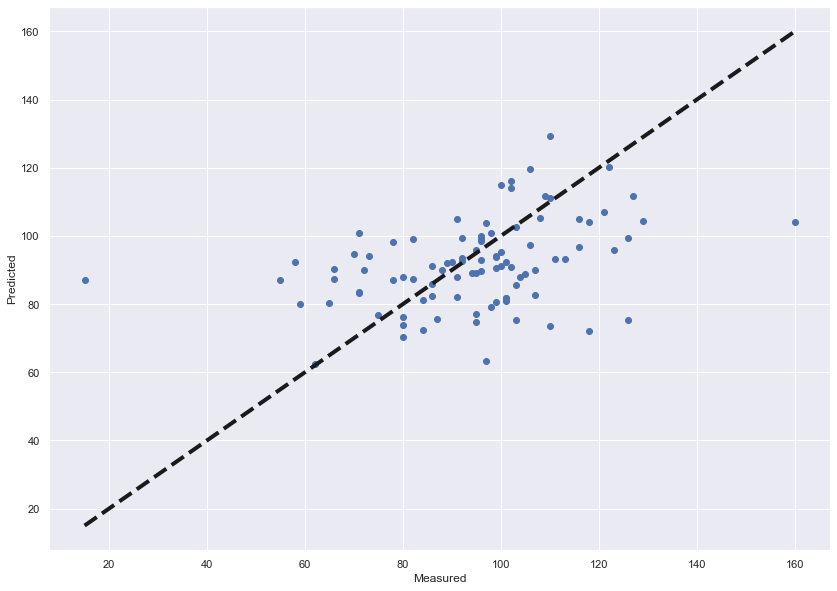

In [361]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Training data Accuracy :  0.660922295695024
Testing data  Accuracy :  0.01431286450046787


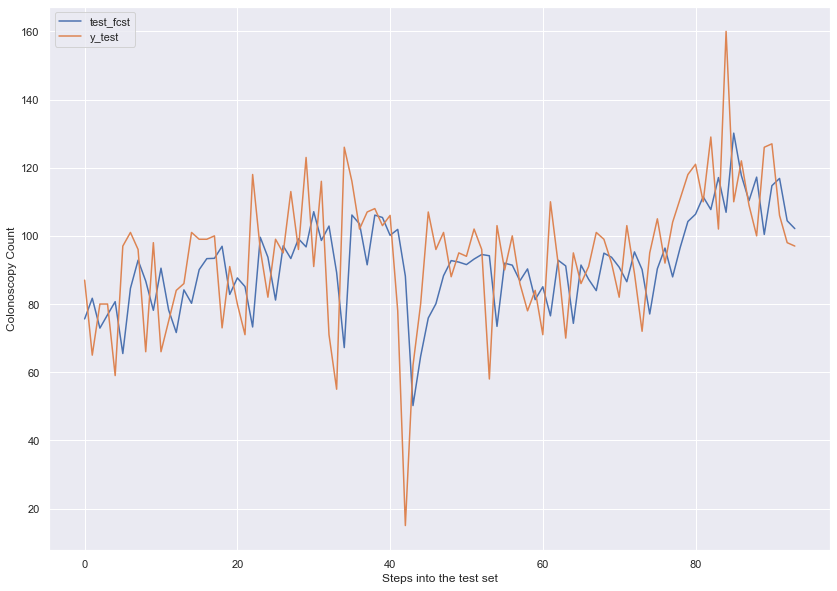

In [362]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Fit Linear Regression model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

#Prediction
train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

# Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

#Assign variable for plotting later on
lr_train_r2=train_r2
lr_test_r2=test_r2
# Display the training and test score
print("Training data Accuracy : ",train_r2)
print("Testing data  Accuracy : ",test_r2)
# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
#plt.title('Test_Fcst vs test data',fontsize=14)
plt.xlabel('Steps into the test set')
plt.ylabel('Colonoscopy Count')
plt.legend(['test_fcst', 'y_test'], loc='upper left')

plt.show()

In [363]:
#Prediction
train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

train_r2_lr = r2_score(y_train, train_fcst)
test_r2_lr = r2_score(y_test, test_fcst)
print(train_r2_lr,test_r2_4)

0.660922295695024 0.04462694962228175
